In [19]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

## typical diurnal pattern

In [20]:
# parameters
nrOfSamples = 604800 # 3600*24*7 = 1 week, if tick == 1
seed = 7
offset = 1616745600 # 9:00 March 25, 2021
capacity1CPU = 300.0
outputName = 'trafficTrace.csv'

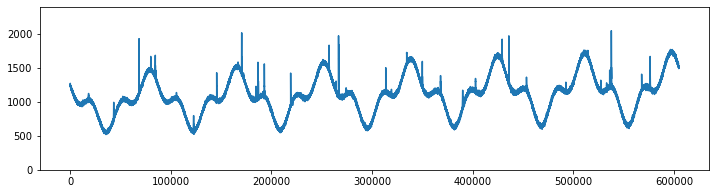

In [4]:
# generating typical trace
random.seed(seed)
trace = np.zeros((nrOfSamples,))
memory = 0.0

for idx in range(nrOfSamples):
    timeOfDay = idx+offset
    trace[idx] = max(int(capacity1CPU*(0.9+0.1*np.cos(np.pi*timeOfDay/864000.0))*(4.0 + 1.2*np.sin(2.0*np.pi*timeOfDay/86400.0) - 0.6*np.sin(6.0*np.pi*timeOfDay/86400.0) + 0.02*(np.sin(503.0*np.pi*timeOfDay/86400.0) - np.sin(709.0*np.pi*timeOfDay/86400.0)*random.expovariate(1.0))) + memory + 5.0*random.gauss(0.0, 1.0)), 0)
    if(random.random() < 1e-4): memory += 200.0*random.expovariate(1.0)
    else: memory *= 0.99

plt.figure(figsize=(12, 3))
plt.plot(trace)
plt.ylim(0, 8*capacity1CPU);

In [5]:
# write to file
trace.tofile(outputName, sep='\n', format="%i")

## consecutive steps

In [14]:
# parameters
nrOfSamples = 604800 # 3600*24*7 = 1 week, if tick == 1
capacity1CPU = 300.0
stepTime = 86400
startJobs = 300.0
stepJobs = 600.0
outputName = 'trafficTrace.csv'

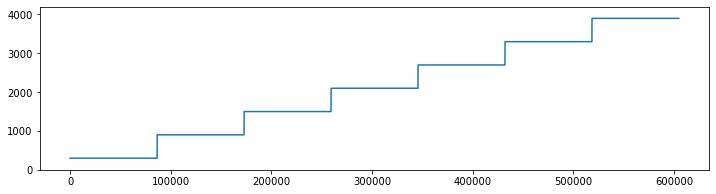

In [22]:
# generating typical trace
random.seed(seed)
trace = np.zeros((nrOfSamples,))
memory = 0.0

for idx in range(nrOfSamples):
    trace[idx] = startJobs + int(idx/stepTime)*stepJobs

plt.figure(figsize=(12, 3))
plt.plot(trace)
plt.ylim(0, 14*capacity1CPU);

In [18]:
# write to file
trace.tofile(outputName, sep='\n', format="%i")

## check

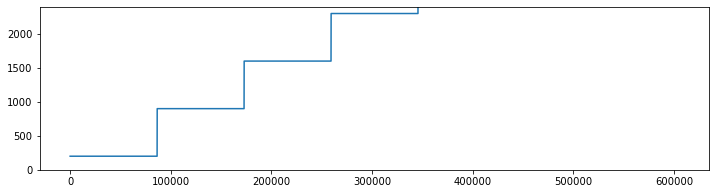

In [13]:
# reading the file to check
with open(outputName) as f:
    job_list = [int(el) for el in f.read().split()]
    
plt.figure(figsize=(12, 3))
plt.plot(job_list)
plt.ylim(0, 8*capacity1CPU);

In [5]:
%%time

# check if method with popo(0) works
while(1):
    try: print(job_list.pop(0))
    except: break

1246
1246
1242
1243
1242
1237
1229
1243
1246
1245
1234
1248
1234
1243
1235
1236
1234
1255
1241
1237
1230
1247
1240
1242
1248
1241
1241
1244
1243
1249
1247
1236
1251
1235
1236
1245
1231
1236
1249
1239
1240
1246
1246
1249
1243
1242
1241
1241
1240
1244
1239
1243
1248
1240
1242
1245
1246
1249
1240
1241
1245
1242
1251
1244
1247
1249
1244
1239
1240
1246
1237
1247
1252
1255
1240
1242
1240
1241
1246
1250
1244
1248
1251
1244
1252
1247
1239
1248
1248
1245
1242
1249
1242
1247
1255
1249
1257
1244
1247
1252
1246
1245
1252
1258
1242
1250
1257
1248
1248
1252
1247
1250
1257
1243
1250
1249
1254
1245
1251
1246
1253
1252
1249
1257
1252
1253
1250
1259
1250
1252
1257
1252
1248
1249
1249
1259
1249
1252
1261
1245
1248
1250
1247
1247
1251
1251
1249
1242
1272
1253
1251
1241
1254
1242
1250
1243
1250
1245
1258
1249
1258
1249
1253
1256
1245
1242
1246
1257
1244
1257
1242
1254
1259
1250
1246
1249
1233
1248
1250
1242
1238
1244
1245
1248
1247
1234
1253
1241
1245
1240
1246
1250
1254
1238
1236
1245
1248
1246
1244
1249


1172
1164
1149
1160
1171
1167
1167
1164
1167
1167
1164
1178
1163
1172
1155
1168
1168
1169
1169
1166
1157
1164
1159
1167
1174
1171
1157
1161
1165
1165
1166
1174
1167
1148
1163
1164
1158
1177
1171
1170
1167
1159
1164
1163
1173
1168
1158
1161
1167
1167
1139
1170
1146
1159
1164
1170
1162
1165
1165
1172
1174
1166
1167
1164
1167
1170
1171
1159
1173
1161
1176
1167
1165
1164
1175
1163
1173
1169
1161
1178
1166
1171
1169
1171
1170
1165
1168
1165
1169
1177
1167
1166
1167
1174
1174
1168
1173
1168
1169
1174
1165
1178
1174
1172
1176
1175
1159
1171
1175
1170
1170
1176
1169
1168
1162
1180
1172
1168
1176
1168
1178
1167
1168
1170
1178
1180
1173
1175
1177
1168
1176
1181
1182
1188
1177
1190
1177
1174
1184
1183
1179
1177
1184
1189
1178
1190
1179
1179
1170
1176
1174
1169
1177
1188
1173
1167
1174
1169
1179
1175
1176
1176
1172
1171
1177
1172
1177
1187
1169
1162
1178
1177
1170
1174
1176
1172
1173
1176
1178
1180
1167
1169
1177
1164
1178
1176
1175
1164
1179
1195
1171
1168
1177
1171
1173
1178
1168
1169
1180
1182


1093
1103
1089
1088
1102
1103
1096
1088
1106
1083
1091
1100
1089
1100
1085
1102
1086
1093
1100
1093
1100
1097
1098
1091
1080
1090
1095
1098
1081
1091
1102
1086
1087
1092
1086
1090
1098
1096
1085
1090
1099
1098
1100
1094
1095
1098
1088
1090
1082
1099
1096
1097
1097
1090
1090
1094
1099
1090
1098
1095
1090
1103
1093
1093
1092
1090
1093
1094
1099
1096
1096
1091
1103
1105
1096
1098
1094
1089
1106
1096
1097
1106
1097
1095
1089
1095
1098
1098
1106
1108
1095
1093
1110
1095
1092
1096
1107
1116
1092
1096
1104
1100
1101
1105
1101
1095
1103
1097
1104
1105
1100
1107
1103
1111
1109
1102
1112
1105
1098
1099
1105
1113
1093
1099
1094
1103
1097
1110
1115
1101
1099
1109
1100
1103
1107
1106
1101
1107
1108
1094
1113
1107
1108
1100
1107
1108
1112
1125
1106
1104
1101
1105
1112
1104
1099
1105
1100
1113
1103
1094
1111
1104
1101
1112
1111
1111
1113
1103
1116
1109
1109
1106
1111
1096
1107
1105
1103
1111
1106
1107
1113
1094
1107
1107
1105
1109
1104
1102
1100
1102
1102
1099
1107
1105
1104
1118
1106
1100
1101
1110


1025
1023
1028
1033
1033
1034
1036
1034
1033
1042
1041
1039
1025
1030
1036
1037
1040
1041
1017
1032
1037
1041
1035
1036
1038
1042
1028
1028
1038
1033
1040
1042
1034
1038
1032
1041
1047
1048
1036
1033
1035
1039
1042
1041
1042
1039
1036
1033
1033
1041
1035
1038
1037
1041
1038
1037
1044
1042
1037
1035
1041
1045
1038
1048
1053
1044
1039
1051
1046
1051
1044
1039
1046
1047
1038
1042
1046
1043
1056
1043
1045
1040
1042
1046
1051
1039
1039
1048
1052
1044
1041
1045
1047
1045
1059
1040
1041
1047
1048
1044
1042
1051
1059
1043
1050
1041
1044
1050
1041
1034
1050
1041
1038
1042
1044
1041
1047
1052
1050
1047
1046
1039
1048
1041
1041
1049
1031
1050
1048
1039
1050
1048
1047
1053
1042
1052
1033
1050
1034
1046
1030
1043
1049
1045
1043
1050
1041
1046
1045
1059
1047
1035
1042
1045
1054
1048
1047
1044
1045
1055
1038
1031
1047
1050
1047
1043
1045
1050
1049
1037
1043
1039
1041
1044
1040
1042
1038
1055
1050
1041
1055
1037
1048
1033
1038
1042
1041
1050
1044
1032
1030
1038
1042
1037
1038
1038
1038
1035
1032
1038


990
993
1007
1005
978
986
997
992
988
992
992
985
990
992
988
998
985
1007
993
1000
1003
989
989
988
992
996
981
990
995
988
991
991
989
990
998
994
990
992
984
996
997
983
990
994
990
995
988
987
995
1000
996
989
999
990
1001
989
989
992
991
993
990
994
983
996
988
986
985
989
999
994
982
984
991
988
988
985
987
985
996
987
992
1000
997
992
992
985
988
998
993
980
980
987
991
986
994
997
986
985
990
988
983
987
999
973
991
983
984
995
998
985
994
986
993
988
990
990
991
990
991
981
979
987
995
987
989
992
990
995
986
992
992
993
988
999
991
990
993
994
990
987
1002
996
974
988
984
983
1005
993
988
982
1000
997
996
992
988
996
997
988
996
989
993
994
990
994
990
988
986
996
991
994
998
991
999
994
989
983
988
1001
992
992
994
988
988
992
1006
995
994
1000
994
990
986
996
990
993
987
993
994
992
982
990
994
993
1017
994
986
1002
1000
988
993
986
1002
997
987
1001
993
999
995
989
997
989
978
986
994
993
989
995
992
998
985
998
983
987
998
993
1008
982
1002
990
1005
997
994
995
989
989
99

968
945
960
956
959
967
957
957
962
948
972
957
963
954
961
962
948
963
951
965
952
949
957
956
964
953
956
950
947
960
952
958
955
957
961
968
956
963
951
969
968
960
952
960
964
963
969
963
955
965
962
956
964
968
965
962
960
966
961
961
957
971
958
963
962
955
971
967
958
958
968
971
957
970
964
968
973
967
967
964
972
972
977
961
961
959
967
965
974
965
954
961
989
963
955
961
976
970
964
970
961
947
969
965
973
967
976
960
973
960
966
969
974
971
959
962
963
985
966
951
974
965
969
959
973
963
975
967
970
976
976
977
955
979
963
967
974
963
966
977
969
967
977
979
973
974
967
968
971
963
980
971
979
967
976
978
966
973
967
964
963
969
986
967
967
972
973
968
966
963
967
970
967
972
971
963
975
971
974
970
972
977
971
977
963
970
966
967
965
973
970
964
958
969
968
973
959
964
968
961
975
970
972
967
965
970
962
951
970
974
968
971
967
955
970
968
973
956
964
962
966
973
969
962
966
962
950
960
966
963
963
972
964
964
966
959
958
976
963
958
957
963
960
973
980
959
968
973
966
961


969
981
994
980
974
999
997
967
975
974
982
966
976
984
986
973
989
980
974
973
973
972
973
973
983
975
982
974
973
979
978
976
980
984
972
968
973
967
974
975
979
976
977
965
966
970
968
969
966
971
971
975
970
974
979
965
969
967
960
966
970
965
973
962
961
970
971
970
960
957
956
968
959
964
966
967
953
964
965
958
965
975
968
975
956
965
968
953
963
972
964
971
962
965
952
967
969
964
970
956
966
964
967
952
962
962
944
959
962
972
967
969
962
967
962
962
964
963
960
967
955
956
971
968
960
963
967
956
964
961
955
952
953
972
956
945
961
960
959
962
956
957
967
962
964
967
946
961
968
964
965
965
965
969
962
958
964
959
960
968
964
966
968
972
961
963
961
967
975
967
964
975
966
964
974
966
966
968
972
966
973
967
976
962
974
970
976
983
970
968
978
975
974
983
974
965
973
971
965
975
975
971
973
975
972
962
968
976
973
965
976
974
965
972
975
969
985
976
978
973
987
978
976
977
975
976
979
969
975
969
980
980
985
972
982
978
975
982
973
980
968
979
979
983
973
978
979
980
973
984


992
992
1000
999
997
999
998
1002
996
1006
986
992
999
992
995
996
997
994
996
988
999
997
1006
996
996
1005
996
1002
992
993
999
1003
993
1005
1004
1000
988
992
1013
1000
998
996
997
998
1017
997
994
1004
1003
996
996
1000
1002
997
996
1011
994
998
1017
1000
1003
1003
995
1003
1004
1012
1011
1012
998
995
998
1001
1002
997
1001
1005
1002
998
1005
998
999
1006
1005
997
1010
997
1003
993
993
1002
1000
1006
990
994
1006
1024
1010
1017
990
1003
1000
1016
994
993
992
1000
998
1004
1012
997
1007
1014
990
1007
995
991
1001
989
1000
992
1002
998
997
1006
988
995
987
991
1000
992
994
999
986
997
994
991
997
983
993
986
997
1001
992
986
983
987
995
987
991
994
996
993
994
982
984
995
994
988
988
985
994
986
987
970
980
977
983
991
986
990
984
987
985
984
989
995
985
988
995
981
984
981
975
988
997
987
989
980
989
978
983
982
980
977
985
992
987
993
985
987
997
978
977
988
971
970
985
984
981
986
978
992
999
985
985
987
981
988
992
982
980
989
996
978
988
986
980
982
988
983
985
981
987
990
977
9

1027
1019
1017
1018
1018
1021
1010
1018
1024
1015
1018
1016
1018
1023
1017
1013
1028
1013
1035
1017
1020
1038
1016
1010
1022
1011
1019
1012
1005
1028
1010
1008
1014
1012
1008
1017
1013
1020
1013
1013
1017
1018
1015
1019
1019
1007
1014
1014
1013
1012
1018
1014
1019
1013
1018
1018
1017
1011
1015
1016
1020
1014
1016
1004
1009
1018
1017
1012
1015
1006
1005
1016
1011
1009
1017
1003
1007
1010
1010
1002
1009
1006
1013
1003
1008
1001
1013
1010
1009
1002
1007
1008
1000
1001
1001
999
999
996
1010
1005
1006
992
1011
1005
1002
998
1003
1020
1003
1008
1006
1002
1004
1002
1012
1010
1005
1000
1009
1006
1004
999
986
1005
996
1011
1009
1001
1006
989
1003
1015
1000
998
1008
1010
1003
995
1011
1002
1010
1008
1019
1008
1004
1002
997
1004
1006
1005
989
1015
1007
1002
1008
995
992
1003
1012
1013
1000
1005
1001
1002
1009
1010
1014
1003
1007
1000
1005
1002
1009
1009
1013
1001
1013
1008
1011
1007
1006
999
998
1008
1011
1008
1018
1010
1015
1021
1011
1013
1025
1007
1014
1013
1004
1013
1010
1007
1010
1010
1023
10

1029
1024
1037
1020
1029
1028
1028
1039
1022
1029
1024
1025
1017
1035
1025
1018
1020
1024
1024
1022
1021
1011
1018
1018
1022
1020
1024
1017
1023
1023
1022
1020
1015
1020
1016
1028
1025
1016
1020
1014
1024
1009
1012
1016
1017
1014
1021
1014
1013
1022
1022
1030
1002
1019
1015
1028
1020
1025
1009
1006
1009
1026
1021
1021
1015
1021
1002
1014
1005
1023
1017
1016
1007
1012
1016
1000
1013
1009
1011
1024
1030
1005
1014
1014
1022
1011
1018
1014
1006
1014
1004
1013
1011
1020
1033
1008
1021
1008
1018
1016
1017
1019
1014
1003
1011
1026
997
1003
1023
1010
1019
1012
1020
1017
1017
1011
1011
1014
1016
1014
1020
1014
1016
1017
1019
1014
1013
1022
1018
1024
1028
1027
1033
1030
1021
1020
1018
1020
1029
1026
1023
1021
1012
1026
1023
1023
1022
1032
1016
1014
1024
1019
1019
1025
1021
1019
1018
1029
1015
1019
1024
1022
1026
1023
1024
1017
1012
1036
1036
1023
1028
1030
1028
1034
1028
1024
1024
1025
1037
1029
1016
1027
1023
1025
1030
1026
1036
1028
1023
1033
1025
1021
1025
1022
1034
1035
1027
1028
1028
1020
1

1016
1017
1016
1007
1013
1015
1012
1009
1017
1012
1009
1021
1017
1024
1015
1013
1005
1026
1016
1018
1016
1014
1018
1024
1007
1017
1004
1003
1012
1007
1019
997
1022
1007
1009
1022
1013
1011
1013
1011
1016
1011
1009
1008
1011
1020
1011
1019
1020
1015
1021
1018
999
1023
1016
1017
1022
1015
1016
1012
1018
1020
1009
1016
1011
1008
1011
1013
1020
1024
1023
1021
1009
1011
1022
1010
1021
1012
1018
1022
1022
1025
1023
1021
1019
1021
1011
1020
1017
1024
1028
1013
1016
1020
1022
1018
1024
1018
1029
1040
1020
1018
1026
1035
1024
1022
1018
1017
1018
1026
1027
1033
1017
1030
1032
1022
1012
1018
1016
1018
1034
1025
1028
1026
1019
1027
1019
1030
1020
1028
1042
1035
1031
1032
1024
1042
1018
1028
1024
1022
1012
1037
1040
1027
1019
1028
1018
1031
1025
1026
1028
1026
1028
1030
1032
1029
1020
1045
1020
1021
1024
1019
1023
1011
1032
1026
1027
1031
1036
1022
1026
1021
1031
1033
1028
1026
1029
1011
1021
1031
1022
1024
1033
1015
1033
1025
1034
1025
1026
1037
1026
1029
1028
1018
1018
1031
1032
1026
1023
1029
10

1001
1001
991
994
993
997
996
999
999
997
999
998
1001
999
996
999
993
988
996
985
1000
997
994
1007
1000
1001
999
998
1006
994
1003
1000
1001
993
1005
999
993
1003
1003
1001
995
1002
1009
999
996
1001
999
991
1006
1004
1002
999
994
1001
1004
1002
1010
1009
1010
1007
1007
1006
1004
1003
990
998
1001
1002
1002
1027
990
995
1003
1013
1004
1004
1007
1008
1007
1008
1005
1012
998
1020
996
1001
1011
1015
1008
1004
1012
1004
1011
1002
1006
1005
1004
1007
997
993
1004
1001
1010
1006
1000
1006
1002
1006
999
998
1004
1003
1017
998
1011
997
1006
1011
1013
1007
1000
993
1001
1004
1006
1007
992
1006
998
1003
1009
1003
1008
1012
1001
1004
994
1004
998
1006
996
1000
1008
1004
1010
1005
991
1006
999
1007
1004
1020
1009
1003
1002
1007
996
1005
1000
1002
1014
999
1014
993
1007
1005
1006
1004
997
997
1001
1004
1011
1015
995
1007
1005
992
992
1006
991
1000
1004
996
1001
999
998
998
987
1005
1002
1007
1003
1006
1005
998
995
1003
1003
997
1003
985
1007
1005
1004
992
999
1011
987
988
995
988
1008
1006
994
99

941
947
946
942
952
943
946
950
947
936
944
946
948
946
942
944
944
939
934
940
943
932
946
939
942
942
936
944
935
952
940
936
946
938
928
943
934
931
932
943
939
940
928
934
941
940
944
933
935
921
946
945
931
914
930
946
930
923
938
934
922
947
940
933
944
932
940
940
938
947
940
941
941
936
940
939
927
939
935
938
933
940
925
940
941
936
927
942
933
932
947
937
943
937
936
940
938
932
935
934
937
941
943
948
947
944
944
933
939
942
943
948
935
936
945
944
936
944
938
944
934
939
943
948
944
941
942
942
947
940
944
942
952
940
945
940
944
947
945
943
946
947
944
946
937
931
942
943
937
945
944
939
952
941
953
935
946
963
950
944
946
949
945
942
957
953
948
948
962
949
950
943
946
943
936
940
946
950
946
961
956
946
958
955
954
938
949
948
950
941
943
964
952
948
959
944
953
951
943
972
952
955
952
947
944
948
952
951
956
948
954
950
944
951
940
946
938
950
949
942
939
950
950
946
953
952
939
939
944
934
947
948
951
945
939
945
948
947
948
946
944
942
940
944
938
944
949
940
943
932


863
866
880
864
863
869
873
863
871
865
874
858
863
855
861
874
868
877
868
858
868
869
868
865
866
861
856
861
862
864
872
866
861
859
865
862
863
863
867
855
866
855
867
863
863
871
861
857
851
847
866
861
856
854
867
854
856
849
861
859
854
851
858
856
857
857
850
849
858
852
857
858
848
846
850
850
847
861
850
852
851
855
850
856
861
850
858
847
852
852
842
855
856
852
851
845
847
843
848
852
846
855
851
841
856
842
855
828
847
846
841
853
850
854
836
849
838
836
846
839
837
846
838
828
835
850
859
852
848
851
843
849
850
859
847
845
846
848
847
838
843
854
850
847
852
852
849
838
852
844
838
851
857
853
847
854
841
845
843
860
856
850
843
856
849
845
854
849
855
851
852
852
846
847
849
859
858
857
849
847
859
844
862
854
858
842
858
857
860
846
851
854
856
860
862
848
855
851
858
854
845
849
859
853
852
856
853
865
856
860
860
858
860
843
862
859
857
858
852
853
859
863
860
866
867
852
854
865
857
851
852
866
849
856
866
854
853
848
854
858
851
864
854
863
855
862
859
866
856
858


759
768
766
762
758
772
753
760
760
770
763
762
764
761
754
769
753
763
764
769
752
769
762
771
751
769
749
765
760
761
753
761
766
753
765
766
766
769
771
763
761
766
761
768
757
762
759
768
762
763
758
766
766
765
756
763
771
762
760
769
764
762
766
754
755
775
762
764
754
769
767
762
769
770
766
763
757
758
776
768
766
762
756
756
765
771
769
759
755
767
765
753
761
756
763
766
766
757
768
761
760
760
767
761
754
746
761
754
767
765
763
755
775
755
758
757
761
762
763
757
753
769
772
768
753
761
768
755
753
771
751
769
748
756
759
755
764
761
744
757
756
770
750
759
754
767
753
768
762
753
754
757
754
757
744
749
752
754
749
775
761
760
755
757
748
757
745
745
744
757
749
751
751
742
753
749
753
749
752
752
742
737
756
741
748
747
739
749
750
748
750
745
740
740
754
753
738
741
753
753
746
746
745
753
749
748
735
746
742
742
746
755
743
739
752
745
750
735
720
748
741
737
752
745
744
744
734
746
750
745
738
738
745
739
753
744
747
751
742
745
740
746
747
749
746
741
753
743
746
735


663
659
670
658
662
664
667
660
671
671
662
664
663
671
664
663
672
668
662
670
660
665
662
665
667
665
661
661
661
660
667
666
664
655
669
679
672
668
670
665
664
672
669
674
670
667
667
666
666
660
673
661
663
662
671
663
665
666
661
667
682
692
680
676
671
673
665
664
666
661
655
660
683
677
658
661
675
667
666
665
673
672
662
668
669
667
671
670
682
667
675
667
673
669
663
670
661
670
669
664
676
670
671
672
656
674
658
662
673
656
671
666
669
663
664
669
658
666
658
664
662
667
671
659
653
671
659
668
658
675
669
659
674
664
662
666
668
667
656
662
656
663
660
670
669
661
666
661
666
673
661
665
663
662
667
643
658
667
665
661
662
660
669
665
675
657
666
668
655
667
652
662
665
661
661
663
646
673
671
664
658
642
657
660
648
663
664
650
661
651
650
663
665
664
660
655
659
657
640
654
661
666
659
658
667
669
660
663
661
660
653
664
662
651
660
661
649
660
658
667
664
662
663
649
655
653
666
656
674
661
658
662
657
669
666
657
659
658
647
664
666
661
663
660
664
670
664
655
670
659


597
598
601
606
588
600
597
594
597
606
590
591
593
603
591
584
591
590
604
599
599
587
579
587
592
591
591
600
597
589
593
582
599
596
596
596
590
588
582
599
595
592
591
595
596
595
579
581
576
598
592
581
580
593
595
591
583
583
590
584
582
586
585
581
578
580
595
583
589
573
591
588
589
580
588
579
589
574
590
568
593
588
580
586
587
585
586
567
583
594
584
576
570
586
591
591
586
584
572
574
597
585
584
568
587
583
582
585
575
582
592
583
577
575
582
556
576
579
580
587
575
585
580
588
580
575
582
595
577
580
589
583
584
575
581
578
578
579
574
578
584
597
576
582
586
595
578
584
576
585
585
570
578
585
587
577
579
593
594
595
583
588
589
587
595
587
587
586
589
598
594
586
586
589
583
590
595
581
581
594
589
591
591
590
587
580
591
582
614
586
589
587
593
596
598
586
581
595
585
583
599
583
596
586
586
595
587
599
584
596
579
592
605
586
585
596
615
589
592
594
591
610
599
592
587
593
592
602
601
584
593
586
602
591
603
589
597
585
587
588
583
597
591
582
603
591
593
589
593
584


558
551
562
557
549
556
559
545
549
550
553
546
553
547
541
541
545
546
549
542
550
544
545
548
556
548
553
554
543
544
551
544
541
546
541
555
548
550
548
546
542
531
543
541
534
541
544
549
549
539
542
552
546
543
532
545
539
541
547
540
550
547
537
548
537
535
528
542
537
544
544
535
532
525
536
541
545
543
552
542
545
547
537
550
533
526
548
545
545
546
545
538
536
542
532
550
543
549
555
542
548
547
546
549
541
551
547
552
548
536
542
544
545
552
541
549
547
554
537
546
555
547
544
553
552
555
541
541
548
561
545
551
552
556
549
551
549
545
548
549
550
546
551
556
554
542
554
555
561
554
563
559
552
564
552
556
549
551
555
556
551
553
558
565
562
562
562
563
562
569
551
561
554
558
548
555
558
554
550
565
562
564
559
561
569
562
558
564
569
578
558
550
556
564
570
563
553
555
561
552
558
563
563
577
556
561
562
560
551
563
555
565
556
582
550
553
553
560
552
553
555
560
554
559
555
561
562
575
558
574
555
556
557
560
566
559
561
560
556
548
559
566
551
561
558
553
555
550
553
558


572
571
571
558
562
568
561
557
561
565
557
562
571
581
572
570
562
561
564
556
557
562
562
556
551
557
563
554
565
564
560
550
568
570
561
565
562
555
554
562
553
555
564
564
560
559
555
556
566
551
555
556
561
559
556
562
559
552
554
567
554
562
553
546
563
554
544
548
556
559
544
552
551
535
557
561
560
559
551
563
553
558
549
563
553
558
553
565
552
557
553
559
566
560
556
555
566
545
557
545
554
552
557
558
559
553
562
551
558
549
570
561
561
559
553
554
562
561
559
555
559
558
558
560
554
565
569
556
559
563
562
569
557
554
557
563
565
560
558
570
566
556
569
572
551
561
558
572
566
559
563
560
569
560
565
573
567
565
560
579
558
574
572
565
560
571
578
569
577
559
572
576
565
567
570
572
574
571
574
562
570
576
580
569
580
573
578
579
568
571
581
578
570
579
573
573
575
580
570
590
573
576
573
577
563
569
580
584
575
580
579
566
582
582
589
566
571
593
577
615
569
590
576
571
605
575
578
570
586
572
574
575
575
578
576
575
580
578
574
572
576
569
587
589
564
575
566
609
570
571


617
626
624
628
618
640
613
634
617
618
634
617
643
618
631
621
619
620
628
652
625
622
642
626
626
625
644
626
626
614
619
620
614
620
625
615
621
616
604
620
625
621
611
616
619
624
635
629
625
615
619
612
621
616
627
616
616
616
625
618
619
625
616
619
609
624
618
620
626
615
624
619
613
615
620
626
607
622
620
632
613
614
613
615
614
619
621
622
619
629
626
625
608
615
611
616
617
611
613
614
623
618
600
619
612
616
629
624
614
621
623
610
618
625
619
621
625
625
624
628
616
624
620
609
614
624
627
621
610
623
616
619
610
621
622
628
614
604
614
623
626
618
618
626
613
628
625
615
629
635
617
627
622
617
623
617
625
622
624
627
623
610
628
632
619
621
619
618
619
629
633
630
627
628
629
619
631
626
628
626
636
624
628
640
632
633
623
627
636
634
625
636
629
628
635
623
626
629
637
632
640
637
638
636
641
636
632
639
638
632
636
635
636
641
646
633
642
639
640
632
635
635
636
640
648
630
643
633
630
635
645
636
652
640
641
646
639
637
656
641
633
654
648
639
651
637
637
642
640
648


714
714
709
721
716
707
712
704
718
713
717
711
703
708
708
711
705
714
711
712
716
711
707
714
710
716
705
718
713
723
715
708
715
709
718
697
702
722
711
709
724
708
721
715
712
712
709
729
704
712
721
723
717
715
717
719
717
711
715
718
716
714
718
712
719
714
720
718
724
722
713
722
721
713
709
712
711
713
717
716
716
728
711
713
712
709
715
711
721
717
714
717
712
722
711
713
708
713
715
725
717
728
716
713
712
708
714
711
712
716
717
728
711
712
713
715
707
714
713
729
719
721
721
710
712
715
713
707
710
713
714
724
716
711
698
719
718
720
710
721
721
711
710
713
714
711
717
718
702
710
709
699
685
716
710
723
711
716
710
710
718
716
710
706
700
717
711
713
721
713
721
711
708
718
716
720
723
726
724
712
703
721
700
727
719
718
725
721
719
719
717
719
697
709
721
720
715
723
720
724
724
717
724
722
724
718
721
701
720
724
732
709
724
721
731
732
724
729
718
724
731
729
726
719
725
715
723
727
726
725
730
726
718
721
724
726
722
726
725
720
724
732
726
728
726
727
730
727
733
721


816
815
803
816
823
813
814
818
811
809
818
812
814
817
806
810
826
815
812
812
816
816
815
812
826
814
819
821
814
816
826
818
814
812
816
811
820
814
824
818
830
826
809
819
814
813
818
819
823
819
820
805
817
817
816
829
824
828
807
809
822
816
837
829
824
826
821
825
820
820
835
823
824
818
821
818
811
821
809
823
822
825
826
822
811
830
817
822
829
845
824
832
813
822
820
832
825
820
821
828
819
821
822
821
824
827
822
819
824
821
827
818
819
819
831
819
818
831
829
830
825
835
824
813
831
825
817
823
828
823
829
844
813
837
812
823
825
824
831
823
814
825
818
819
829
819
824
823
822
828
823
818
816
815
831
814
820
826
826
825
829
819
822
831
812
826
821
817
821
825
827
828
824
829
825
831
822
824
821
823
816
826
825
818
821
834
820
831
817
819
819
812
826
821
838
824
833
837
840
830
828
817
825
817
838
826
832
828
831
828
836
823
825
835
806
829
837
821
811
827
829
819
826
840
831
828
830
831
825
834
826
829
820
821
832
830
835
832
828
838
835
844
832
833
833
830
819
836
832
829


921
923
914
923
912
923
921
911
905
904
916
915
906
905
909
909
909
911
914
910
902
906
906
915
922
891
908
909
916
919
914
900
915
918
915
921
911
911
915
898
921
907
916
916
902
914
904
916
915
909
914
910
917
906
907
904
917
910
913
915
912
910
920
919
908
912
915
918
916
921
906
917
911
906
909
917
911
922
910
918
904
922
917
918
916
913
916
919
913
911
925
910
912
911
912
912
903
909
915
917
917
912
917
925
910
916
918
918
921
912
917
928
923
917
925
916
914
927
921
922
912
918
919
916
912
926
921
925
918
920
917
919
912
921
915
924
922
913
912
939
922
935
918
924
920
925
938
931
921
927
915
921
920
928
925
919
931
925
926
925
952
916
934
927
925
918
921
931
919
930
924
928
922
922
924
925
926
914
928
936
912
927
922
939
921
935
929
920
928
932
927
930
917
930
933
918
925
933
923
928
928
924
927
930
926
927
921
925
926
924
923
924
935
934
923
926
923
926
939
917
926
927
925
922
931
929
924
927
925
935
920
923
934
919
923
921
933
920
923
938
928
920
920
926
928
924
920
930
935
918


987
986
981
994
980
984
974
977
986
976
990
986
977
996
977
985
989
992
983
991
978
986
987
983
981
990
990
983
996
982
980
993
977
989
987
991
985
972
994
988
974
983
982
980
988
985
990
988
985
971
985
981
985
984
983
990
985
979
976
995
977
996
989
986
990
987
979
985
993
985
988
982
978
990
991
985
988
983
984
987
982
991
987
991
992
986
988
991
990
987
991
991
985
992
989
991
989
995
986
986
986
992
989
988
994
997
993
988
994
995
1003
994
998
995
997
992
997
1005
1000
998
997
989
987
1005
999
996
997
983
991
989
999
995
996
1002
998
998
998
992
990
1007
995
992
999
1000
1016
1008
1003
1002
986
987
1013
1020
1002
1001
1004
1003
1000
1007
1025
996
998
1009
1005
1005
992
998
997
1006
996
1002
1000
1003
1017
1000
1004
997
996
1002
1013
1003
1004
999
1005
1001
990
998
1005
1003
995
1003
1001
983
992
1010
995
1006
1004
1001
1008
989
993
997
999
999
999
1005
1001
1003
994
1001
997
1006
1001
1005
1001
1008
995
1005
987
1002
1004
1004
990
1001
978
1007
995
1005
1004
986
1000
1008
997
995


1035
1021
1028
1031
1026
1030
1022
1030
1020
1027
1037
1025
1034
1027
1029
1045
1048
1032
1024
1028
1029
1031
1032
1030
1024
1031
1028
1023
1030
1028
1028
1026
1032
1021
1039
1030
1029
1026
1026
1028
1024
1028
1030
1026
1028
1023
1029
1033
1026
1031
1021
1024
1031
1034
1024
1019
1027
1028
1035
1035
1032
1025
1020
1024
1037
1032
1030
1026
1030
1030
1032
1028
1031
1030
1019
1025
1041
1031
1025
1029
1027
1028
1037
1034
1030
1028
1031
1030
1028
1025
1020
1030
1033
1015
1024
1023
1027
1019
1022
1033
1018
1035
1033
1020
1004
1026
1020
1018
1026
1012
1031
1029
1028
1032
1025
1026
1030
1026
1015
1023
1033
1031
1020
1017
1027
1033
1036
1020
1028
1025
1029
1021
1029
1023
1024
1028
1022
1024
1024
1030
1033
1025
1023
1022
1030
1027
1026
1011
1027
1023
1024
1018
1039
1018
1037
1022
1031
1028
1017
1030
1027
1022
1033
1029
1029
1023
1030
1034
1030
1021
1031
1027
1026
1032
1020
1028
1020
1028
1030
1033
1032
1035
1031
1028
1032
1031
1028
1030
1013
1023
1034
1024
1038
1025
1023
1030
1028
1026
1028
1041


1038
1044
1038
1035
1034
1034
1031
1045
1040
1028
1042
1033
1037
1034
1031
1029
1043
1034
1028
1035
1035
1038
1037
1034
1038
1034
1038
1032
1037
1033
1038
1036
1032
1036
1037
1038
1033
1033
1049
1036
1048
1042
1041
1025
1040
1049
1031
1037
1041
1036
1041
1044
1033
1035
1048
1040
1040
1038
1037
1039
1035
1038
1039
1043
1042
1031
1037
1036
1037
1029
1044
1040
1036
1035
1032
1051
1038
1047
1027
1027
1060
1061
1033
1031
1039
1034
1035
1032
1038
1030
1036
1025
1051
1037
1040
1031
1044
1036
1033
1029
1034
1040
1029
1039
1036
1024
1039
1032
1035
1049
1049
1036
1038
1043
1025
1036
1055
1031
1041
1033
1029
1043
1040
1031
1046
1041
1034
1041
1036
1041
1037
1036
1040
1030
1039
1028
1039
1036
1032
1036
1033
1035
1034
1033
1040
1036
1034
1037
1036
1032
1028
1028
1033
1031
1025
1034
1029
1031
1036
1024
1031
1037
1028
1028
1027
1031
1034
1031
1032
1030
1023
1041
1030
1030
1028
1029
1034
1029
1038
1025
1038
1030
1043
1031
1037
1032
1029
1018
1026
1036
1020
1033
1033
1033
1026
1026
1035
1033
1027
1026


1023
1033
1027
1018
1013
1022
1027
1024
1020
1028
1032
1025
1026
1013
1017
1023
1024
1021
1025
1030
1035
1031
1033
1033
1025
1031
1023
1025
1023
1028
1021
1028
1032
1021
1029
1022
1029
1027
1019
1024
1017
1023
1021
1025
1028
1017
1017
1021
1024
1030
1027
1028
1000
1026
1025
1021
1035
1032
1021
1031
1034
1028
1024
1024
1014
1026
1013
1005
1019
1031
1026
1027
1016
1024
1015
1018
1027
1024
1022
1037
1026
1026
1028
1024
1018
1032
1021
1026
1026
1031
1043
1025
1031
1023
1023
1025
1033
1028
1025
1031
1032
1027
1031
1028
1032
1034
1030
1028
1030
1033
1031
1031
1032
1033
1035
1036
1031
1034
1035
1036
1039
1038
1030
1030
1036
1033
1031
1039
1030
1030
1035
1030
1026
1041
1036
1042
1034
1032
1042
1031
1034
1032
1025
1035
1043
1044
1045
1040
1025
1038
1031
1039
1036
1044
1040
1046
1040
1042
1038
1038
1054
1029
1044
1046
1041
1027
1038
1052
1032
1039
1043
1049
1040
1036
1042
1036
1048
1037
1045
1039
1046
1039
1051
1042
1040
1040
1053
1041
1038
1050
1041
1040
1034
1051
1031
1039
1040
1039
1027
1030


1006
1001
1015
1009
1009
1010
1016
1006
1006
1011
1012
1001
1015
1020
1001
1003
1008
1016
1007
1012
1015
1008
1002
1004
1010
1006
1003
1011
1011
1015
1004
999
1006
1010
1009
1006
1003
1003
1006
1006
1006
1001
1009
1010
1015
1013
1009
1016
1018
1012
1007
999
1003
1011
1021
1009
1011
1009
1013
1012
1019
1007
1006
1025
1011
1016
1025
1006
1019
1009
1012
1021
1018
1024
1017
1019
1014
1012
1015
1025
1014
1017
1017
1020
1017
1018
1016
1018
1019
1014
1013
1018
1020
1011
1019
1018
1018
1026
1026
1018
1021
1020
1025
1014
1026
1032
1021
1019
1019
1023
1016
1018
1031
1021
1022
1018
1014
1024
1017
1021
1016
1039
1022
1017
1027
1009
1023
1033
1015
1020
1013
1015
1041
1019
1026
1014
1021
1025
1022
1025
1019
1015
1023
1032
1021
1025
1022
1014
1028
1019
1025
1022
1024
1029
1041
1021
1012
1021
1020
1029
1023
1027
1028
1013
1045
1030
1015
1026
1016
1031
1011
1029
1027
1014
1018
1027
1024
1021
1021
1027
1024
1012
1027
1009
1027
1027
1013
1025
1024
1023
1022
1025
1018
1019
1012
1020
1028
1019
1012
1026
10

994
991
990
982
989
1002
979
988
984
992
989
988
992
1000
996
991
992
996
1001
995
996
1006
999
987
989
998
992
1005
992
999
1006
1001
1003
998
997
997
993
999
994
990
997
987
1000
999
1003
985
994
1002
999
996
996
1005
996
999
993
1002
1000
1002
1000
995
999
992
999
1003
996
1008
996
997
1007
1011
1007
1013
997
1001
1002
1002
1002
1009
1004
998
1010
1004
1002
996
1000
1017
1009
1005
994
1005
1010
1013
997
1002
1005
1013
999
1006
1005
1004
1011
1007
1003
1007
990
1005
1003
1001
1003
1002
1004
1002
1017
1008
1027
998
1006
1005
999
1001
992
1006
1003
1003
1008
1006
1009
1000
1009
998
998
997
1002
1001
997
1003
995
1004
995
1003
1004
1004
996
1000
1005
997
1002
1005
995
1006
1002
997
995
1009
1001
1005
1002
1000
998
1007
1002
996
1003
1000
1005
1008
999
999
1003
1004
994
987
995
1002
997
1002
995
993
997
996
997
995
1002
998
991
993
1000
992
991
977
985
991
982
991
986
997
989
998
989
996
996
999
985
992
993
977
999
987
984
994
996
989
989
995
996
986
985
962
993
1006
989
986
987
1001
992

999
1002
995
986
1009
987
984
988
983
988
983
992
990
1000
988
984
992
988
999
995
991
994
977
981
988
988
987
993
978
985
986
985
985
993
997
983
982
987
984
980
994
992
983
993
987
991
981
980
993
982
987
982
982
979
970
980
993
984
989
987
986
981
986
976
981
981
983
976
979
986
970
974
982
985
982
974
972
983
973
979
971
977
968
980
985
971
972
979
972
969
970
980
982
982
971
980
960
976
977
976
981
979
965
956
977
965
973
976
969
974
976
974
984
985
966
965
972
971
977
974
975
971
978
975
981
987
979
974
964
979
966
968
952
974
977
971
979
971
970
969
973
962
960
970
974
975
967
975
970
971
982
963
976
977
980
981
977
978
964
978
975
967
971
973
969
976
978
974
970
984
970
979
972
973
979
980
970
973
970
970
982
972
982
974
980
973
976
976
974
981
972
979
975
980
982
971
983
987
976
980
975
985
988
986
986
978
973
980
976
987
982
987
984
983
991
972
991
993
977
987
988
982
993
979
992
998
977
978
979
975
983
981
985
996
977
983
985
981
984
983
982
980
983
985
982
979
993
982
986
9

985
991
993
992
986
997
984
980
989
999
995
987
994
997
990
987
986
989
998
994
983
983
979
995
989
984
999
997
987
995
988
993
1000
985
977
986
991
985
994
990
996
989
988
984
994
998
997
987
989
992
992
999
995
990
997
993
993
998
990
993
995
994
995
991
992
1000
996
991
994
1004
999
993
995
1000
1001
998
1004
1006
1001
1003
997
1009
995
996
1002
1004
995
1000
999
1003
1006
996
998
1009
1007
1004
1001
1001
999
1004
1005
1005
999
1011
1000
1007
1006
1005
1010
1006
1011
1002
1018
1003
1004
997
1003
1010
1017
1009
1002
1001
1003
1004
997
993
1010
999
1003
1014
1015
1011
1015
996
1009
1006
1009
1002
1011
1001
1022
1002
1001
1003
1002
1010
1012
1001
994
1005
1005
1008
1005
1016
1001
1003
998
1008
1004
1003
997
1003
1004
1001
997
1007
1008
1009
1017
1005
1013
1003
1014
998
1015
1003
1001
1009
1008
1008
1000
1003
1000
1003
1003
1010
1011
1003
1004
993
998
1001
1001
1002
1014
1004
1009
986
1003
990
997
1000
1004
999
1001
1002
989
1008
994
1009
1002
997
993
998
980
1009
1000
998
1009
999
999


1031
1036
1037
1048
1044
1034
1036
1051
1058
1050
1054
1046
1037
1045
1042
1041
1025
1040
1038
1037
1037
1040
1040
1036
1043
1038
1041
1037
1043
1036
1049
1034
1039
1049
1039
1044
1041
1035
1038
1041
1034
1034
1041
1046
1043
1046
1042
1041
1036
1050
1032
1030
1036
1035
1048
1047
1037
1039
1035
1037
1039
1037
1039
1037
1041
1042
1043
1038
1044
1034
1021
1033
1029
1032
1035
1029
1043
1037
1029
1039
1036
1035
1030
1042
1037
1042
1039
1031
1014
1015
1034
1034
1045
1026
1031
1031
1028
1026
1036
1027
1028
1038
1028
1029
1017
1026
1039
1034
1029
1037
1034
1039
1022
1028
1044
1037
1043
1044
1039
1039
1028
1030
1033
1022
1032
1027
1036
1029
1034
1030
1028
1033
1016
1029
1030
1029
1030
1032
1032
1038
1039
1016
1030
1028
1018
1039
1032
1027
1028
1023
1041
1032
1040
1034
1036
1027
1029
1030
1030
1044
1027
1027
1029
1035
1038
1029
1037
1031
1035
1041
1047
1028
1042
1038
1037
1035
1032
1031
1034
1026
1042
1035
1043
1031
1032
1035
1029
1034
1023
1033
1036
1028
1032
1033
1026
1040
1034
1033
1032
1027


1097
1086
1088
1097
1085
1094
1087
1087
1089
1094
1084
1094
1078
1086
1081
1096
1100
1091
1099
1080
1093
1082
1080
1098
1093
1081
1090
1091
1093
1092
1090
1084
1086
1086
1097
1079
1091
1091
1090
1081
1085
1096
1106
1090
1103
1088
1103
1097
1089
1091
1082
1099
1085
1100
1092
1097
1097
1092
1098
1087
1092
1092
1095
1086
1087
1090
1088
1093
1093
1086
1087
1097
1085
1087
1098
1096
1090
1107
1095
1087
1086
1098
1094
1094
1088
1086
1096
1088
1094
1092
1094
1090
1104
1094
1100
1078
1086
1084
1083
1092
1095
1085
1096
1088
1098
1096
1089
1089
1089
1086
1084
1092
1094
1091
1093
1099
1094
1087
1088
1098
1094
1092
1092
1084
1092
1089
1082
1088
1096
1098
1098
1095
1099
1092
1073
1085
1091
1099
1096
1089
1094
1087
1096
1102
1089
1095
1097
1092
1095
1091
1102
1091
1098
1089
1098
1085
1078
1087
1090
1085
1092
1096
1102
1092
1093
1110
1073
1088
1100
1107
1086
1105
1093
1092
1091
1105
1102
1096
1101
1088
1097
1096
1099
1104
1103
1080
1104
1089
1099
1092
1102
1097
1097
1099
1086
1089
1109
1096
1099
1104


1157
1167
1151
1159
1169
1166
1163
1162
1166
1164
1161
1156
1160
1166
1166
1165
1165
1158
1165
1165
1155
1164
1164
1164
1160
1173
1147
1153
1165
1170
1167
1168
1152
1166
1165
1164
1158
1156
1167
1162
1167
1165
1169
1167
1167
1169
1175
1174
1171
1165
1171
1174
1165
1174
1164
1170
1169
1169
1161
1162
1166
1179
1175
1162
1176
1171
1163
1170
1165
1177
1176
1176
1175
1173
1161
1175
1173
1163
1179
1169
1169
1167
1169
1171
1170
1180
1177
1171
1171
1169
1183
1185
1164
1176
1181
1162
1178
1173
1184
1175
1175
1180
1179
1171
1175
1178
1179
1170
1173
1178
1181
1168
1175
1177
1183
1178
1178
1167
1173
1172
1178
1205
1180
1175
1183
1174
1179
1179
1178
1175
1176
1181
1179
1184
1171
1174
1169
1172
1174
1196
1185
1186
1182
1190
1172
1176
1182
1186
1182
1175
1170
1172
1179
1179
1174
1178
1178
1180
1175
1179
1167
1185
1163
1170
1176
1175
1182
1172
1173
1175
1170
1165
1179
1183
1174
1171
1176
1172
1177
1183
1178
1177
1172
1179
1175
1166
1175
1170
1161
1174
1177
1165
1166
1178
1170
1178
1174
1167
1167
1164


1239
1248
1249
1247
1239
1249
1239
1248
1240
1241
1252
1246
1239
1238
1245
1245
1246
1245
1239
1247
1250
1255
1241
1235
1248
1256
1238
1238
1241
1241
1239
1239
1241
1247
1244
1239
1242
1230
1243
1247
1242
1242
1240
1237
1244
1244
1248
1241
1244
1244
1246
1240
1243
1244
1253
1242
1245
1247
1238
1241
1250
1253
1248
1244
1241
1242
1251
1244
1244
1222
1252
1241
1246
1239
1242
1242
1240
1238
1236
1250
1241
1244
1238
1245
1253
1241
1245
1254
1248
1245
1243
1244
1242
1244
1251
1248
1255
1227
1258
1249
1247
1250
1246
1250
1243
1248
1240
1254
1245
1256
1256
1240
1250
1255
1254
1243
1260
1260
1258
1253
1246
1250
1246
1251
1258
1256
1257
1247
1253
1248
1257
1252
1261
1254
1262
1266
1267
1255
1251
1262
1256
1257
1262
1263
1263
1269
1254
1256
1258
1252
1262
1261
1260
1253
1270
1273
1258
1276
1266
1260
1269
1257
1259
1273
1266
1272
1262
1256
1264
1260
1267
1259
1261
1269
1275
1264
1261
1274
1267
1271
1267
1269
1269
1258
1273
1261
1249
1270
1258
1266
1267
1273
1270
1270
1266
1267
1264
1260
1261
1266


1334
1343
1344
1344
1337
1343
1336
1332
1349
1336
1334
1345
1343
1336
1340
1344
1333
1340
1336
1343
1350
1337
1337
1343
1336
1333
1338
1349
1330
1342
1332
1341
1335
1354
1334
1342
1345
1346
1342
1342
1339
1354
1338
1323
1344
1339
1343
1344
1335
1335
1346
1335
1344
1344
1342
1345
1335
1348
1340
1337
1341
1352
1335
1336
1346
1339
1336
1345
1338
1341
1340
1340
1341
1347
1342
1338
1332
1330
1337
1339
1339
1335
1343
1337
1340
1338
1343
1341
1340
1336
1334
1343
1342
1333
1335
1333
1344
1345
1332
1332
1327
1334
1337
1334
1338
1346
1321
1337
1334
1333
1337
1353
1348
1346
1348
1332
1331
1337
1328
1341
1336
1337
1326
1331
1324
1341
1326
1341
1336
1333
1338
1336
1331
1339
1327
1304
1339
1350
1340
1340
1327
1331
1345
1334
1343
1335
1337
1336
1333
1331
1341
1343
1322
1341
1334
1338
1330
1331
1335
1344
1336
1340
1332
1333
1327
1341
1335
1321
1343
1342
1342
1326
1338
1338
1335
1346
1335
1346
1337
1328
1338
1338
1337
1337
1345
1336
1334
1335
1333
1334
1338
1334
1334
1340
1333
1345
1339
1340
1349
1340


1397
1407
1403
1391
1397
1396
1401
1406
1398
1399
1396
1412
1414
1404
1401
1406
1396
1400
1399
1405
1404
1413
1409
1401
1403
1401
1399
1401
1405
1394
1402
1411
1412
1400
1403
1391
1395
1409
1413
1408
1411
1397
1411
1393
1407
1405
1413
1400
1404
1408
1397
1403
1408
1407
1420
1414
1402
1404
1402
1399
1402
1412
1408
1400
1409
1411
1408
1430
1402
1413
1400
1406
1410
1404
1404
1411
1407
1420
1411
1407
1410
1413
1401
1404
1410
1395
1396
1404
1396
1414
1412
1399
1413
1411
1406
1402
1400
1408
1410
1400
1405
1409
1403
1400
1417
1407
1407
1411
1406
1405
1412
1400
1408
1404
1411
1396
1402
1413
1406
1403
1393
1407
1404
1412
1407
1402
1418
1398
1409
1407
1409
1399
1406
1409
1407
1404
1407
1409
1405
1409
1399
1404
1411
1409
1409
1407
1414
1408
1400
1394
1405
1405
1405
1419
1406
1407
1413
1416
1398
1402
1413
1409
1403
1399
1400
1391
1428
1405
1412
1418
1408
1396
1410
1405
1410
1405
1405
1399
1388
1405
1408
1416
1412
1409
1403
1402
1406
1408
1402
1405
1405
1410
1412
1412
1412
1414
1402
1416
1413
1405


1460
1438
1443
1446
1436
1446
1448
1451
1457
1452
1457
1452
1450
1458
1451
1462
1459
1454
1457
1453
1460
1449
1454
1444
1468
1458
1454
1463
1448
1465
1448
1454
1458
1452
1458
1462
1467
1458
1456
1477
1463
1455
1462
1457
1453
1455
1457
1460
1455
1457
1464
1461
1467
1456
1457
1464
1474
1452
1467
1469
1464
1459
1462
1457
1468
1458
1458
1458
1457
1457
1472
1457
1456
1463
1458
1467
1472
1459
1448
1468
1457
1457
1478
1462
1460
1456
1473
1452
1459
1467
1460
1462
1449
1475
1456
1460
1462
1459
1460
1466
1472
1459
1471
1458
1466
1450
1450
1469
1456
1461
1468
1455
1463
1455
1461
1457
1461
1459
1470
1455
1454
1473
1459
1462
1449
1461
1463
1469
1466
1472
1456
1455
1455
1461
1461
1461
1458
1458
1461
1460
1453
1448
1455
1452
1448
1456
1464
1464
1462
1458
1453
1454
1451
1462
1450
1462
1460
1448
1445
1455
1457
1446
1459
1453
1445
1449
1442
1455
1447
1450
1441
1455
1457
1451
1449
1455
1454
1456
1446
1460
1450
1460
1445
1440
1450
1451
1456
1450
1455
1449
1456
1448
1448
1447
1443
1446
1449
1438
1449
1454


1473
1465
1477
1476
1465
1458
1470
1458
1464
1478
1472
1462
1453
1465
1459
1464
1471
1474
1461
1473
1463
1471
1459
1459
1457
1464
1456
1459
1457
1461
1463
1465
1466
1476
1463
1460
1452
1467
1460
1468
1463
1457
1472
1464
1459
1462
1463
1465
1469
1463
1464
1463
1470
1457
1466
1473
1471
1455
1459
1474
1470
1474
1465
1471
1471
1467
1478
1464
1473
1478
1468
1473
1471
1464
1472
1471
1463
1476
1476
1473
1475
1479
1475
1477
1469
1476
1472
1476
1480
1479
1471
1468
1470
1475
1480
1470
1471
1480
1476
1480
1466
1474
1473
1475
1480
1497
1471
1474
1492
1479
1468
1477
1483
1484
1478
1471
1479
1486
1484
1476
1476
1491
1480
1486
1479
1488
1493
1478
1483
1479
1486
1477
1486
1475
1476
1478
1476
1477
1474
1480
1496
1483
1483
1490
1477
1475
1492
1481
1488
1479
1492
1495
1476
1487
1489
1482
1495
1478
1482
1491
1478
1476
1484
1485
1471
1492
1470
1486
1487
1490
1478
1474
1472
1481
1476
1478
1482
1480
1492
1475
1468
1484
1464
1479
1485
1486
1478
1489
1484
1488
1479
1486
1483
1479
1483
1482
1486
1484
1479
1481


1445
1464
1459
1460
1471
1467
1459
1466
1465
1459
1460
1457
1456
1450
1460
1454
1459
1466
1470
1464
1463
1463
1466
1462
1460
1456
1467
1464
1439
1454
1464
1468
1463
1461
1453
1458
1444
1453
1462
1466
1451
1462
1462
1466
1461
1468
1452
1465
1454
1455
1464
1463
1452
1461
1461
1453
1449
1463
1457
1449
1453
1465
1453
1462
1462
1458
1458
1464
1454
1454
1456
1459
1455
1467
1453
1461
1458
1454
1448
1452
1453
1466
1458
1464
1458
1463
1456
1461
1457
1460
1462
1457
1459
1456
1457
1457
1470
1464
1459
1456
1459
1456
1455
1453
1462
1462
1452
1447
1462
1455
1466
1460
1461
1454
1465
1455
1455
1462
1459
1465
1462
1460
1463
1459
1463
1463
1466
1461
1455
1447
1458
1457
1461
1468
1458
1456
1464
1459
1457
1453
1461
1455
1470
1449
1466
1453
1459
1468
1468
1476
1467
1454
1460
1461
1450
1456
1475
1458
1461
1465
1461
1455
1462
1460
1461
1458
1453
1459
1455
1460
1457
1454
1454
1463
1463
1461
1458
1457
1466
1459
1457
1461
1459
1448
1454
1466
1460
1451
1455
1462
1457
1462
1454
1461
1459
1461
1464
1460
1463
1460


1423
1422
1416
1423
1419
1414
1425
1419
1436
1409
1428
1428
1419
1427
1418
1420
1421
1416
1427
1417
1418
1420
1428
1418
1421
1416
1421
1419
1422
1414
1417
1423
1417
1417
1430
1420
1415
1412
1417
1417
1417
1417
1413
1414
1426
1419
1411
1416
1425
1424
1411
1410
1431
1417
1425
1409
1423
1425
1422
1421
1424
1416
1415
1428
1412
1408
1418
1418
1420
1424
1409
1413
1421
1419
1422
1411
1415
1417
1414
1416
1406
1410
1415
1419
1409
1418
1415
1416
1422
1416
1410
1423
1413
1417
1418
1400
1418
1414
1426
1417
1419
1424
1419
1419
1421
1433
1424
1409
1424
1419
1413
1404
1426
1394
1426
1430
1420
1409
1412
1427
1423
1426
1416
1423
1412
1427
1415
1424
1424
1413
1418
1423
1415
1414
1423
1428
1413
1418
1418
1417
1421
1430
1417
1420
1413
1423
1420
1427
1424
1424
1429
1419
1427
1422
1417
1422
1427
1425
1428
1418
1430
1425
1415
1415
1424
1423
1423
1426
1415
1413
1425
1418
1426
1432
1416
1428
1427
1423
1422
1417
1426
1425
1424
1424
1419
1422
1415
1418
1421
1429
1434
1418
1432
1426
1428
1426
1417
1430
1424
1420


1485
1475
1465
1467
1470
1482
1477
1475
1468
1466
1463
1466
1473
1457
1462
1464
1464
1466
1461
1451
1455
1455
1454
1444
1448
1466
1442
1449
1454
1444
1449
1442
1436
1453
1445
1442
1446
1431
1445
1433
1436
1439
1425
1437
1438
1432
1421
1429
1425
1428
1416
1420
1430
1423
1423
1418
1412
1419
1419
1411
1414
1411
1415
1423
1419
1403
1420
1406
1414
1398
1408
1403
1408
1402
1399
1396
1393
1406
1394
1401
1389
1391
1397
1396
1393
1393
1400
1393
1393
1381
1393
1390
1400
1392
1382
1390
1389
1379
1386
1390
1391
1390
1378
1370
1383
1381
1380
1377
1376
1379
1379
1380
1382
1380
1370
1371
1380
1383
1381
1379
1373
1377
1375
1373
1375
1373
1371
1375
1368
1374
1362
1375
1382
1369
1372
1364
1363
1369
1369
1366
1363
1378
1372
1368
1376
1375
1375
1362
1373
1365
1366
1371
1374
1369
1374
1363
1364
1365
1366
1359
1367
1361
1360
1365
1365
1375
1368
1350
1357
1365
1355
1371
1364
1371
1364
1370
1365
1367
1375
1368
1379
1366
1362
1371
1363
1360
1364
1358
1370
1357
1365
1370
1364
1366
1364
1360
1376
1361
1370
1359


1278
1280
1274
1278
1271
1274
1268
1266
1272
1278
1277
1275
1283
1280
1271
1274
1275
1280
1286
1274
1282
1280
1289
1282
1268
1274
1287
1287
1287
1273
1274
1274
1277
1274
1292
1282
1302
1279
1278
1275
1284
1276
1273
1276
1269
1277
1272
1284
1276
1280
1284
1297
1296
1270
1276
1290
1272
1288
1276
1276
1275
1279
1281
1282
1281
1279
1281
1273
1295
1275
1280
1278
1285
1291
1287
1283
1278
1299
1279
1279
1278
1283
1281
1277
1286
1276
1277
1281
1281
1279
1277
1274
1279
1272
1272
1272
1277
1279
1279
1276
1272
1275
1263
1274
1280
1272
1278
1271
1283
1278
1267
1285
1271
1284
1277
1276
1273
1269
1271
1275
1272
1275
1267
1270
1265
1267
1275
1283
1275
1264
1271
1268
1272
1270
1266
1264
1260
1277
1272
1265
1269
1272
1274
1269
1272
1273
1254
1262
1263
1261
1262
1263
1258
1268
1262
1271
1263
1265
1273
1262
1263
1258
1265
1249
1258
1271
1272
1246
1263
1282
1270
1264
1264
1264
1259
1268
1272
1255
1262
1236
1263
1259
1259
1271
1266
1270
1265
1264
1242
1254
1270
1262
1252
1268
1247
1259
1262
1260
1255
1270


1183
1191
1176
1184
1185
1183
1184
1175
1183
1188
1185
1190
1184
1183
1187
1179
1185
1182
1194
1190
1180
1185
1187
1177
1193
1185
1190
1175
1185
1193
1182
1183
1193
1191
1189
1183
1190
1180
1183
1190
1192
1183
1180
1185
1194
1185
1186
1188
1195
1195
1191
1182
1174
1183
1185
1179
1189
1185
1190
1181
1190
1180
1191
1192
1184
1171
1201
1171
1198
1197
1189
1201
1185
1183
1194
1206
1192
1202
1170
1187
1185
1181
1184
1182
1196
1180
1187
1194
1179
1189
1190
1188
1185
1185
1186
1176
1183
1191
1184
1184
1177
1183
1188
1187
1183
1184
1180
1182
1185
1179
1188
1188
1189
1186
1181
1182
1199
1176
1179
1189
1183
1177
1188
1187
1186
1184
1186
1190
1186
1183
1185
1181
1186
1175
1188
1182
1184
1189
1178
1185
1178
1175
1184
1193
1184
1191
1172
1181
1186
1177
1183
1177
1176
1187
1179
1182
1177
1179
1182
1186
1193
1170
1185
1182
1181
1169
1182
1192
1189
1175
1194
1175
1184
1179
1194
1183
1181
1181
1166
1178
1187
1183
1183
1171
1172
1187
1170
1164
1183
1174
1174
1175
1185
1182
1160
1162
1174
1187
1185
1161


1117
1111
1105
1118
1114
1108
1117
1114
1109
1106
1110
1108
1107
1112
1110
1108
1116
1115
1117
1118
1115
1112
1108
1110
1110
1102
1102
1107
1103
1093
1110
1100
1120
1120
1113
1101
1126
1110
1114
1117
1114
1102
1118
1111
1107
1119
1106
1120
1112
1110
1108
1110
1117
1112
1121
1114
1122
1107
1122
1115
1114
1119
1114
1114
1122
1117
1114
1116
1117
1114
1115
1120
1113
1124
1111
1122
1119
1114
1119
1117
1107
1118
1113
1118
1124
1111
1110
1116
1122
1122
1098
1104
1116
1106
1122
1124
1123
1104
1114
1115
1121
1114
1116
1115
1123
1123
1105
1127
1118
1115
1121
1113
1116
1115
1116
1118
1129
1105
1116
1110
1114
1108
1112
1124
1114
1138
1113
1117
1114
1111
1113
1117
1121
1114
1123
1109
1108
1109
1112
1108
1106
1122
1126
1112
1112
1115
1109
1105
1112
1118
1119
1111
1104
1114
1118
1105
1109
1102
1114
1108
1106
1109
1105
1109
1105
1097
1105
1106
1110
1103
1107
1109
1093
1117
1095
1105
1108
1099
1098
1098
1107
1100
1100
1097
1104
1112
1109
1110
1102
1099
1104
1097
1093
1098
1102
1098
1097
1111
1106
1094


1042
1035
1040
1022
1036
1042
1047
1029
1039
1031
1037
1038
1036
1040
1025
1037
1046
1052
1037
1032
1036
1035
1038
1038
1042
1040
1040
1039
1046
1047
1041
1029
1036
1037
1045
1040
1039
1041
1046
1047
1042
1051
1041
1045
1039
1041
1050
1033
1049
1028
1042
1044
1040
1041
1054
1038
1042
1040
1042
1031
1040
1035
1042
1041
1044
1038
1043
1040
1044
1040
1047
1048
1044
1051
1043
1042
1048
1053
1048
1047
1048
1042
1043
1045
1045
1051
1045
1053
1057
1052
1047
1049
1043
1054
1043
1046
1039
1052
1046
1045
1047
1045
1043
1048
1046
1050
1052
1051
1053
1047
1042
1051
1049
1053
1055
1050
1053
1048
1058
1054
1052
1060
1047
1044
1048
1052
1062
1048
1061
1056
1051
1058
1053
1060
1060
1054
1057
1061
1054
1069
1056
1061
1057
1043
1056
1067
1048
1064
1054
1057
1046
1055
1052
1059
1050
1063
1050
1056
1062
1082
1059
1062
1050
1040
1054
1052
1053
1062
1054
1052
1058
1055
1047
1056
1053
1056
1050
1055
1056
1069
1081
1050
1046
1057
1069
1054
1056
1049
1042
1044
1066
1048
1058
1059
1055
1053
1058
1064
1048
1052


1008
1011
1002
1011
1011
1012
1014
1014
1026
1007
1001
1007
1010
1006
1015
1009
1011
1004
1006
993
1016
1009
1011
996
1000
1005
1005
1018
1011
1000
1000
1008
1004
1002
1007
1006
1003
1004
1019
1009
1009
1018
1003
996
1005
1005
1009
1007
1012
992
1007
1001
1008
1003
996
1006
1007
1000
1008
997
999
1005
999
1015
1009
1002
1001
1000
1006
1004
1013
1003
1013
1013
999
1000
1002
1012
1016
988
1009
991
991
1005
1006
1011
1002
1009
1000
998
1015
1003
1000
1011
1006
1009
1008
1004
995
1020
1003
1000
1000
1005
1009
1009
1000
1003
1011
1006
1007
995
1005
1006
1001
1015
999
1001
1004
1010
1002
1009
1010
1000
1013
1011
1006
997
1010
1001
1011
1008
1009
1013
1008
1004
1002
1001
1011
1005
1009
1007
1004
1008
1010
1007
1009
1003
1007
1009
1005
1006
1007
1021
1016
1010
1016
1011
1004
1014
1003
1011
999
1005
1023
1005
1011
1031
1002
1007
1011
1015
1003
1014
1016
1008
1026
1004
1007
998
1014
1003
1003
1013
1000
1006
1001
1007
1023
1016
1011
1006
1004
1011
998
1007
1011
1018
1015
1015
1003
1006
1018
1014


999
982
996
999
986
999
990
987
987
995
994
994
994
984
997
995
989
992
992
1000
988
988
989
984
995
983
996
992
994
997
987
990
993
994
998
989
992
996
997
1000
984
1004
988
989
999
984
998
988
981
990
986
987
983
992
1011
987
981
995
991
992
995
978
978
993
1005
994
989
989
1002
992
997
992
999
1005
999
1002
978
993
982
992
997
996
997
989
998
999
989
997
996
991
1005
993
1002
1007
987
992
995
1002
995
991
996
1006
1009
1002
1002
995
1005
998
1010
1000
996
1004
1003
1002
995
995
993
1007
992
993
1001
992
994
1005
993
994
1003
1002
1000
1002
996
998
987
1008
1004
999
1012
992
1001
1007
1003
995
1002
999
1006
1007
995
1000
1005
1002
991
993
993
1000
1001
999
1009
1000
997
997
1002
1008
1011
1002
993
997
1004
999
987
1001
1001
1001
1005
999
1005
1002
1004
1005
995
1013
1003
993
998
1009
994
997
992
1002
992
1002
1003
996
998
1007
1012
997
1009
998
993
993
995
987
997
984
991
998
995
982
1000
1010
987
992
1003
998
988
996
995
994
996
996
989
1000
999
997
992
998
986
992
979
990
997
988
9

993
996
995
998
997
989
991
998
983
983
1000
981
990
993
992
995
990
980
989
984
985
990
993
992
996
986
998
992
979
983
991
991
987
992
992
996
989
988
992
989
985
990
982
996
999
1000
995
994
988
989
997
993
986
988
999
990
978
994
985
984
988
985
991
990
989
984
988
1004
1002
990
994
987
991
993
986
993
998
994
988
986
995
990
993
993
995
999
994
1001
994
978
999
997
993
990
995
997
1001
989
999
989
996
994
994
995
993
996
995
990
992
1000
1007
993
990
1006
998
1001
997
996
995
990
1003
995
1008
995
1005
1011
1005
999
999
1003
995
998
1009
986
1001
1004
1003
1008
1002
1016
991
1006
1014
1006
998
1001
985
1012
1004
1010
1009
1006
1000
1001
1021
1010
1004
1009
1019
1013
1007
1003
1009
1013
1006
1008
1009
1014
1017
1012
1006
1008
1002
1013
1010
1010
1010
999
1008
998
1009
1011
995
1004
1022
1011
1019
1010
1001
1003
1020
1019
1025
1005
1011
1008
1006
1015
1021
1005
1015
1010
1003
1009
1005
1014
1022
1009
1016
1005
1010
1005
1008
1019
1006
1002
1008
996
1010
1012
1003
1011
1006
1011
1019

1018
1021
1023
1016
1019
1016
1017
1017
1018
1019
1029
1016
1023
1015
1020
1019
1024
1017
1024
1017
1015
1024
1019
1008
1025
1016
1015
1011
1011
1009
1019
1015
1010
1019
1010
1009
1016
1022
1011
1007
1006
1018
1018
1016
1016
1017
1012
1015
1025
1004
1019
994
1008
1015
1008
1022
1021
1000
1011
1023
1010
1015
998
1011
1021
1031
1018
1017
1011
1016
1013
1005
1006
1009
1013
1010
1019
1020
1008
1003
1015
1016
1009
1013
1014
1014
1013
1014
1018
1011
1014
1014
1020
1014
1015
1015
1011
1018
1010
1012
1016
1012
1006
1010
1021
1008
1012
1014
1015
1021
1020
1018
1017
1020
1015
1008
1019
1021
1011
1016
1014
1017
1024
1013
1017
1011
1018
1015
1023
1018
1018
1024
1017
1016
1020
1013
1016
1013
1016
1016
1022
1014
1013
1020
1034
1026
1017
1023
1018
1016
1019
1010
1023
1025
1015
1013
1018
1044
1018
1009
1017
1005
1025
1021
1020
1020
1016
1020
1029
1013
1014
1017
1022
1027
1023
1020
1016
1016
1011
1022
1030
1022
1029
1024
1021
1029
1017
1027
1030
1016
1033
1025
1013
1029
1019
1033
1017
1023
1030
1017
10

1043
1041
1047
1036
1039
1043
1037
1040
1039
1028
1035
1033
1037
1036
1035
1038
1044
1033
1043
1034
1038
1043
1038
1045
1040
1034
1036
1033
1036
1042
1034
1040
1048
1042
1038
1039
1035
1040
1034
1032
1042
1023
1045
1033
1037
1035
1050
1036
1040
1035
1038
1032
1041
1041
1042
1033
1041
1028
1050
1038
1036
1024
1038
1044
1040
1046
1042
1033
1019
1044
1031
1036
1036
1031
1030
1045
1046
1060
1041
1043
1036
1043
1057
1039
1031
1037
1041
1044
1034
1045
1038
1041
1030
1032
1046
1050
1043
1034
1044
1040
1036
1033
1042
1036
1045
1045
1043
1044
1038
1034
1046
1037
1035
1041
1044
1043
1048
1052
1045
1043
1040
1055
1044
1049
1046
1042
1035
1037
1036
1048
1044
1042
1043
1039
1048
1040
1048
1046
1032
1049
1044
1046
1045
1049
1053
1045
1042
1040
1038
1047
1055
1040
1047
1044
1058
1042
1036
1046
1053
1059
1044
1045
1039
1042
1058
1076
1057
1045
1046
1056
1044
1039
1054
1038
1052
1047
1048
1047
1055
1044
1042
1055
1044
1038
1043
1044
1038
1044
1040
1047
1061
1042
1046
1041
1047
1049
1048
1040
1046
1034


1044
1052
1058
1053
1061
1068
1060
1048
1045
1041
1053
1048
1059
1057
1051
1056
1058
1053
1051
1046
1054
1054
1059
1042
1040
1051
1051
1043
1058
1046
1055
1048
1059
1050
1042
1043
1046
1055
1040
1043
1041
1043
1053
1045
1041
1057
1040
1046
1042
1050
1044
1047
1057
1054
1054
1048
1044
1044
1048
1052
1049
1049
1042
1034
1048
1048
1050
1050
1036
1042
1048
1039
1037
1057
1048
1053
1042
1055
1053
1044
1050
1040
1040
1044
1053
1040
1040
1044
1050
1041
1049
1050
1048
1045
1050
1036
1050
1036
1043
1045
1041
1057
1059
1039
1046
1047
1050
1043
1053
1052
1045
1049
1052
1051
1052
1043
1048
1046
1045
1044
1061
1053
1046
1059
1042
1061
1044
1058
1050
1061
1053
1045
1052
1055
1052
1036
1046
1059
1050
1046
1056
1049
1053
1052
1051
1060
1053
1053
1049
1058
1052
1058
1060
1063
1057
1051
1054
1055
1058
1061
1060
1054
1047
1055
1049
1048
1054
1057
1061
1059
1060
1058
1053
1065
1054
1063
1063
1063
1072
1060
1055
1060
1063
1068
1059
1066
1053
1062
1068
1068
1067
1073
1056
1060
1055
1056
1060
1063
1068
1065


1058
1066
1056
1068
1060
1056
1059
1067
1055
1064
1061
1055
1058
1064
1052
1059
1059
1059
1065
1058
1050
1059
1058
1055
1066
1063
1048
1057
1059
1060
1068
1060
1056
1056
1054
1063
1049
1055
1048
1060
1056
1052
1056
1057
1057
1050
1049
1047
1058
1062
1051
1047
1057
1035
1046
1048
1053
1055
1051
1046
1056
1058
1048
1030
1055
1051
1058
1042
1059
1049
1048
1059
1050
1052
1058
1047
1046
1050
1056
1062
1047
1043
1048
1045
1051
1054
1047
1045
1047
1043
1050
1055
1042
1049
1044
1052
1047
1051
1051
1045
1030
1042
1050
1050
1036
1049
1049
1047
1043
1057
1049
1044
1050
1038
1045
1047
1042
1054
1052
1050
1050
1040
1053
1049
1049
1053
1047
1056
1047
1043
1046
1053
1047
1031
1048
1053
1051
1050
1047
1038
1050
1051
1049
1050
1052
1045
1049
1050
1052
1046
1056
1048
1053
1051
1042
1045
1059
1051
1053
1055
1048
1054
1058
1059
1054
1050
1048
1055
1054
1072
1053
1048
1041
1045
1056
1056
1042
1039
1053
1049
1057
1051
1051
1055
1062
1050
1049
1061
1056
1046
1047
1053
1058
1061
1059
1052
1062
1052
1059
1044


1035
1027
1020
1026
1028
1027
1032
1029
1034
1023
1025
1033
1030
1027
1030
1029
1020
1028
1038
1034
1023
1033
1018
1031
1034
1027
1038
1026
1029
1029
1032
1025
1020
1038
1012
1027
1024
1036
1027
1024
1029
1031
1030
1025
1032
1028
1027
1031
1012
1024
1028
1036
1027
1037
1035
1030
1029
1028
1032
1042
1026
1030
1027
1032
1030
1028
1033
1018
1040
1028
1042
1024
1025
1020
1034
1031
1024
1022
1024
1016
1041
1026
1034
1020
1027
1031
1025
1034
1013
1035
1025
1029
1027
1033
1031
1025
1034
1037
1023
1032
1023
1027
1036
1032
1031
1023
1025
1040
1032
1040
1027
1030
1030
1028
1029
1031
1033
1030
1024
1022
1032
1029
1030
1035
1035
1031
1029
1029
1033
1025
1035
1047
1030
1025
1029
1042
1026
1033
1029
1034
1035
1032
1031
1026
1024
1031
1031
1037
1029
1023
1035
1035
1034
1035
1037
1036
1032
1027
1032
1029
1031
1034
1023
1040
1029
1039
1039
1039
1029
1033
1027
1036
1031
1022
1025
1025
1017
1020
1049
1032
1020
1044
1027
1035
1024
1029
1035
1032
1026
1043
1021
1021
1042
1029
1028
1037
1030
1044
1020
1021


963
978
965
965
973
963
972
969
972
976
969
966
965
970
982
966
971
971
980
973
972
972
971
969
966
960
966
967
978
960
975
975
965
968
968
969
963
965
976
975
965
964
967
974
983
990
973
980
973
959
964
969
974
966
978
963
970
981
969
990
980
973
979
965
975
984
973
969
976
982
975
972
968
977
974
984
976
961
981
982
968
968
966
975
965
968
969
968
977
967
975
966
970
973
974
962
981
965
968
963
965
971
968
963
968
961
970
967
970
971
973
969
965
963
963
970
968
956
973
972
969
968
976
973
971
969
966
963
972
972
965
960
963
975
969
961
960
966
969
966
961
964
955
964
961
969
960
967
974
963
964
961
959
978
964
960
967
971
970
969
974
965
961
964
975
964
963
963
969
964
972
943
949
965
940
976
964
957
963
966
959
944
961
952
967
948
973
973
961
973
955
960
960
971
970
968
971
951
962
971
963
961
962
959
964
961
963
961
962
976
964
972
963
969
967
961
968
961
956
968
964
968
963
970
962
964
964
968
962
964
962
960
968
965
976
953
965
968
965
964
961
959
958
962
961
962
963
957
969
955


864
856
879
872
863
870
869
870
863
874
865
879
864
877
861
871
880
858
852
859
868
872
865
868
867
861
872
873
871
868
872
867
851
865
865
859
867
860
857
864
863
872
856
856
861
867
862
865
856
855
866
865
863
866
861
860
863
869
857
865
866
855
853
862
869
865
864
867
867
871
859
861
859
867
861
864
855
864
859
866
860
866
868
862
862
860
871
859
850
862
864
865
856
866
860
867
866
866
859
859
854
859
860
862
863
861
860
874
862
855
860
863
855
859
862
867
867
871
859
868
884
859
872
860
854
867
862
859
865
858
866
868
861
868
856
856
862
863
862
868
843
860
855
865
864
862
856
869
862
861
862
873
865
858
866
857
863
847
860
867
864
849
854
857
855
853
858
856
854
862
859
858
859
864
861
859
859
856
847
863
848
859
848
859
849
863
857
850
851
857
856
858
856
855
850
860
854
845
849
845
849
846
851
865
851
852
841
856
859
850
859
851
860
860
854
858
861
861
848
855
856
846
855
861
848
859
838
858
857
846
861
848
852
840
854
838
848
839
832
860
843
852
860
853
858
855
858
854
851
857


750
747
750
752
743
751
744
735
754
746
759
746
746
757
751
755
747
753
750
755
761
758
746
745
739
750
754
748
736
754
749
748
747
746
743
756
749
743
744
743
749
758
742
743
749
738
749
733
742
749
755
736
739
735
746
736
760
755
740
749
751
726
754
750
744
745
746
750
756
728
747
742
748
748
742
747
749
746
752
750
747
749
750
748
749
747
753
741
750
735
752
739
740
753
745
750
744
752
753
743
752
747
745
745
746
751
743
750
744
757
748
743
746
745
747
739
751
748
743
750
747
740
743
740
747
754
750
750
759
754
758
754
751
746
744
745
743
747
751
746
756
749
762
747
751
745
748
756
762
743
743
749
749
754
746
746
754
746
747
748
744
751
737
758
736
742
764
753
746
742
741
747
744
754
744
737
740
748
763
731
747
748
753
748
746
765
750
738
741
741
739
764
764
754
746
733
740
745
744
745
734
739
742
742
749
748
742
745
732
736
739
745
740
736
744
730
739
743
742
736
737
741
746
739
740
752
735
740
723
730
745
734
737
736
739
738
735
734
736
741
740
734
729
732
731
735
734
735
737
721


652
654
634
650
650
657
655
643
640
656
646
647
649
642
650
653
638
652
642
632
643
660
641
634
649
642
639
638
642
646
648
638
648
644
646
641
643
650
646
649
654
649
647
645
646
638
647
642
635
641
638
644
637
637
648
643
640
646
641
637
637
638
642
638
639
645
646
629
641
642
635
644
636
643
639
637
632
645
641
640
640
636
645
640
636
637
644
640
638
635
641
644
635
641
637
630
632
635
634
639
630
626
632
635
631
632
643
633
629
630
638
632
637
637
627
637
629
616
631
628
627
637
640
638
631
630
636
637
640
641
621
637
634
631
634
641
639
634
640
640
641
636
629
644
635
630
645
641
625
647
628
638
640
641
639
647
643
647
629
641
640
642
641
642
642
630
617
636
636
638
640
636
644
640
625
641
644
641
637
633
641
635
651
652
637
631
639
650
639
649
639
639
651
639
637
646
639
646
647
642
637
648
650
647
650
644
632
644
647
648
655
638
648
651
649
645
645
639
650
652
641
650
650
642
656
635
651
638
645
638
647
649
653
641
671
654
649
637
646
665
648
636
644
651
650
645
647
651
637
637


582
588
585
586
586
593
585
592
590
580
577
587
591
603
596
588
584
584
590
584
593
602
582
589
580
592
592
595
590
599
592
585
582
594
593
581
580
587
586
587
587
575
586
587
583
583
584
589
588
601
596
573
588
584
587
586
586
592
605
587
584
584
589
600
575
578
591
589
608
588
595
599
576
595
591
583
573
586
589
581
584
586
585
579
584
582
581
591
585
587
585
589
592
588
582
583
577
580
576
589
580
574
579
576
586
586
569
574
571
588
584
586
573
580
580
577
579
574
584
569
578
583
583
577
579
578
580
581
575
568
578
572
573
571
572
572
570
578
566
575
568
579
576
569
573
569
581
570
571
576
576
568
568
560
570
571
580
555
566
571
564
555
573
571
578
575
570
566
571
567
567
565
574
574
570
575
572
569
584
561
570
567
573
558
572
569
581
573
568
570
559
576
577
570
568
569
558
571
557
574
564
561
570
568
567
568
559
577
565
560
572
564
571
565
571
580
566
572
571
570
559
574
573
576
572
571
571
572
568
562
573
573
578
575
566
556
578
574
568
579
563
571
571
576
575
577
574
576
577
569


572
570
559
575
575
575
568
526
558
562
564
565
566
560
565
569
568
574
571
566
570
572
575
571
569
566
563
556
566
556
577
576
554
578
562
567
566
557
566
574
575
572
563
572
575
571
568
567
579
566
569
565
567
557
571
582
565
562
568
576
569
569
572
578
580
577
579
569
565
572
565
567
568
571
577
575
579
573
568
590
582
571
572
581
575
577
574
581
588
581
568
576
576
585
581
579
587
584
591
585
582
585
577
579
583
591
580
573
572
584
580
591
586
577
584
597
584
580
584
576
579
580
593
595
583
577
581
594
576
580
580
586
578
586
600
578
579
588
584
581
571
581
576
577
576
580
595
586
582
589
583
588
579
577
584
582
588
578
577
584
579
578
600
589
593
576
584
586
585
588
583
584
590
579
574
583
580
578
584
576
572
575
576
582
581
573
572
567
583
580
587
577
571
585
576
578
569
575
582
576
578
576
571
577
566
572
571
572
573
564
568
574
573
577
568
577
572
573
574
574
571
572
568
560
574
570
567
571
569
564
575
578
565
568
573
574
574
549
572
575
562
564
571
568
564
573
576
564
570
571


617
624
629
628
621
622
634
625
615
624
618
616
628
617
618
615
616
619
613
627
627
603
615
625
626
621
610
625
616
610
613
611
624
615
617
600
612
615
621
616
624
619
613
618
619
621
615
613
604
621
617
607
617
615
620
606
609
615
620
620
626
618
608
619
621
625
612
620
618
628
615
618
615
619
626
624
616
618
622
623
618
610
615
625
627
620
605
612
630
616
621
613
624
622
615
623
614
622
626
615
626
623
625
628
626
621
623
623
621
623
624
623
624
627
622
639
627
628
623
624
629
621
625
628
634
632
626
622
617
632
631
627
629
643
626
638
630
630
623
635
631
625
623
636
633
626
630
631
639
630
627
637
625
627
642
636
634
641
630
636
643
641
627
634
632
635
638
622
637
637
633
630
635
641
637
643
648
635
635
637
640
643
629
634
640
638
650
643
629
626
643
637
630
641
632
644
629
636
631
627
640
640
637
639
630
632
637
628
640
636
635
646
633
628
631
639
643
656
636
629
637
629
639
639
637
638
636
636
634
642
634
644
639
639
634
639
642
633
637
644
639
640
638
638
641
631
629
641
631
632


733
731
728
739
728
735
730
731
735
734
724
724
731
726
733
731
733
725
733
733
732
727
728
732
724
737
734
723
729
726
732
733
726
723
725
735
722
730
735
731
722
727
730
724
729
740
728
723
729
726
731
722
731
728
731
732
725
724
723
722
717
728
724
728
725
733
729
723
723
721
727
734
730
725
725
724
721
718
719
721
727
722
732
718
715
724
718
739
712
714
716
720
730
724
714
730
721
725
723
719
722
719
723
727
722
726
729
727
728
726
718
716
714
727
726
720
728
710
725
725
732
731
725
715
714
722
732
722
725
714
724
724
733
721
728
721
730
728
721
721
727
723
724
729
722
718
727
732
728
713
713
724
736
730
721
729
719
730
734
736
731
733
734
732
724
728
730
729
723
721
733
735
728
738
734
712
722
733
719
726
736
725
726
731
719
724
725
728
722
726
724
734
739
734
736
733
730
743
732
748
737
741
742
724
735
725
738
730
730
728
737
734
755
730
732
746
735
737
732
729
735
747
731
728
740
732
737
729
730
741
738
739
735
735
732
733
725
738
745
743
739
734
729
735
740
742
732
744
732
734


858
851
849
852
846
847
846
848
859
851
848
847
836
849
856
845
856
850
838
843
855
850
839
853
845
846
856
848
848
857
859
850
847
847
844
860
843
847
841
845
847
844
843
847
853
859
847
844
861
854
851
862
848
849
859
848
852
856
847
853
857
849
851
848
846
856
860
860
850
855
856
847
855
837
832
855
838
842
860
853
854
850
842
843
854
829
840
851
857
839
831
852
848
843
834
847
849
851
851
843
844
860
855
844
847
857
851
853
844
849
849
847
855
862
858
851
854
853
849
857
841
844
838
855
849
868
850
852
847
856
857
856
852
854
838
841
858
852
841
852
862
850
856
857
851
862
859
855
850
851
853
859
855
858
863
862
852
852
860
846
857
846
854
846
849
855
854
854
854
863
857
844
852
852
851
857
856
852
860
849
844
849
854
861
856
863
857
847
855
860
853
853
859
861
857
849
856
857
862
851
852
864
849
850
853
854
853
842
878
867
854
854
850
857
858
858
852
859
854
861
856
852
850
862
863
854
853
858
855
846
854
860
855
852
853
845
849
855
845
851
858
856
854
854
861
848
849
857
853
847


959
961
965
963
957
951
954
949
965
960
949
953
962
959
953
952
952
949
952
958
958
949
963
948
961
949
962
960
957
957
962
956
949
959
964
948
942
951
948
955
959
946
956
960
960
954
949
947
964
961
962
950
947
960
959
959
958
946
962
958
955
972
947
957
949
956
949
957
954
956
955
972
965
963
972
957
956
960
965
960
968
952
965
961
968
959
962
963
966
964
972
972
955
958
968
970
972
967
956
963
964
969
963
968
966
955
960
962
960
950
979
963
972
963
976
961
960
961
969
965
972
969
975
959
961
972
958
972
953
971
960
967
966
974
966
969
960
968
974
973
969
969
968
963
970
969
964
969
964
966
965
974
969
970
970
980
976
966
974
972
966
976
978
974
972
976
975
971
958
981
976
964
978
1005
981
968
964
975
977
970
977
970
963
968
957
970
968
970
964
971
970
970
974
982
974
964
962
965
958
974
979
963
963
969
976
968
972
952
972
968
973
967
973
959
963
970
965
967
966
970
969
976
979
965
967
965
962
973
963
958
973
973
965
964
983
970
962
968
975
964
965
966
968
969
962
962
965
971
961
968

1029
1016
1021
1015
1025
1006
1029
1011
1015
1012
1020
1010
1018
1010
1006
1019
1016
1017
1012
1017
1023
1006
1021
1003
1006
1012
1013
1022
1018
1007
1023
1018
1019
1016
1000
1018
1006
1019
1024
993
1013
1008
999
1024
1010
1023
1002
1022
1015
1013
1004
1019
1015
1015
1004
1020
1016
1012
1021
1015
1010
1013
1006
998
1014
1016
1013
1008
1011
999
1013
1009
1013
1011
1017
1019
1010
1015
1027
1006
1027
1008
1018
1010
1012
1012
1019
1014
1017
1020
1021
1021
1010
1016
1008
1025
1018
1017
1018
1011
1029
1018
1016
1018
1008
1021
1008
1014
1017
1019
1010
1019
1022
1020
1020
1012
1021
1018
1008
1022
1022
1023
1028
1020
1017
1025
1025
1028
1028
1023
1023
1022
1027
1035
1030
1022
1018
1030
1026
1029
1025
1039
1030
1037
1027
1034
1032
1021
1026
1036
1018
1011
1035
1029
1021
1022
1025
1033
1026
1040
1030
1042
1050
1036
1021
1031
1035
1029
1041
1038
1042
1028
1037
1034
1025
1033
1025
1033
1047
1034
1021
1036
1046
1028
1037
1040
1024
1035
1032
1026
1035
1031
1022
1029
1034
1036
1035
1028
1031
1040
1039

1063
1067
1056
1070
1063
1056
1070
1066
1067
1068
1059
1068
1070
1071
1053
1061
1060
1058
1059
1061
1061
1059
1063
1062
1053
1064
1057
1048
1057
1059
1070
1065
1062
1062
1058
1049
1054
1054
1064
1053
1069
1055
1054
1051
1058
1068
1060
1049
1054
1052
1051
1055
1060
1053
1060
1045
1055
1042
1051
1057
1059
1055
1051
1057
1070
1043
1062
1046
1051
1056
1065
1049
1053
1050
1056
1055
1047
1062
1057
1057
1055
1050
1059
1043
1052
1051
1053
1055
1062
1049
1051
1063
1055
1043
1061
1049
1061
1063
1050
1048
1044
1059
1056
1062
1054
1046
1049
1054
1048
1053
1062
1053
1051
1051
1051
1051
1048
1048
1054
1055
1048
1053
1057
1052
1050
1055
1057
1060
1057
1052
1057
1059
1060
1051
1060
1063
1051
1061
1066
1053
1047
1056
1061
1052
1055
1054
1055
1058
1048
1059
1056
1059
1053
1054
1055
1045
1064
1067
1057
1056
1070
1051
1052
1066
1065
1054
1054
1055
1059
1060
1072
1048
1058
1039
1074
1053
1055
1063
1057
1055
1053
1062
1063
1060
1066
1056
1067
1060
1074
1068
1063
1054
1065
1062
1062
1067
1052
1068
1059
1055


1060
1073
1073
1071
1070
1074
1074
1069
1078
1059
1062
1067
1077
1065
1057
1058
1064
1065
1071
1053
1071
1063
1076
1066
1060
1066
1067
1055
1068
1073
1062
1074
1079
1062
1065
1065
1064
1050
1064
1080
1068
1081
1071
1075
1076
1081
1074
1074
1074
1068
1071
1072
1076
1072
1074
1074
1071
1064
1070
1064
1077
1082
1071
1068
1068
1071
1068
1080
1066
1067
1081
1072
1069
1076
1074
1076
1077
1074
1072
1078
1068
1067
1069
1075
1075
1072
1069
1075
1073
1076
1083
1077
1075
1076
1076
1067
1080
1069
1076
1064
1074
1067
1070
1073
1074
1074
1084
1088
1083
1076
1079
1085
1068
1075
1073
1073
1076
1070
1090
1076
1088
1085
1082
1077
1084
1070
1083
1084
1070
1078
1072
1069
1079
1076
1081
1082
1069
1068
1072
1082
1085
1077
1085
1080
1085
1069
1094
1074
1070
1073
1077
1095
1074
1063
1094
1079
1074
1079
1079
1076
1070
1067
1084
1068
1082
1074
1084
1073
1078
1087
1076
1073
1057
1073
1072
1065
1083
1066
1067
1074
1064
1066
1075
1077
1068
1068
1064
1075
1056
1065
1061
1076
1075
1052
1067
1074
1080
1079
1071
1067


1067
1060
1054
1050
1061
1054
1053
1051
1057
1054
1056
1056
1063
1057
1054
1051
1061
1050
1060
1058
1045
1060
1055
1058
1039
1063
1046
1059
1061
1066
1048
1055
1057
1054
1061
1062
1059
1054
1058
1059
1049
1061
1065
1052
1060
1060
1057
1061
1054
1063
1061
1066
1048
1066
1064
1059
1066
1063
1057
1069
1063
1057
1068
1066
1056
1062
1071
1064
1065
1059
1063
1066
1067
1068
1059
1062
1061
1059
1063
1062
1072
1070
1064
1063
1070
1082
1081
1073
1070
1077
1068
1076
1068
1062
1068
1081
1071
1066
1069
1065
1063
1067
1072
1079
1073
1066
1079
1066
1070
1071
1073
1066
1059
1056
1071
1065
1078
1064
1080
1065
1076
1078
1067
1065
1062
1079
1070
1079
1073
1077
1071
1068
1079
1066
1067
1072
1070
1070
1066
1068
1065
1079
1065
1074
1093
1059
1072
1084
1086
1066
1071
1070
1073
1071
1065
1071
1072
1072
1072
1075
1073
1076
1068
1069
1067
1069
1067
1063
1071
1074
1065
1071
1071
1062
1063
1064
1062
1058
1069
1070
1062
1064
1061
1069
1069
1064
1062
1062
1075
1061
1072
1065
1056
1057
1065
1063
1053
1070
1057
1059


1032
1049
1051
1039
1048
1047
1040
1040
1040
1043
1046
1039
1035
1047
1044
1037
1049
1036
1048
1039
1036
1039
1041
1037
1040
1046
1039
1058
1036
1033
1044
1042
1053
1040
1041
1038
1028
1041
1045
1043
1047
1036
1046
1043
1075
1037
1044
1044
1049
1042
1036
1054
1052
1039
1050
1046
1048
1045
1039
1037
1041
1068
1049
1035
1051
1039
1041
1042
1039
1036
1048
1034
1049
1044
1041
1034
1043
1042
1045
1046
1043
1058
1041
1034
1055
1038
1045
1049
1052
1046
1042
1050
1045
1045
1046
1037
1043
1045
1039
1044
1042
1035
1044
1044
1038
1045
1045
1038
1042
1041
1039
1048
1036
1046
1044
1033
1050
1034
1034
1039
1036
1047
1056
1056
1048
1045
1028
1036
1051
1044
1042
1042
1046
1045
1049
1041
1029
1030
1034
1029
1042
1042
1034
1044
1043
1047
1056
1048
1053
1042
1041
1038
1040
1036
1050
1037
1049
1049
1045
1038
1039
1037
1031
1032
1032
1049
1045
1049
1044
1050
1037
1038
1050
1045
1040
1047
1045
1044
1049
1036
1036
1035
1037
1040
1036
1049
1049
1040
1051
1033
1044
1044
1052
1034
1049
1044
1043
1046
1042
1039


1040
1033
1034
1035
1041
1051
1058
1041
1052
1042
1044
1038
1034
1040
1044
1046
1038
1038
1037
1034
1038
1034
1034
1041
1035
1031
1040
1026
1039
1040
1038
1042
1037
1033
1038
1048
1032
1031
1033
1032
1029
1030
1041
1025
1025
1032
1035
1038
1024
1027
1035
1017
1025
1029
1037
1023
1021
1025
1021
1029
1040
1028
1023
1028
1020
1028
1022
1037
1027
1034
1030
1030
1020
1018
1019
1027
1028
1033
1009
1025
1017
1028
1014
1021
1022
1013
1028
1019
1022
1015
1016
1011
1015
1028
1010
1017
1019
1030
1021
1029
1025
1017
999
1030
1026
1020
1023
1024
1031
1020
1016
1022
1018
1023
1029
1012
1023
1020
1023
1024
1017
1029
1024
1009
1020
1024
1025
1019
1020
1016
1016
1009
1017
1009
1027
1026
1025
1014
1018
1024
1025
1010
1020
1022
1006
1020
1022
1018
1019
1019
1018
1021
1023
1025
1022
1023
1024
1027
1042
1020
1021
1030
1025
1025
1023
1023
1029
1029
1029
1035
1031
1035
1031
1032
1031
1032
1025
1028
1025
1029
1027
1035
1022
1034
1023
1044
1025
1025
1030
1045
1026
1034
1039
1042
1041
1034
1042
1029
1024
1028
1

1007
1010
1017
1011
1003
1006
1011
1011
997
1015
1006
995
1014
1007
1006
1017
1011
992
1011
994
999
1010
1018
1012
1018
1018
1012
1011
1005
1001
1014
1007
1007
1006
1009
1006
1006
1012
1010
1013
1006
1008
1016
1013
1009
1007
998
1006
996
1010
1012
1008
1011
1006
1009
1012
1004
1006
1011
1005
1010
1003
1006
1005
1013
1015
1010
1019
1005
1009
1007
1015
1011
1015
1009
1004
1013
1002
1005
1011
1008
1011
1018
1005
1005
1020
1012
1009
1012
1018
1006
1013
1016
1024
1008
1005
1013
1002
1007
1014
1011
1007
1007
1020
1007
1016
1018
1009
1012
1017
1017
1017
1011
1015
1009
1018
1017
1020
1021
1004
1024
1018
1022
1005
1013
1019
1015
1014
1031
1010
1023
1026
1007
1023
1015
1023
1016
1016
1002
1039
1019
1010
1009
1040
1038
1016
1010
1021
1011
1025
1012
1010
1004
1019
1011
1014
1031
1005
1022
1014
1022
1009
1012
1023
1025
1013
1012
1010
1012
1021
1012
1021
1023
1011
1021
1009
1015
1018
1018
1022
1019
1022
1019
1013
1007
1023
1015
1014
1022
1015
1019
1018
1021
1011
1017
1021
1018
1020
1010
1019
1011
10

1033
1016
1022
1027
1028
1033
1020
1024
1029
1033
1030
1028
1039
1030
1037
1033
1029
1036
1027
1021
1037
1028
1040
1038
1033
1028
1040
1036
1026
1025
1030
1022
1029
1040
1033
1038
1034
1028
1036
1020
1023
1021
1029
1022
1029
1035
1034
1027
1045
1026
1032
1032
1030
1028
1027
1030
1026
1031
1037
1030
1031
1035
1034
1032
1025
1023
1037
1025
1022
1027
1032
1025
1034
1025
1028
1027
1026
1031
1039
1032
1035
1044
1021
1039
1027
1021
1020
1023
1019
1036
1019
1030
1028
1020
1026
1027
1038
1033
1032
1022
1018
1025
1028
1019
1028
1019
1041
1031
1027
1019
1026
1031
1038
1024
1034
1019
1028
1023
1030
1016
1022
1028
1026
1017
1014
1020
1021
1027
1022
1018
1021
1025
1020
1035
1028
1026
1022
1023
1019
1026
1021
1022
1021
1025
1016
1023
1017
1025
1025
1025
1019
1026
1029
1032
1009
1017
1004
1010
1017
1025
1024
1019
1022
1026
1026
1018
1014
1012
1030
1016
1021
1021
1018
1016
1032
1013
1005
1032
1023
1025
1028
1011
1022
1030
1024
1017
1024
1016
1023
1019
1018
1021
1022
1019
1024
1023
1022
1014
1021
1012


1070
1070
1072
1072
1078
1077
1074
1066
1073
1062
1071
1075
1068
1081
1070
1072
1074
1078
1070
1067
1072
1076
1073
1070
1073
1070
1080
1076
1062
1069
1067
1067
1067
1071
1069
1074
1077
1065
1060
1072
1067
1070
1072
1072
1070
1069
1061
1073
1068
1060
1068
1062
1065
1070
1067
1066
1061
1068
1060
1058
1058
1067
1070
1059
1060
1063
1053
1065
1064
1060
1069
1069
1063
1066
1062
1062
1051
1060
1062
1062
1061
1058
1066
1072
1064
1067
1062
1053
1063
1057
1061
1067
1056
1054
1054
1061
1060
1063
1069
1057
1058
1056
1051
1065
1054
1058
1065
1058
1057
1067
1053
1060
1067
1055
1066
1056
1056
1057
1046
1051
1057
1069
1065
1054
1065
1052
1056
1060
1066
1063
1058
1055
1043
1069
1063
1062
1065
1055
1059
1057
1065
1058
1069
1056
1055
1061
1061
1061
1065
1054
1057
1060
1063
1060
1061
1066
1060
1056
1065
1061
1057
1067
1064
1055
1064
1064
1058
1070
1065
1059
1064
1061
1061
1054
1069
1073
1061
1072
1067
1070
1062
1068
1061
1067
1067
1063
1063
1065
1061
1067
1072
1067
1063
1076
1061
1076
1076
1068
1077
1064


1128
1112
1135
1124
1128
1128
1130
1137
1128
1124
1135
1120
1133
1134
1134
1116
1126
1122
1132
1129
1134
1135
1124
1123
1129
1127
1130
1135
1134
1138
1136
1131
1128
1137
1131
1138
1123
1139
1113
1139
1135
1135
1128
1139
1124
1136
1134
1124
1132
1121
1136
1124
1135
1132
1128
1126
1143
1117
1133
1138
1132
1127
1136
1127
1140
1129
1126
1129
1128
1132
1128
1128
1126
1128
1127
1126
1130
1136
1125
1132
1130
1134
1131
1128
1137
1132
1128
1131
1132
1136
1135
1134
1135
1136
1135
1133
1129
1135
1144
1126
1136
1137
1125
1134
1140
1134
1137
1135
1122
1120
1135
1130
1136
1138
1132
1137
1156
1129
1139
1125
1131
1137
1144
1139
1152
1133
1140
1138
1129
1137
1134
1138
1136
1139
1140
1144
1135
1133
1132
1134
1125
1126
1130
1125
1134
1135
1154
1131
1137
1130
1140
1138
1143
1140
1122
1128
1137
1137
1131
1136
1141
1138
1131
1141
1143
1136
1122
1133
1128
1135
1129
1132
1125
1143
1143
1134
1136
1127
1140
1134
1135
1140
1129
1133
1133
1120
1131
1142
1134
1144
1130
1137
1136
1141
1133
1137
1135
1126
1137
1133


1206
1215
1216
1210
1220
1215
1209
1222
1216
1216
1215
1213
1212
1222
1224
1213
1217
1217
1224
1221
1218
1217
1221
1229
1211
1221
1228
1214
1219
1222
1211
1229
1219
1221
1214
1221
1218
1222
1217
1226
1221
1227
1219
1219
1239
1222
1214
1218
1221
1224
1214
1232
1213
1225
1229
1220
1248
1228
1213
1215
1225
1222
1225
1234
1227
1232
1225
1228
1221
1227
1226
1223
1221
1224
1217
1226
1228
1221
1226
1222
1236
1226
1222
1226
1218
1224
1231
1228
1216
1217
1230
1230
1221
1230
1219
1227
1226
1218
1224
1217
1228
1222
1219
1216
1224
1223
1227
1226
1219
1211
1224
1220
1224
1221
1230
1225
1219
1213
1216
1234
1213
1211
1229
1220
1221
1220
1218
1216
1220
1214
1223
1218
1214
1209
1215
1220
1212
1218
1212
1212
1213
1215
1216
1218
1209
1216
1214
1219
1224
1226
1210
1205
1212
1219
1215
1210
1202
1213
1220
1208
1224
1212
1208
1213
1210
1215
1222
1204
1223
1203
1212
1207
1219
1207
1218
1208
1212
1220
1214
1222
1218
1217
1221
1217
1212
1217
1210
1215
1218
1221
1217
1215
1215
1216
1211
1213
1208
1209
1202
1220


1319
1310
1316
1321
1308
1315
1309
1310
1321
1309
1313
1311
1319
1311
1318
1311
1314
1322
1308
1314
1315
1311
1316
1312
1311
1308
1325
1307
1311
1304
1312
1300
1322
1312
1314
1306
1316
1309
1315
1306
1316
1308
1313
1318
1305
1302
1312
1315
1319
1309
1308
1314
1312
1310
1311
1309
1297
1312
1307
1312
1306
1288
1310
1308
1314
1313
1317
1319
1312
1307
1310
1320
1317
1304
1319
1319
1316
1313
1317
1312
1304
1327
1307
1306
1319
1314
1314
1283
1310
1306
1321
1295
1308
1325
1307
1310
1302
1317
1303
1314
1307
1315
1314
1314
1323
1320
1316
1295
1304
1311
1309
1307
1303
1314
1316
1329
1306
1304
1304
1316
1308
1324
1320
1313
1304
1308
1313
1311
1311
1310
1310
1317
1319
1318
1318
1308
1314
1318
1312
1323
1322
1321
1311
1311
1307
1315
1316
1305
1313
1301
1316
1322
1317
1322
1320
1318
1319
1320
1318
1316
1320
1325
1321
1319
1320
1306
1316
1314
1314
1320
1316
1321
1321
1318
1328
1326
1317
1318
1318
1315
1320
1322
1317
1314
1323
1321
1320
1315
1317
1314
1313
1316
1312
1321
1324
1308
1322
1316
1317
1306


1408
1400
1397
1408
1411
1398
1394
1413
1409
1399
1405
1408
1414
1405
1404
1407
1417
1414
1409
1414
1408
1406
1404
1409
1409
1408
1408
1411
1412
1408
1416
1410
1410
1402
1414
1417
1399
1398
1408
1412
1403
1408
1412
1407
1401
1402
1410
1410
1407
1403
1409
1411
1406
1402
1412
1411
1404
1416
1409
1410
1415
1429
1415
1405
1422
1410
1418
1415
1411
1419
1410
1412
1408
1419
1412
1416
1407
1423
1407
1401
1405
1418
1408
1408
1432
1420
1399
1413
1437
1405
1424
1422
1402
1418
1410
1413
1429
1418
1411
1411
1412
1411
1414
1403
1411
1399
1421
1398
1403
1416
1417
1411
1410
1407
1420
1413
1408
1402
1403
1402
1406
1409
1403
1407
1397
1413
1409
1403
1405
1417
1409
1400
1404
1405
1409
1401
1401
1398
1411
1403
1403
1400
1404
1403
1400
1413
1397
1398
1411
1403
1397
1396
1411
1401
1396
1400
1403
1399
1405
1406
1398
1404
1398
1402
1396
1386
1392
1399
1393
1403
1413
1395
1393
1394
1393
1398
1411
1397
1399
1398
1392
1404
1401
1387
1387
1408
1402
1399
1395
1404
1401
1392
1397
1392
1402
1409
1390
1397
1389
1401


1468
1478
1476
1472
1479
1480
1489
1483
1474
1490
1474
1479
1484
1470
1485
1481
1478
1467
1477
1482
1482
1482
1481
1481
1485
1481
1487
1467
1478
1492
1490
1484
1476
1479
1487
1476
1481
1483
1474
1479
1476
1493
1478
1487
1486
1483
1483
1479
1482
1481
1477
1486
1480
1471
1480
1478
1469
1476
1470
1476
1491
1477
1482
1474
1476
1474
1483
1482
1476
1481
1486
1483
1483
1476
1484
1480
1471
1480
1477
1475
1478
1477
1474
1468
1467
1478
1480
1481
1471
1475
1479
1486
1478
1478
1481
1468
1475
1477
1470
1477
1472
1462
1476
1467
1475
1479
1477
1485
1477
1479
1479
1460
1476
1484
1471
1477
1471
1476
1480
1466
1477
1473
1476
1472
1480
1478
1474
1467
1474
1472
1468
1478
1462
1467
1475
1460
1480
1478
1465
1466
1472
1479
1476
1466
1486
1487
1471
1475
1483
1470
1472
1467
1469
1475
1478
1483
1477
1474
1453
1474
1471
1470
1482
1464
1467
1475
1468
1469
1477
1479
1478
1470
1477
1472
1476
1475
1475
1470
1478
1473
1473
1480
1476
1477
1477
1475
1478
1471
1481
1473
1473
1480
1475
1476
1473
1473
1483
1470
1473
1477


1514
1513
1517
1517
1523
1506
1500
1511
1505
1518
1512
1507
1517
1518
1513
1507
1511
1512
1511
1512
1511
1514
1512
1510
1523
1514
1501
1520
1511
1508
1510
1507
1510
1516
1510
1505
1503
1516
1520
1504
1518
1515
1499
1502
1503
1513
1511
1516
1513
1501
1515
1510
1509
1517
1522
1515
1519
1511
1516
1517
1513
1506
1512
1511
1501
1510
1499
1517
1518
1518
1497
1523
1522
1512
1512
1504
1519
1496
1521
1508
1514
1511
1511
1513
1515
1511
1514
1519
1510
1509
1517
1528
1518
1508
1500
1507
1501
1520
1520
1509
1527
1518
1517
1515
1519
1511
1523
1515
1508
1526
1522
1516
1518
1512
1500
1510
1525
1520
1518
1514
1516
1505
1513
1522
1526
1518
1518
1519
1520
1515
1519
1519
1523
1526
1521
1521
1526
1524
1519
1517
1518
1512
1526
1523
1520
1522
1519
1518
1516
1520
1527
1527
1518
1525
1518
1518
1521
1520
1527
1528
1516
1520
1519
1524
1524
1521
1530
1513
1518
1531
1520
1531
1520
1522
1516
1528
1526
1530
1536
1526
1524
1523
1531
1523
1539
1521
1516
1522
1527
1534
1523
1523
1521
1524
1530
1528
1528
1510
1526
1532


1518
1513
1522
1517
1515
1517
1525
1510
1520
1516
1520
1514
1538
1524
1519
1526
1523
1525
1525
1520
1529
1522
1525
1515
1532
1516
1520
1534
1517
1530
1522
1535
1549
1538
1529
1527
1524
1537
1526
1531
1523
1528
1520
1536
1527
1519
1535
1533
1521
1522
1528
1531
1532
1521
1550
1538
1537
1521
1540
1519
1530
1529
1531
1531
1537
1531
1530
1527
1527
1532
1520
1522
1525
1545
1533
1526
1524
1540
1532
1524
1529
1527
1536
1528
1526
1534
1534
1544
1536
1540
1529
1524
1534
1532
1533
1533
1520
1533
1528
1532
1524
1534
1534
1534
1541
1534
1529
1534
1533
1526
1540
1531
1530
1522
1523
1532
1523
1532
1530
1528
1526
1532
1527
1529
1531
1522
1533
1529
1518
1530
1532
1519
1525
1529
1522
1522
1527
1537
1525
1527
1515
1526
1518
1530
1527
1523
1534
1526
1527
1525
1526
1522
1528
1524
1527
1516
1526
1526
1520
1529
1521
1525
1519
1521
1515
1527
1524
1527
1527
1524
1525
1525
1522
1531
1509
1512
1523
1513
1525
1520
1513
1529
1515
1512
1521
1522
1513
1520
1523
1512
1527
1522
1525
1516
1517
1526
1522
1513
1516
1530


1500
1494
1482
1498
1489
1487
1484
1494
1486
1485
1490
1484
1484
1486
1490
1494
1492
1501
1498
1493
1488
1484
1487
1489
1493
1490
1496
1488
1484
1485
1488
1489
1482
1491
1491
1492
1485
1492
1485
1491
1489
1485
1480
1492
1486
1480
1484
1488
1501
1480
1488
1490
1497
1490
1493
1485
1491
1495
1483
1476
1493
1494
1492
1498
1491
1490
1498
1484
1484
1490
1490
1494
1497
1493
1483
1494
1475
1492
1486
1479
1501
1486
1489
1486
1491
1488
1491
1493
1472
1475
1499
1498
1494
1498
1492
1495
1493
1496
1487
1489
1489
1485
1491
1495
1495
1494
1489
1495
1490
1487
1497
1493
1501
1497
1498
1493
1484
1496
1489
1493
1492
1496
1499
1501
1486
1488
1487
1499
1485
1498
1503
1498
1487
1482
1488
1496
1497
1499
1490
1496
1497
1495
1488
1494
1496
1487
1498
1495
1496
1491
1492
1486
1499
1497
1497
1499
1502
1492
1486
1506
1503
1499
1501
1503
1507
1499
1501
1483
1496
1485
1490
1495
1495
1497
1496
1490
1495
1488
1500
1480
1493
1503
1505
1494
1495
1493
1493
1499
1507
1498
1498
1488
1493
1494
1491
1493
1485
1493
1491
1485


1445
1439
1433
1447
1438
1434
1442
1445
1434
1433
1437
1460
1435
1442
1445
1442
1444
1450
1440
1433
1432
1447
1444
1449
1438
1432
1431
1440
1436
1444
1438
1437
1436
1441
1449
1435
1428
1446
1430
1436
1442
1433
1433
1452
1426
1434
1444
1438
1436
1436
1436
1433
1429
1437
1430
1422
1442
1431
1423
1436
1424
1432
1427
1437
1432
1434
1428
1422
1428
1422
1439
1415
1427
1429
1429
1425
1429
1433
1433
1433
1431
1427
1424
1430
1424
1418
1430
1422
1423
1421
1430
1423
1423
1414
1425
1426
1436
1421
1424
1419
1414
1426
1414
1428
1427
1386
1419
1414
1429
1415
1423
1420
1417
1420
1418
1425
1425
1412
1409
1427
1426
1405
1424
1423
1413
1418
1425
1415
1409
1418
1419
1426
1414
1420
1414
1399
1426
1420
1428
1403
1431
1419
1407
1422
1419
1426
1423
1418
1423
1415
1419
1424
1429
1411
1430
1412
1423
1432
1425
1425
1423
1431
1420
1429
1431
1427
1426
1423
1425
1422
1426
1421
1417
1427
1427
1429
1426
1425
1420
1431
1427
1432
1421
1426
1431
1434
1426
1424
1427
1432
1430
1429
1430
1425
1429
1427
1421
1427
1432
1417


1390
1400
1390
1415
1400
1401
1405
1411
1412
1407
1395
1389
1397
1406
1398
1389
1383
1386
1391
1391
1385
1393
1402
1392
1388
1399
1403
1381
1393
1388
1386
1394
1383
1387
1390
1382
1389
1399
1385
1382
1383
1389
1381
1387
1391
1397
1390
1386
1385
1385
1388
1383
1376
1382
1371
1378
1381
1386
1380
1381
1365
1382
1373
1378
1367
1384
1377
1379
1377
1359
1376
1378
1377
1371
1376
1381
1364
1372
1374
1370
1379
1369
1370
1373
1370
1370
1371
1376
1364
1371
1355
1369
1373
1366
1366
1350
1362
1363
1369
1361
1363
1356
1369
1362
1349
1358
1361
1369
1372
1361
1368
1357
1357
1365
1357
1359
1362
1350
1350
1352
1366
1359
1368
1370
1354
1347
1354
1364
1355
1351
1360
1364
1353
1347
1354
1366
1350
1357
1347
1353
1344
1346
1353
1351
1351
1349
1347
1356
1352
1350
1346
1349
1356
1346
1343
1347
1355
1355
1351
1361
1344
1341
1350
1352
1351
1352
1341
1347
1355
1347
1347
1351
1349
1356
1351
1346
1344
1347
1352
1344
1337
1340
1342
1342
1353
1352
1348
1354
1353
1350
1356
1349
1348
1348
1349
1350
1352
1351
1350
1339


1258
1253
1259
1243
1254
1246
1252
1251
1247
1241
1255
1259
1249
1265
1241
1256
1255
1241
1253
1259
1270
1262
1254
1254
1258
1250
1258
1273
1253
1237
1251
1250
1259
1245
1249
1265
1258
1250
1262
1254
1272
1251
1259
1255
1248
1259
1249
1259
1264
1252
1255
1266
1246
1247
1248
1252
1252
1254
1258
1245
1247
1248
1254
1264
1265
1241
1260
1249
1254
1255
1251
1259
1245
1255
1252
1253
1261
1248
1260
1249
1255
1247
1245
1251
1254
1242
1256
1252
1241
1256
1254
1242
1259
1254
1256
1247
1246
1243
1247
1245
1243
1248
1248
1244
1244
1252
1241
1232
1243
1248
1246
1251
1233
1236
1247
1239
1237
1245
1253
1240
1244
1226
1250
1242
1239
1237
1236
1244
1242
1230
1236
1236
1233
1231
1245
1238
1230
1239
1235
1236
1238
1242
1235
1233
1236
1223
1240
1232
1236
1234
1241
1233
1240
1233
1234
1235
1235
1231
1230
1238
1240
1232
1226
1242
1221
1231
1235
1233
1232
1233
1236
1231
1227
1243
1233
1224
1222
1228
1242
1233
1239
1231
1229
1230
1234
1237
1226
1220
1228
1234
1232
1218
1230
1238
1231
1215
1225
1234
1225
1227


1145
1154
1161
1158
1154
1171
1162
1162
1151
1158
1149
1159
1157
1154
1166
1162
1161
1157
1152
1164
1156
1151
1153
1144
1167
1146
1159
1154
1163
1150
1156
1156
1162
1159
1148
1166
1156
1151
1160
1141
1162
1153
1152
1157
1154
1152
1153
1158
1162
1162
1152
1152
1151
1166
1148
1149
1158
1159
1157
1159
1164
1151
1152
1151
1147
1161
1155
1165
1150
1158
1153
1157
1152
1158
1156
1162
1162
1149
1151
1154
1159
1165
1154
1155
1164
1155
1147
1157
1164
1148
1158
1165
1154
1150
1148
1153
1164
1163
1156
1147
1164
1147
1157
1155
1153
1150
1152
1156
1157
1150
1153
1150
1158
1148
1154
1151
1146
1160
1153
1152
1155
1164
1151
1153
1156
1147
1157
1169
1155
1155
1153
1163
1171
1152
1153
1137
1156
1156
1165
1155
1142
1155
1155
1142
1157
1148
1143
1150
1153
1155
1145
1145
1147
1158
1151
1155
1150
1148
1144
1139
1142
1147
1144
1148
1164
1155
1143
1145
1149
1154
1145
1135
1141
1148
1149
1155
1158
1149
1148
1147
1137
1149
1146
1142
1143
1143
1148
1144
1153
1149
1140
1145
1145
1144
1133
1137
1147
1149
1145
1140


1094
1091
1088
1093
1090
1092
1092
1087
1095
1101
1084
1098
1091
1086
1090
1090
1099
1091
1097
1088
1085
1089
1088
1082
1087
1086
1089
1094
1089
1083
1084
1099
1074
1085
1085
1088
1089
1086
1083
1083
1090
1085
1087
1078
1070
1065
1079
1089
1081
1087
1081
1085
1074
1071
1083
1088
1075
1085
1073
1081
1090
1069
1082
1074
1082
1090
1084
1077
1080
1084
1086
1067
1074
1076
1074
1077
1075
1077
1073
1075
1062
1068
1072
1077
1079
1081
1075
1080
1081
1077
1059
1072
1070
1075
1071
1077
1068
1087
1077
1080
1059
1068
1083
1068
1066
1083
1083
1068
1084
1053
1081
1081
1076
1078
1070
1087
1069
1060
1076
1069
1078
1072
1078
1083
1072
1078
1077
1072
1075
1075
1063
1071
1076
1084
1069
1070
1075
1068
1077
1074
1086
1077
1071
1077
1078
1078
1067
1081
1081
1074
1079
1073
1080
1073
1077
1075
1086
1081
1076
1079
1080
1071
1070
1081
1079
1087
1077
1088
1079
1083
1074
1071
1082
1076
1079
1080
1085
1078
1083
1082
1084
1082
1089
1079
1090
1073
1079
1086
1080
1070
1083
1083
1079
1080
1078
1075
1089
1082
1088
1081


1042
1041
1041
1039
1037
1037
1040
1056
1057
1048
1038
1037
1043
1044
1051
1036
1053
1039
1042
1039
1042
1043
1046
1044
1039
1052
1038
1043
1047
1040
1031
1046
1048
1045
1049
1048
1033
1046
1050
1047
1049
1042
1036
1054
1044
1042
1058
1042
1044
1042
1037
1041
1042
1040
1034
1041
1032
1037
1042
1040
1035
1049
1045
1065
1040
1049
1034
1041
1037
1038
1035
1041
1032
1041
1050
1033
1037
1039
1033
1033
1035
1035
1047
1037
1041
1034
1024
1039
1034
1036
1046
1045
1040
1033
1036
1044
1046
1031
1036
1034
1048
1039
1035
1038
1043
1033
1033
1036
1031
1035
1028
1030
1031
1034
1032
1033
1031
1033
1036
1038
1037
1036
1039
1034
1028
1041
1040
1036
1043
1030
1039
1025
1041
1034
1036
1031
1039
1027
1036
1035
1031
1031
1042
1036
1034
1046
1041
1035
1029
1037
1032
1038
1038
1034
1038
1040
1040
1029
1043
1036
1034
1032
1044
1045
1027
1041
1042
1047
1027
1035
1040
1041
1034
1044
1038
1035
1037
1037
1033
1042
1035
1038
1029
1036
1039
1038
1036
1039
1035
1037
1041
1057
1035
1031
1049
1035
1040
1048
1037
1039


1025
1021
1019
1017
1025
1015
1015
1020
1021
1012
1019
1024
1024
1017
1028
1028
1027
1012
1026
1027
1019
1019
1018
1019
1023
1026
1016
1026
1020
1014
1014
1010
1025
1017
1020
1013
1023
1028
1013
1030
1020
1027
1017
1023
1025
1022
1020
1032
1025
1030
1010
1012
1023
1036
1027
1028
1041
1027
1019
1017
1020
1033
1026
1032
1022
1033
1025
1025
1028
1023
1028
1024
1022
1040
1029
1049
1032
1028
1027
1032
1030
1016
1028
1020
1038
1023
1038
1029
1029
1035
1043
1034
1029
1038
1026
1028
1027
1047
1038
1033
1053
1033
1027
1025
1039
1034
1024
1034
1038
1038
1038
1041
1044
1032
1032
1038
1030
1033
1030
1036
1037
1030
1025
1032
1039
1039
1034
1029
1043
1042
1035
1029
1027
1041
1038
1036
1035
1020
1031
1041
1050
1043
1038
1029
1045
1023
1045
1034
1040
1030
1032
1038
1030
1035
1043
1031
1047
1034
1042
1033
1043
1029
1037
1038
1036
1043
1038
1035
1038
1034
1046
1033
1034
1026
1043
1028
1036
1035
1036
1035
1032
1027
1031
1027
1031
1032
1031
1027
1033
1032
1022
1021
1021
1037
1038
1032
1034
1027
1026
1037


1039
1040
1048
1029
1026
1040
1041
1029
1032
1045
1042
1028
1040
1043
1036
1040
1039
1044
1031
1035
1030
1033
1041
1037
1035
1038
1040
1042
1044
1034
1046
1037
1036
1041
1047
1041
1045
1017
1039
1044
1041
1033
1031
1032
1040
1044
1039
1048
1025
1044
1034
1033
1038
1053
1040
1038
1042
1038
1033
1043
1037
1043
1044
1048
1031
1048
1048
1034
1037
1046
1037
1041
1028
1035
1052
1039
1045
1044
1039
1039
1039
1050
1045
1042
1044
1037
1041
1049
1044
1033
1037
1049
1037
1044
1043
1044
1049
1047
1047
1048
1046
1038
1052
1050
1047
1050
1050
1041
1049
1051
1045
1046
1040
1038
1043
1049
1037
1053
1051
1045
1045
1050
1044
1050
1049
1046
1050
1049
1046
1053
1047
1068
1048
1061
1040
1061
1041
1045
1039
1045
1049
1040
1043
1045
1038
1049
1056
1052
1052
1042
1045
1075
1040
1043
1046
1056
1052
1044
1051
1064
1051
1052
1045
1037
1052
1052
1046
1044
1053
1043
1046
1042
1045
1043
1048
1041
1057
1038
1039
1057
1062
1046
1039
1048
1041
1039
1045
1043
1038
1036
1036
1039
1030
1037
1033
1056
1038
1041
1044
1041


1078
1076
1083
1085
1084
1088
1079
1091
1074
1095
1085
1072
1081
1093
1083
1077
1080
1079
1083
1084
1083
1085
1074
1078
1080
1085
1089
1076
1090
1076
1077
1067
1088
1080
1081
1084
1088
1085
1087
1078
1089
1076
1074
1071
1080
1070
1082
1078
1091
1077
1087
1070
1080
1087
1079
1077
1082
1079
1069
1071
1087
1080
1076
1086
1072
1076
1082
1073
1071
1080
1077
1080
1073
1086
1078
1075
1073
1080
1067
1074
1079
1074
1069
1078
1062
1078
1074
1075
1078
1070
1065
1064
1071
1068
1072
1060
1066
1067
1065
1071
1059
1068
1073
1066
1065
1072
1064
1065
1066
1086
1066
1058
1069
1065
1065
1073
1081
1063
1071
1073
1064
1069
1061
1061
1056
1052
1065
1064
1069
1065
1052
1070
1063
1062
1043
1034
1077
1066
1065
1070
1056
1064
1050
1028
1063
1062
1061
1066
1062
1065
1051
1069
1062
1061
1060
1057
1055
1072
1066
1055
1067
1067
1065
1059
1066
1052
1075
1055
1059
1054
1070
1054
1063
1064
1062
1062
1062
1074
1060
1070
1047
1062
1068
1058
1061
1070
1057
1066
1063
1057
1068
1061
1061
1059
1064
1063
1065
1066
1068
1066


1095
1076
1085
1088
1096
1087
1094
1085
1087
1089
1090
1094
1089
1081
1079
1086
1084
1079
1093
1088
1081
1093
1091
1093
1083
1086
1069
1078
1088
1091
1091
1086
1085
1089
1093
1077
1087
1094
1081
1089
1088
1081
1086
1095
1077
1081
1095
1079
1085
1089
1098
1085
1093
1093
1094
1089
1085
1095
1091
1090
1093
1086
1092
1089
1092
1093
1085
1091
1089
1094
1093
1093
1088
1078
1088
1090
1091
1108
1094
1089
1092
1090
1090
1101
1105
1091
1096
1095
1091
1107
1089
1093
1089
1088
1101
1093
1088
1092
1094
1087
1089
1089
1085
1094
1088
1092
1094
1089
1087
1091
1091
1082
1094
1089
1090
1091
1088
1090
1104
1127
1091
1087
1088
1084
1098
1089
1088
1097
1086
1094
1087
1097
1095
1096
1095
1084
1094
1104
1086
1100
1072
1082
1089
1083
1095
1082
1082
1078
1085
1094
1078
1079
1088
1086
1087
1080
1083
1097
1094
1082
1082
1085
1094
1079
1089
1084
1082
1088
1092
1086
1083
1090
1076
1077
1091
1085
1084
1087
1090
1091
1082
1084
1074
1074
1088
1090
1081
1087
1082
1077
1083
1083
1076
1078
1077
1080
1079
1086
1085
1073


1100
1094
1094
1095
1088
1084
1094
1091
1090
1096
1091
1087
1092
1093
1095
1089
1086
1095
1083
1092
1086
1092
1093
1087
1097
1085
1093
1084
1086
1091
1071
1095
1096
1086
1090
1081
1086
1087
1091
1082
1088
1089
1095
1096
1097
1081
1087
1089
1076
1083
1089
1077
1079
1085
1091
1081
1094
1092
1092
1086
1083
1091
1082
1094
1084
1088
1090
1081
1082
1091
1085
1086
1090
1089
1086
1084
1091
1091
1081
1076
1082
1087
1085
1081
1092
1086
1093
1077
1083
1094
1078
1089
1082
1088
1088
1087
1096
1093
1077
1100
1085
1099
1084
1084
1090
1087
1092
1084
1098
1098
1104
1084
1085
1090
1092
1091
1093
1097
1092
1083
1100
1083
1096
1091
1084
1085
1091
1093
1095
1084
1082
1086
1095
1089
1094
1110
1086
1091
1106
1092
1085
1091
1081
1095
1101
1098
1093
1095
1098
1104
1088
1103
1094
1083
1087
1085
1104
1099
1094
1090
1086
1112
1105
1095
1087
1099
1086
1096
1099
1093
1090
1110
1095
1091
1092
1088
1091
1105
1086
1080
1093
1096
1095
1085
1093
1104
1087
1093
1085
1088
1100
1105
1087
1094
1092
1100
1097
1096
1096
1088


1078
1078
1088
1081
1083
1078
1084
1085
1077
1084
1080
1080
1080
1085
1086
1091
1086
1089
1090
1091
1076
1073
1090
1076
1084
1079
1075
1087
1081
1081
1086
1073
1088
1082
1085
1081
1087
1090
1084
1074
1082
1074
1078
1077
1069
1090
1077
1079
1076
1085
1083
1080
1133
1091
1086
1080
1084
1090
1086
1086
1104
1083
1091
1080
1086
1092
1091
1080
1085
1085
1087
1090
1087
1087
1090
1078
1078
1084
1078
1087
1085
1089
1079
1079
1087
1086
1086
1078
1089
1072
1104
1096
1087
1090
1078
1086
1085
1083
1094
1082
1084
1081
1071
1079
1090
1083
1087
1084
1078
1083
1083
1084
1080
1078
1079
1088
1084
1090
1073
1080
1083
1077
1079
1071
1085
1076
1081
1069
1084
1079
1082
1089
1088
1080
1084
1079
1071
1080
1075
1075
1076
1081
1088
1071
1086
1093
1086
1072
1078
1079
1076
1079
1078
1078
1081
1069
1065
1079
1085
1069
1073
1098
1072
1071
1080
1076
1084
1084
1073
1083
1077
1075
1080
1073
1081
1076
1077
1076
1084
1075
1075
1077
1081
1083
1087
1086
1085
1088
1084
1085
1080
1070
1069
1079
1078
1078
1085
1079
1084
1082


1030
1036
1035
1037
1044
1034
1035
1032
1044
1035
1043
1038
1037
1037
1034
1032
1041
1044
1038
1038
1049
1032
1043
1033
1035
1042
1048
1037
1034
1031
1042
1038
1036
1044
1042
1039
1040
1036
1041
1042
1043
1038
1037
1032
1042
1033
1032
1039
1041
1032
1042
1040
1056
1044
1042
1051
1049
1031
1043
1043
1048
1046
1041
1045
1044
1053
1041
1043
1053
1040
1044
1040
1031
1035
1043
1060
1033
1047
1053
1042
1061
1040
1048
1038
1072
1058
1053
1039
1053
1051
1044
1046
1051
1052
1046
1045
1053
1039
1044
1057
1040
1043
1034
1042
1046
1038
1046
1039
1047
1031
1055
1047
1045
1041
1057
1065
1050
1039
1035
1027
1047
1045
1049
1042
1037
1046
1048
1037
1034
1037
1055
1037
1039
1038
1045
1034
1049
1037
1039
1043
1046
1031
1043
1032
1046
1041
1029
1044
1029
1039
1029
1025
1035
1035
1041
1025
1039
1035
1035
1035
1037
1025
1029
1033
1038
1036
1030
1036
1030
1038
1038
1020
1030
1034
1029
1031
1025
1030
1020
1029
1028
1027
1034
1025
1030
1035
1031
1023
1018
1033
1027
1038
1033
1029
1011
1025
1024
1017
1023
1032


985
996
987
993
998
980
991
986
989
981
1008
998
981
991
979
975
989
994
998
999
1012
996
992
992
986
1000
985
988
985
980
997
986
981
983
996
989
989
981
995
984
974
988
984
987
976
981
983
979
984
986
990
989
986
985
978
989
980
982
992
991
983
980
976
989
987
984
981
978
979
978
979
973
990
987
985
982
985
978
970
979
997
975
971
979
972
988
969
975
977
971
981
978
969
976
973
973
983
977
976
976
974
968
982
966
985
976
975
979
967
974
963
963
977
978
969
986
979
943
980
976
965
966
976
968
975
976
970
967
959
965
968
977
972
957
973
957
972
975
971
957
961
969
970
958
948
977
970
976
967
948
969
968
974
963
976
966
965
965
968
941
971
965
973
951
977
962
951
973
973
970
979
959
965
965
969
968
961
959
963
973
976
966
972
969
971
961
974
959
971
960
970
965
969
963
963
963
961
966
965
972
964
971
966
966
969
966
964
968
972
972
979
956
967
969
970
964
966
968
971
966
969
977
970
965
972
968
973
968
969
975
964
960
973
967
971
974
965
962
970
968
966
965
978
967
970
971
985
991
966
9

894
906
893
891
892
892
908
899
894
894
896
896
902
904
889
882
893
883
889
889
893
900
900
895
885
908
896
889
899
892
895
902
895
889
886
891
888
887
886
898
889
884
880
890
893
893
894
876
888
897
883
883
887
900
881
881
883
886
891
881
891
887
891
894
890
889
880
888
888
876
895
876
895
882
888
891
904
886
890
889
888
882
887
890
891
889
880
875
871
880
887
893
874
893
887
892
879
889
879
879
880
874
866
878
877
879
878
874
878
874
883
876
880
883
882
876
885
875
876
874
882
879
885
887
885
886
882
883
877
882
874
878
881
876
868
870
862
874
861
867
870
868
868
876
884
868
869
878
877
876
872
880
875
870
875
877
871
879
872
873
890
868
874
878
877
876
850
885
870
879
878
878
867
859
878
876
871
882
883
886
876
879
872
880
876
880
882
891
873
873
881
877
866
878
873
869
886
879
882
872
884
878
885
883
883
877
874
870
882
881
879
885
878
877
871
879
881
867
881
879
871
869
879
886
876
880
878
881
878
890
879
883
883
882
877
886
886
879
882
883
885
885
884
875
877
883
888
892
899
893


781
794
792
789
778
789
787
784
790
782
798
793
800
787
788
785
783
784
791
783
794
781
798
795
799
791
789
796
790
781
792
807
794
791
790
796
791
785
787
785
788
786
799
780
802
777
785
791
790
788
788
778
785
789
787
792
788
794
793
789
802
792
787
787
793
789
775
784
788
787
791
784
788
789
784
784
781
798
784
785
789
783
781
788
795
789
783
800
788
784
781
784
780
781
785
792
790
781
789
790
783
781
776
785
783
781
785
786
789
784
776
780
789
790
778
784
787
788
783
777
780
785
773
773
788
787
784
783
787
780
766
784
782
783
788
772
777
763
785
774
787
778
790
783
783
779
779
773
773
780
773
783
789
787
788
781
759
773
773
779
783
763
778
777
789
779
783
774
769
789
778
779
769
783
779
775
780
781
778
775
782
780
776
779
768
779
776
770
773
779
768
771
779
776
775
771
775
780
778
763
768
776
778
779
777
767
774
778
782
776
776
781
781
782
780
780
780
771
777
781
773
777
775
780
775
780
771
779
776
775
783
782
774
778
776
765
777
770
768
780
777
781
785
778
773
776
773
770
786
767


694
694
689
702
710
713
705
705
702
696
705
701
694
714
708
704
694
732
697
705
693
713
698
710
704
695
715
692
700
694
700
693
693
691
701
697
698
707
688
711
685
695
698
687
698
706
702
690
691
695
700
694
708
706
697
690
691
700
704
700
702
703
698
690
691
697
692
692
693
685
704
690
698
699
690
697
691
695
699
691
687
696
698
684
693
690
688
685
690
683
687
692
694
687
690
693
687
680
687
682
685
681
685
693
688
695
684
675
686
676
683
692
681
685
685
682
685
681
673
686
669
681
687
676
686
688
682
684
665
678
677
686
677
680
671
689
677
680
686
672
686
681
682
685
667
681
679
673
669
677
670
659
677
682
684
675
674
680
681
673
686
682
674
679
680
665
678
671
673
675
675
675
683
676
675
675
669
665
683
667
685
668
666
689
678
679
673
671
676
669
681
663
682
674
678
677
687
675
675
677
679
678
682
678
673
681
686
679
674
675
675
683
674
679
682
683
680
677
676
684
681
689
683
683
689
664
680
681
680
689
684
679
685
683
683
686
677
685
687
696
685
690
687
688
683
688
682
685
679
693


615
616
616
626
621
615
618
625
629
628
625
639
618
628
611
631
611
628
616
616
617
618
620
631
635
621
629
620
623
623
617
601
607
625
614
623
629
619
648
618
629
621
637
616
612
630
617
614
613
615
607
617
625
612
623
626
626
622
613
618
614
611
617
611
621
613
634
623
622
614
622
619
617
619
616
616
623
622
617
622
613
625
625
617
614
619
617
619
614
610
620
631
621
620
617
620
620
625
613
618
611
610
612
611
617
616
610
609
618
608
615
613
617
617
607
615
618
620
628
617
612
605
612
620
615
619
625
612
608
622
607
611
604
596
617
611
605
598
620
616
619
617
616
603
620
616
613
616
623
615
616
619
620
616
622
622
626
623
624
613
612
610
601
610
622
605
616
621
612
617
626
613
618
617
616
610
619
612
622
620
627
610
623
616
620
620
619
623
623
619
623
621
628
623
622
625
613
616
622
623
629
623
618
611
617
613
622
620
617
619
624
622
624
626
627
622
628
619
631
619
618
618
618
616
621
623
617
611
627
633
627
617
620
621
622
629
638
627
628
628
628
628
623
625
628
619
619
623
624
624


589
595
593
604
585
587
589
589
601
596
601
608
599
600
600
593
595
592
592
599
585
604
583
606
613
596
609
599
604
606
599
601
600
592
598
617
603
601
591
603
604
596
610
598
598
592
604
601
600
608
591
597
609
592
592
596
607
596
601
596
589
599
596
600
608
597
598
596
594
598
593
607
601
598
599
605
591
594
601
594
590
592
584
593
592
588
601
607
587
589
598
593
600
595
588
586
587
600
593
593
589
583
590
590
584
593
587
582
588
595
582
590
594
596
568
588
598
582
586
588
601
582
582
595
588
590
580
577
595
587
590
594
582
594
581
591
578
578
594
577
583
548
589
585
579
583
581
576
594
581
589
584
594
572
586
586
576
581
584
588
575
578
585
575
583
585
570
583
580
561
587
596
590
584
582
587
587
587
581
584
579
587
574
576
577
581
584
577
588
574
592
576
578
588
589
581
581
586
593
583
580
589
589
579
581
589
590
592
578
596
582
582
587
584
590
587
583
592
591
587
586
578
585
583
582
579
586
582
581
586
586
583
593
604
593
588
584
587
592
592
581
592
582
591
601
592
603
585
593
582


602
611
613
617
605
613
608
611
605
616
608
608
611
594
612
607
605
604
608
599
606
616
619
598
602
624
601
601
597
602
600
607
612
611
598
616
610
599
601
601
600
598
600
601
594
608
593
600
603
607
607
597
610
599
600
607
606
604
604
597
595
606
591
601
592
602
607
608
607
598
609
592
600
605
604
596
602
602
599
602
599
606
594
593
599
602
606
590
603
602
605
601
595
599
598
592
592
596
594
587
595
596
588
598
596
601
591
591
589
604
595
588
580
600
576
584
589
590
580
593
605
599
576
602
588
590
589
594
592
568
592
597
591
597
603
594
591
595
599
601
587
596
591
597
590
593
597
590
595
598
600
594
597
590
592
607
601
600
606
585
599
601
606
605
598
598
605
595
597
592
604
593
587
584
604
600
593
594
602
604
614
598
590
597
602
609
603
605
603
603
596
609
590
606
603
615
608
618
605
600
603
609
606
608
605
602
606
607
612
615
611
619
612
615
608
613
603
606
602
605
611
606
612
599
608
616
608
613
610
619
610
614
613
607
626
608
618
613
615
613
620
625
615
611
604
614
608
614
619
615


669
678
671
668
667
659
674
655
665
688
663
666
668
659
672
670
665
657
661
660
681
664
670
655
674
665
661
680
675
656
671
680
665
672
664
650
668
690
671
654
679
669
669
661
665
666
658
655
668
656
660
661
657
662
667
655
666
667
656
661
672
668
667
659
669
663
657
665
659
665
660
667
662
673
659
664
659
657
655
665
668
663
661
667
669
658
658
659
665
663
664
658
664
666
657
657
658
659
667
671
653
656
660
655
660
662
667
662
663
654
666
661
650
662
663
656
654
658
662
650
642
662
659
654
646
663
659
654
663
662
666
654
667
662
653
641
674
662
657
660
669
665
652
654
651
665
662
660
646
668
662
670
659
671
669
671
647
662
660
662
648
661
666
665
662
649
645
664
669
667
673
670
656
653
676
675
671
674
680
672
670
665
672
664
675
674
667
665
672
668
667
670
670
674
666
674
674
668
671
675
672
677
677
669
665
681
683
670
676
671
680
684
674
677
673
678
674
679
684
687
678
666
676
676
674
681
678
692
679
677
673
679
685
680
677
681
675
690
680
692
676
679
689
681
685
675
690
686
693
673


770
763
762
759
762
748
756
766
752
762
753
759
762
759
760
767
756
773
752
760
759
759
764
763
764
765
758
759
755
754
759
765
768
754
756
758
761
762
759
764
755
762
762
763
765
757
758
764
758
756
765
766
762
757
760
763
757
765
766
755
752
763
756
752
765
765
761
760
760
764
738
753
762
750
763
762
775
753
753
770
766
759
752
752
764
760
753
761
758
765
769
757
763
759
760
772
756
758
755
757
754
760
766
759
763
765
749
759
758
761
756
757
756
756
756
761
756
756
757
756
763
755
766
763
765
735
750
749
761
747
755
753
759
760
767
756
755
763
763
756
766
754
765
765
759
753
766
760
744
761
762
759
770
755
762
758
762
762
768
763
757
761
767
762
759
757
754
756
760
767
755
768
751
761
753
753
775
765
759
758
768
755
756
766
762
762
754
752
762
759
764
756
762
770
764
770
775
762
760
767
764
762
764
755
766
760
749
759
759
775
761
773
760
763
767
770
758
758
764
763
773
773
757
760
771
761
773
768
761
758
753
766
765
756
786
766
764
764
756
769
754
764
766
765
767
774
754
765
763
766


858
865
856
865
860
863
863
865
858
862
863
861
856
862
859
861
865
862
859
858
855
850
857
862
858
863
853
863
862
851
850
861
859
859
852
860
861
857
851
855
853
852
843
857
860
854
858
854
845
840
861
861
867
864
854
843
854
853
855
849
857
863
857
863
847
846
862
857
851
846
847
839
851
848
852
847
852
843
860
855
856
854
836
840
842
855
857
855
858
849
854
853
846
854
852
856
850
824
847
856
863
845
849
849
855
857
855
852
860
838
854
857
854
848
842
858
858
837
862
864
862
854
854
851
862
856
860
856
861
844
864
860
854
851
850
860
858
868
856
865
858
858
859
861
864
854
864
864
858
856
864
859
858
865
861
872
863
860
859
868
849
870
860
862
865
865
863
865
870
872
868
864
878
880
867
864
867
860
874
873
872
862
866
877
869
861
871
876
873
867
890
876
872
861
874
883
869
863
876
860
872
877
872
871
881
865
875
870
878
877
885
873
880
880
877
874
869
878
877
878
872
889
879
882
881
875
882
875
868
883
888
872
869
873
876
874
879
875
872
890
877
869
888
884
880
876
869
885
882
888


959
966
959
968
961
957
960
956
970
963
960
954
955
960
959
959
969
953
964
962
957
941
964
973
968
961
959
967
957
968
982
976
960
965
959
965
938
962
963
940
953
967
967
967
970
963
959
960
960
962
960
972
958
969
963
963
972
950
956
967
961
970
972
971
961
973
965
979
967
975
961
971
971
969
970
958
973
972
960
971
974
958
969
967
969
961
967
968
982
958
961
973
967
971
971
970
978
975
978
970
977
971
967
967
976
970
972
969
972
965
970
978
976
983
978
972
975
967
979
976
973
968
972
968
985
967
977
970
971
970
976
970
965
967
968
961
973
980
962
961
975
961
965
978
970
970
978
981
986
976
980
968
972
981
987
975
980
973
972
985
974
984
971
983
970
973
983
979
984
970
959
964
973
970
971
961
968
970
975
969
981
967
973
973
978
967
977
972
986
978
977
979
975
995
976
968
955
962
968
965
961
957
963
964
973
975
960
961
967
972
960
967
963
972
968
961
965
963
970
969
964
965
961
961
964
960
959
960
972
964
952
965
968
961
960
966
968
960
958
964
964
963
953
965
961
956
962
955
953
964


1037
1032
1029
1024
1034
1040
1048
1021
1027
1035
1032
1033
1040
1036
1031
1046
1031
1044
1027
1026
1035
1038
1036
1030
1025
1029
1030
1041
1028
1033
1029
1026
1040
1041
1036
1040
1036
1033
1039
1034
1043
1032
1032
1046
1042
1035
1034
1036
1038
1041
1041
1035
1040
1043
1038
1042
1037
1044
1036
1041
1046
1039
1028
1039
1036
1045
1047
1040
1042
1041
1035
1039
1047
1043
1035
1040
1042
1038
1038
1039
1053
1035
1037
1044
1031
1040
1039
1042
1049
1033
1036
1048
1038
1047
1050
1051
1057
1044
1036
1043
1048
1053
1045
1031
1056
1038
1033
1051
1041
1053
1045
1038
1048
1043
1045
1041
1047
1044
1049
1053
1044
1045
1040
1035
1041
1050
1047
1053
1050
1036
1053
1054
1044
1043
1043
1040
1045
1042
1046
1056
1044
1041
1052
1046
1044
1051
1047
1042
1048
1043
1043
1045
1039
1043
1047
1051
1040
1044
1057
1048
1043
1045
1042
1035
1054
1041
1055
1046
1042
1053
1052
1049
1046
1040
1051
1044
1049
1041
1043
1036
1059
1047
1046
1048
1050
1033
1043
1050
1043
1045
1050
1050
1050
1040
1039
1039
1050
1047
1052
1039


1101
1108
1095
1099
1101
1100
1102
1096
1088
1101
1092
1100
1096
1103
1115
1112
1095
1098
1101
1103
1096
1102
1098
1098
1103
1096
1104
1099
1103
1104
1108
1109
1101
1094
1089
1095
1088
1097
1099
1089
1090
1102
1090
1096
1096
1104
1103
1094
1091
1093
1091
1094
1096
1090
1094
1091
1098
1100
1096
1096
1091
1094
1093
1094
1084
1103
1095
1096
1095
1104
1086
1091
1084
1081
1095
1098
1087
1089
1100
1096
1083
1093
1095
1091
1084
1105
1088
1093
1096
1091
1096
1090
1084
1090
1096
1081
1090
1087
1080
1075
1086
1088
1091
1087
1074
1094
1092
1095
1091
1071
1087
1079
1090
1081
1077
1083
1095
1088
1086
1086
1086
1089
1093
1083
1088
1081
1082
1089
1085
1086
1092
1079
1082
1090
1088
1091
1094
1097
1089
1096
1080
1080
1076
1097
1093
1084
1084
1085
1090
1091
1088
1091
1096
1081
1085
1097
1090
1087
1087
1086
1078
1081
1083
1086
1092
1091
1093
1087
1084
1082
1085
1092
1087
1089
1081
1089
1087
1081
1096
1099
1088
1094
1094
1100
1097
1097
1093
1103
1099
1091
1100
1088
1087
1097
1094
1099
1098
1086
1105
1100


1102
1107
1112
1105
1108
1106
1110
1106
1109
1112
1113
1112
1113
1114
1118
1117
1115
1105
1111
1117
1109
1107
1115
1113
1108
1113
1105
1118
1114
1111
1121
1111
1121
1110
1115
1114
1109
1113
1125
1131
1116
1113
1130
1118
1121
1118
1101
1108
1117
1124
1115
1111
1111
1125
1114
1113
1121
1116
1118
1127
1118
1130
1118
1123
1118
1125
1111
1107
1130
1116
1135
1120
1114
1125
1109
1117
1131
1118
1119
1116
1116
1121
1122
1126
1118
1124
1104
1118
1120
1110
1120
1112
1119
1115
1107
1114
1125
1112
1133
1125
1122
1125
1128
1119
1119
1121
1104
1132
1113
1116
1112
1117
1123
1121
1121
1130
1113
1111
1111
1117
1109
1115
1111
1114
1113
1113
1104
1113
1110
1115
1108
1113
1113
1109
1114
1117
1105
1103
1117
1110
1106
1102
1104
1108
1103
1107
1108
1107
1103
1110
1107
1108
1102
1107
1104
1102
1109
1099
1101
1106
1113
1101
1092
1103
1104
1105
1090
1104
1096
1108
1088
1105
1108
1101
1109
1106
1097
1097
1117
1090
1106
1087
1102
1108
1097
1101
1091
1096
1087
1101
1089
1099
1101
1107
1112
1103
1098
1103
1110
1083


1094
1098
1112
1110
1117
1110
1108
1107
1112
1118
1112
1107
1109
1112
1108
1097
1099
1111
1108
1106
1115
1115
1100
1111
1109
1111
1111
1114
1101
1112
1105
1109
1111
1107
1112
1110
1117
1113
1108
1101
1115
1129
1115
1115
1103
1115
1106
1126
1123
1108
1112
1111
1117
1116
1110
1121
1110
1110
1111
1122
1101
1111
1120
1108
1107
1123
1104
1107
1102
1101
1117
1100
1115
1110
1104
1107
1111
1119
1104
1103
1106
1106
1116
1117
1107
1112
1101
1109
1104
1110
1102
1116
1115
1106
1102
1108
1108
1099
1106
1100
1112
1100
1107
1105
1109
1109
1107
1106
1107
1112
1095
1101
1104
1105
1112
1097
1104
1100
1106
1101
1112
1104
1093
1100
1097
1105
1104
1094
1096
1102
1098
1102
1102
1097
1099
1086
1094
1100
1090
1102
1098
1096
1096
1089
1090
1094
1109
1096
1097
1098
1094
1108
1078
1089
1092
1101
1095
1094
1090
1082
1091
1093
1101
1078
1095
1092
1089
1096
1082
1096
1099
1090
1101
1084
1097
1088
1082
1089
1100
1093
1097
1086
1097
1088
1086
1097
1100
1089
1090
1095
1084
1087
1083
1079
1094
1089
1085
1080
1094
1072


1073
1078
1066
1085
1074
1079
1077
1064
1078
1071
1068
1068
1065
1080
1073
1078
1087
1077
1078
1080
1075
1080
1067
1070
1085
1070
1076
1067
1077
1072
1080
1071
1070
1075
1069
1064
1073
1078
1072
1077
1069
1068
1061
1082
1069
1071
1078
1068
1070
1069
1074
1073
1061
1073
1061
1067
1061
1064
1072
1065
1074
1062
1071
1072
1082
1062
1078
1073
1086
1073
1074
1077
1067
1072
1076
1069
1073
1072
1057
1073
1078
1074
1073
1069
1060
1059
1068
1085
1078
1069
1062
1075
1066
1082
1063
1078
1069
1079
1066
1079
1067
1072
1069
1085
1063
1055
1082
1079
1076
1081
1084
1071
1080
1077
1070
1081
1079
1075
1078
1077
1079
1083
1077
1075
1086
1074
1077
1084
1084
1069
1074
1087
1070
1081
1071
1073
1077
1073
1076
1081
1079
1085
1086
1077
1092
1085
1074
1080
1078
1083
1090
1085
1084
1088
1088
1078
1083
1076
1087
1091
1090
1081
1085
1089
1087
1078
1088
1093
1094
1092
1082
1088
1096
1079
1090
1086
1088
1082
1073
1081
1088
1082
1095
1082
1081
1087
1089
1084
1073
1088
1085
1082
1085
1079
1081
1085
1094
1094
1097
1077


1024
1045
1065
1053
1053
1050
1055
1056
1049
1044
1049
1048
1053
1053
1061
1066
1048
1045
1060
1065
1048
1049
1058
1054
1057
1048
1045
1049
1063
1046
1053
1051
1055
1047
1059
1055
1055
1057
1049
1049
1047
1053
1054
1056
1053
1053
1045
1050
1052
1046
1060
1058
1055
1043
1044
1061
1048
1061
1043
1061
1056
1047
1058
1054
1043
1047
1049
1051
1050
1057
1050
1047
1057
1045
1054
1053
1062
1045
1059
1056
1052
1043
1044
1050
1063
1057
1060
1055
1051
1058
1052
1054
1049
1062
1053
1046
1046
1052
1058
1061
1051
1050
1078
1054
1058
1057
1047
1055
1062
1064
1050
1051
1050
1047
1060
1059
1042
1046
1044
1041
1060
1063
1061
1049
1042
1044
1047
1061
1072
1072
1049
1059
1042
1049
1057
1047
1062
1055
1055
1072
1050
1057
1056
1053
1052
1052
1058
1059
1045
1061
1050
1054
1051
1050
1050
1058
1051
1047
1051
1045
1045
1056
1050
1059
1051
1044
1059
1051
1052
1055
1049
1054
1046
1051
1043
1056
1053
1050
1053
1056
1056
1045
1062
1044
1046
1047
1052
1059
1049
1064
1047
1056
1059
1053
1047
1056
1047
1053
1041
1040


1060
1055
1062
1055
1059
1061
1056
1057
1059
1058
1056
1054
1069
1060
1058
1062
1050
1061
1047
1054
1049
1066
1046
1055
1054
1059
1052
1050
1062
1046
1057
1057
1050
1057
1051
1054
1063
1056
1051
1064
1063
1042
1047
1055
1055
1053
1049
1057
1056
1048
1043
1044
1048
1054
1049
1060
1049
1059
1046
1047
1045
1043
1056
1044
1050
1059
1058
1048
1040
1049
1058
1045
1037
1040
1051
1048
1023
1045
1051
1060
1045
1057
1044
1021
1041
1048
1041
1048
1052
1038
1059
1044
1039
1028
1056
1047
1049
1048
1044
1050
1057
1046
1034
1059
1044
1039
1045
1049
1049
1049
1042
1042
1039
1041
1052
1041
1050
1050
1046
1041
1041
1052
1044
1045
1041
1046
1046
1052
1050
1039
1047
1052
1043
1047
1045
1046
1038
1056
1043
1051
1050
1051
1045
1047
1046
1046
1042
1046
1047
1050
1046
1051
1051
1044
1051
1051
1053
1049
1041
1056
1045
1050
1054
1042
1059
1047
1051
1044
1042
1050
1048
1048
1052
1057
1066
1043
1051
1055
1037
1045
1053
1066
1060
1049
1048
1059
1054
1060
1047
1057
1052
1058
1066
1043
1055
1051
1053
1064
1049
1052


1075
1076
1077
1071
1076
1072
1076
1071
1075
1078
1062
1069
1077
1067
1067
1077
1083
1076
1043
1071
1071
1072
1054
1074
1075
1062
1063
1070
1074
1081
1074
1079
1060
1083
1077
1070
1072
1065
1074
1073
1062
1073
1067
1086
1070
1078
1071
1095
1082
1082
1073
1086
1071
1074
1083
1078
1082
1075
1081
1084
1078
1076
1087
1080
1072
1073
1082
1076
1082
1079
1083
1077
1083
1084
1083
1086
1084
1080
1073
1084
1083
1085
1083
1080
1090
1087
1085
1088
1082
1086
1075
1086
1086
1080
1079
1088
1080
1095
1094
1095
1084
1079
1089
1087
1089
1085
1083
1111
1087
1088
1080
1100
1099
1084
1092
1090
1092
1092
1094
1090
1081
1081
1090
1079
1097
1095
1084
1096
1090
1098
1089
1088
1093
1078
1093
1085
1098
1089
1088
1090
1087
1087
1098
1097
1096
1096
1105
1088
1085
1099
1086
1098
1077
1089
1094
1090
1092
1092
1096
1089
1085
1085
1087
1094
1093
1088
1090
1101
1095
1083
1094
1105
1087
1091
1091
1089
1090
1084
1092
1101
1086
1073
1093
1085
1085
1082
1080
1085
1089
1077
1085
1088
1086
1077
1091
1083
1083
1088
1092
1081


1147
1141
1145
1141
1163
1141
1158
1148
1138
1142
1142
1149
1136
1141
1135
1135
1151
1146
1136
1148
1145
1142
1135
1140
1141
1137
1144
1141
1150
1137
1142
1137
1151
1143
1160
1147
1144
1148
1136
1135
1148
1134
1149
1149
1143
1147
1148
1139
1138
1138
1146
1146
1138
1143
1148
1149
1140
1139
1143
1136
1135
1140
1142
1140
1140
1149
1141
1151
1140
1135
1138
1132
1145
1139
1153
1142
1142
1141
1143
1136
1148
1135
1147
1148
1130
1139
1137
1130
1143
1140
1131
1147
1141
1135
1133
1140
1129
1135
1136
1138
1150
1134
1140
1140
1135
1132
1133
1148
1142
1132
1134
1146
1140
1146
1143
1138
1143
1139
1148
1138
1133
1143
1135
1135
1130
1139
1124
1144
1133
1136
1141
1141
1141
1148
1148
1145
1141
1144
1142
1130
1127
1139
1136
1146
1150
1144
1130
1147
1147
1142
1130
1126
1129
1145
1133
1128
1142
1121
1148
1132
1145
1143
1136
1151
1147
1142
1143
1143
1144
1142
1147
1157
1143
1133
1142
1148
1134
1152
1147
1141
1152
1151
1153
1148
1136
1145
1154
1149
1155
1144
1153
1150
1166
1154
1147
1149
1154
1149
1160
1153


1233
1242
1240
1223
1245
1231
1232
1244
1235
1244
1232
1236
1238
1229
1229
1230
1238
1237
1230
1227
1240
1237
1218
1236
1236
1232
1235
1240
1237
1245
1246
1243
1224
1231
1233
1234
1248
1230
1245
1231
1227
1238
1244
1231
1237
1241
1208
1235
1231
1240
1234
1237
1245
1232
1241
1228
1237
1241
1230
1236
1222
1228
1231
1233
1238
1244
1226
1213
1240
1238
1231
1240
1229
1244
1229
1229
1238
1230
1242
1232
1234
1246
1236
1231
1243
1234
1228
1242
1230
1241
1236
1239
1238
1225
1228
1236
1238
1235
1240
1239
1228
1236
1230
1236
1232
1242
1237
1229
1239
1233
1237
1240
1233
1227
1233
1237
1239
1237
1244
1232
1236
1236
1237
1239
1241
1237
1239
1235
1238
1242
1235
1238
1242
1244
1241
1240
1233
1232
1243
1236
1234
1242
1251
1235
1243
1241
1236
1240
1244
1244
1238
1234
1243
1237
1241
1230
1243
1239
1227
1244
1240
1239
1267
1248
1240
1246
1236
1238
1230
1251
1240
1258
1242
1241
1239
1241
1230
1238
1242
1246
1235
1252
1242
1244
1250
1241
1241
1229
1247
1245
1240
1246
1243
1242
1242
1239
1245
1241
1235
1239


1338
1340
1343
1354
1347
1339
1335
1348
1334
1352
1351
1351
1340
1343
1346
1339
1334
1356
1339
1333
1343
1346
1349
1347
1353
1336
1354
1344
1343
1343
1357
1340
1346
1337
1357
1343
1363
1339
1351
1355
1342
1364
1359
1342
1353
1351
1350
1358
1353
1348
1349
1357
1355
1347
1347
1356
1355
1346
1351
1355
1356
1362
1361
1350
1362
1358
1360
1351
1368
1356
1358
1349
1351
1352
1362
1357
1356
1360
1362
1358
1351
1357
1356
1367
1355
1356
1363
1349
1350
1363
1344
1354
1355
1360
1364
1356
1348
1353
1355
1365
1351
1351
1365
1358
1357
1354
1351
1355
1354
1352
1361
1351
1358
1362
1344
1359
1354
1354
1355
1356
1359
1357
1354
1351
1360
1351
1357
1353
1363
1358
1362
1361
1350
1354
1364
1356
1351
1355
1356
1344
1356
1353
1352
1359
1353
1352
1345
1347
1358
1356
1350
1343
1349
1348
1354
1353
1351
1350
1361
1344
1349
1355
1361
1357
1340
1357
1352
1337
1347
1355
1352
1339
1350
1347
1352
1345
1345
1341
1340
1331
1343
1341
1353
1342
1354
1348
1348
1345
1326
1346
1351
1350
1348
1351
1354
1333
1346
1357
1353
1349


1443
1445
1449
1438
1449
1445
1429
1447
1436
1442
1451
1450
1446
1439
1432
1441
1448
1438
1440
1445
1442
1450
1435
1444
1441
1438
1448
1451
1453
1455
1442
1446
1442
1454
1442
1445
1451
1432
1446
1444
1442
1442
1446
1450
1441
1437
1440
1446
1450
1455
1444
1447
1439
1453
1448
1445
1443
1450
1440
1449
1449
1448
1459
1442
1440
1462
1447
1442
1453
1440
1458
1445
1459
1451
1456
1447
1454
1446
1463
1453
1455
1448
1449
1454
1446
1461
1449
1452
1458
1464
1462
1463
1455
1462
1459
1460
1468
1468
1453
1460
1450
1467
1459
1457
1462
1464
1461
1465
1461
1463
1457
1467
1459
1463
1468
1463
1460
1464
1448
1462
1461
1465
1470
1467
1470
1464
1465
1462
1463
1459
1464
1463
1462
1450
1467
1473
1467
1461
1471
1469
1470
1481
1478
1466
1470
1458
1461
1463
1474
1463
1473
1461
1463
1461
1473
1469
1481
1470
1474
1464
1484
1454
1470
1467
1474
1468
1470
1469
1474
1476
1469
1464
1472
1466
1466
1483
1463
1465
1466
1478
1463
1473
1468
1457
1462
1468
1466
1466
1470
1459
1467
1472
1472
1461
1470
1464
1466
1462
1464
1460


1542
1540
1540
1550
1546
1538
1530
1536
1537
1533
1531
1536
1537
1537
1538
1537
1527
1539
1536
1539
1537
1540
1540
1534
1539
1534
1531
1535
1542
1542
1538
1533
1542
1553
1555
1539
1549
1540
1541
1531
1531
1540
1541
1527
1535
1533
1533
1533
1528
1531
1544
1536
1537
1531
1547
1553
1542
1529
1533
1538
1539
1537
1527
1540
1541
1531
1539
1533
1548
1532
1535
1539
1549
1531
1555
1547
1531
1536
1529
1533
1531
1540
1534
1539
1532
1538
1526
1530
1543
1535
1535
1543
1534
1531
1529
1521
1530
1532
1536
1533
1532
1542
1528
1534
1527
1523
1538
1533
1521
1528
1537
1527
1541
1535
1536
1540
1533
1532
1531
1533
1541
1539
1528
1540
1534
1537
1528
1536
1534
1528
1538
1530
1530
1515
1535
1533
1543
1526
1530
1530
1532
1529
1545
1521
1529
1530
1520
1522
1517
1536
1515
1521
1499
1543
1529
1534
1531
1531
1538
1534
1529
1516
1519
1518
1532
1531
1541
1525
1529
1535
1537
1525
1540
1534
1523
1528
1529
1534
1540
1532
1531
1535
1541
1531
1532
1539
1545
1525
1535
1536
1522
1542
1528
1536
1533
1532
1535
1535
1540
1532


1571
1593
1582
1584
1570
1579
1585
1581
1577
1586
1583
1575
1584
1588
1582
1578
1581
1572
1585
1581
1584
1576
1581
1581
1584
1578
1579
1564
1583
1581
1576
1579
1580
1585
1584
1570
1581
1574
1571
1577
1571
1577
1579
1566
1584
1572
1577
1584
1581
1576
1579
1579
1576
1580
1569
1575
1582
1586
1576
1578
1584
1570
1573
1582
1574
1573
1574
1585
1582
1578
1571
1573
1575
1594
1574
1571
1563
1574
1579
1580
1579
1570
1578
1578
1575
1576
1572
1577
1573
1573
1578
1571
1581
1571
1566
1575
1578
1562
1575
1572
1571
1581
1572
1572
1581
1573
1589
1563
1575
1588
1582
1563
1567
1575
1563
1564
1574
1570
1578
1573
1568
1583
1584
1576
1574
1572
1571
1581
1579
1570
1586
1578
1574
1579
1575
1572
1580
1571
1575
1570
1577
1576
1572
1572
1577
1579
1579
1577
1568
1581
1580
1575
1577
1580
1577
1583
1581
1573
1578
1582
1575
1580
1582
1570
1572
1573
1583
1577
1594
1577
1580
1583
1579
1572
1580
1562
1584
1568
1575
1575
1571
1580
1568
1587
1582
1571
1589
1573
1576
1566
1580
1580
1574
1571
1581
1573
1590
1575
1577
1580


1562
1553
1559
1552
1555
1562
1565
1555
1569
1557
1554
1557
1559
1557
1558
1573
1555
1563
1569
1559
1567
1558
1553
1560
1558
1564
1566
1562
1570
1564
1565
1573
1550
1565
1568
1567
1565
1559
1560
1567
1563
1566
1559
1565
1557
1554
1568
1566
1559
1570
1563
1560
1563
1562
1573
1569
1563
1569
1573
1565
1571
1580
1567
1568
1566
1573
1569
1563
1574
1564
1575
1580
1573
1569
1577
1577
1568
1571
1568
1564
1578
1569
1567
1569
1588
1567
1569
1585
1583
1578
1578
1575
1569
1578
1567
1570
1571
1573
1565
1565
1577
1568
1577
1568
1578
1578
1565
1578
1586
1571
1577
1575
1591
1583
1574
1573
1567
1595
1582
1569
1574
1569
1579
1585
1583
1582
1565
1568
1578
1573
1568
1577
1573
1575
1580
1573
1580
1572
1570
1581
1580
1573
1569
1574
1576
1569
1564
1575
1577
1570
1565
1576
1570
1581
1577
1577
1574
1578
1581
1568
1574
1572
1577
1573
1565
1570
1576
1575
1569
1579
1566
1584
1569
1568
1575
1582
1570
1581
1572
1563
1577
1560
1573
1570
1565
1571
1570
1569
1562
1556
1563
1566
1563
1565
1571
1570
1568
1565
1557
1565


1516
1513
1519
1518
1510
1520
1519
1516
1528
1524
1517
1521
1523
1522
1516
1529
1521
1510
1521
1518
1512
1511
1512
1521
1521
1517
1520
1529
1518
1504
1513
1511
1518
1515
1521
1501
1515
1518
1523
1515
1510
1514
1502
1518
1518
1513
1507
1526
1523
1521
1508
1514
1500
1503
1507
1504
1518
1507
1512
1506
1518
1510
1520
1514
1513
1502
1513
1505
1504
1515
1505
1503
1503
1511
1507
1498
1492
1501
1508
1509
1505
1496
1503
1502
1496
1514
1506
1500
1502
1495
1507
1503
1516
1514
1500
1499
1511
1514
1483
1498
1507
1502
1501
1511
1517
1499
1498
1501
1496
1499
1493
1494
1503
1505
1504
1494
1492
1506
1492
1502
1506
1512
1506
1493
1494
1503
1511
1512
1508
1504
1497
1486
1500
1504
1503
1497
1506
1506
1504
1505
1507
1498
1499
1503
1513
1504
1503
1489
1503
1501
1508
1502
1504
1505
1500
1511
1509
1498
1506
1501
1511
1500
1521
1500
1513
1507
1503
1507
1504
1498
1510
1522
1507
1510
1517
1504
1504
1523
1504
1505
1503
1513
1511
1509
1523
1508
1522
1511
1506
1503
1513
1516
1512
1522
1512
1510
1517
1511
1516
1516


1497
1491
1502
1493
1484
1487
1496
1496
1492
1484
1485
1493
1486
1495
1484
1477
1474
1487
1475
1488
1475
1482
1475
1478
1486
1468
1464
1482
1485
1485
1486
1473
1483
1469
1482
1473
1492
1472
1470
1472
1470
1480
1470
1480
1474
1477
1469
1476
1475
1473
1476
1475
1458
1475
1465
1466
1471
1468
1475
1472
1470
1466
1453
1468
1471
1461
1465
1464
1462
1468
1458
1469
1469
1456
1450
1464
1455
1468
1458
1460
1463
1458
1459
1459
1457
1457
1464
1452
1451
1458
1456
1459
1447
1454
1444
1449
1468
1447
1460
1462
1451
1455
1450
1454
1442
1452
1446
1436
1459
1436
1439
1444
1449
1448
1446
1445
1441
1446
1449
1446
1454
1454
1438
1451
1444
1447
1438
1459
1452
1441
1436
1446
1443
1438
1445
1444
1442
1448
1446
1443
1441
1444
1440
1449
1449
1445
1445
1446
1454
1448
1443
1432
1444
1433
1454
1442
1433
1442
1436
1429
1440
1445
1441
1447
1434
1443
1445
1448
1449
1442
1448
1443
1449
1438
1449
1449
1448
1441
1450
1440
1452
1447
1446
1448
1453
1443
1441
1448
1441
1453
1456
1445
1447
1448
1449
1445
1440
1454
1452
1444


1340
1355
1347
1347
1357
1345
1353
1349
1348
1338
1351
1351
1341
1346
1347
1348
1347
1355
1352
1350
1346
1350
1348
1358
1349
1340
1355
1344
1358
1342
1337
1346
1348
1346
1348
1347
1355
1347
1343
1345
1362
1341
1346
1347
1354
1336
1360
1345
1356
1341
1353
1344
1366
1344
1358
1345
1342
1342
1342
1339
1345
1339
1338
1343
1352
1351
1339
1335
1365
1346
1346
1352
1337
1339
1346
1345
1338
1336
1335
1346
1335
1334
1336
1337
1340
1341
1335
1341
1336
1342
1343
1334
1341
1346
1347
1332
1339
1338
1339
1345
1329
1333
1332
1344
1345
1329
1324
1335
1333
1341
1334
1333
1332
1333
1339
1335
1323
1340
1334
1335
1327
1329
1332
1329
1326
1332
1332
1340
1327
1330
1328
1343
1334
1327
1338
1329
1324
1327
1331
1325
1327
1331
1333
1333
1330
1327
1330
1323
1324
1325
1332
1336
1318
1315
1336
1320
1323
1342
1325
1325
1320
1337
1315
1323
1328
1321
1310
1312
1328
1328
1308
1328
1316
1328
1334
1330
1328
1318
1324
1327
1319
1329
1321
1333
1327
1327
1325
1315
1326
1329
1331
1324
1323
1320
1325
1326
1326
1328
1325
1304


1220
1238
1233
1218
1234
1222
1234
1236
1241
1234
1236
1230
1239
1231
1229
1231
1232
1244
1240
1222
1237
1226
1226
1227
1235
1235
1221
1224
1230
1233
1229
1231
1238
1228
1239
1225
1234
1227
1228
1221
1224
1230
1227
1237
1232
1239
1228
1223
1221
1232
1229
1229
1236
1233
1236
1232
1227
1233
1236
1222
1219
1235
1231
1243
1222
1227
1230
1237
1228
1235
1229
1230
1223
1223
1224
1225
1238
1221
1237
1231
1231
1226
1233
1228
1239
1230
1238
1222
1220
1242
1227
1235
1230
1229
1233
1229
1218
1224
1230
1220
1223
1240
1219
1220
1231
1221
1232
1237
1224
1220
1217
1229
1213
1212
1231
1222
1227
1227
1223
1224
1217
1237
1227
1224
1225
1232
1226
1231
1219
1221
1240
1222
1222
1222
1221
1234
1230
1210
1217
1222
1216
1229
1219
1227
1224
1213
1223
1213
1213
1221
1220
1221
1223
1216
1222
1213
1213
1221
1212
1216
1217
1209
1223
1223
1221
1219
1210
1216
1209
1225
1219
1216
1215
1222
1215
1216
1211
1224
1213
1210
1223
1216
1209
1208
1218
1224
1216
1214
1218
1217
1209
1220
1214
1209
1212
1211
1215
1218
1224
1224


1113
1141
1128
1142
1151
1139
1145
1143
1127
1129
1136
1149
1144
1140
1144
1137
1151
1138
1130
1140
1132
1138
1135
1141
1141
1134
1132
1134
1137
1135
1136
1138
1118
1138
1146
1137
1131
1136
1153
1147
1140
1137
1137
1136
1140
1138
1141
1127
1141
1136
1138
1139
1140
1140
1131
1136
1137
1132
1141
1140
1137
1134
1132
1132
1132
1132
1141
1138
1139
1137
1136
1142
1132
1136
1131
1138
1148
1134
1128
1135
1143
1142
1130
1135
1147
1135
1125
1144
1131
1143
1140
1145
1136
1131
1128
1144
1151
1144
1138
1126
1136
1138
1154
1130
1131
1142
1135
1142
1143
1133
1135
1146
1144
1146
1123
1137
1134
1126
1131
1134
1137
1143
1158
1132
1141
1160
1145
1136
1137
1130
1126
1143
1137
1134
1139
1132
1140
1138
1136
1132
1143
1130
1136
1140
1137
1129
1140
1132
1135
1141
1133
1140
1131
1130
1133
1138
1131
1127
1137
1130
1119
1136
1132
1130
1135
1133
1133
1131
1135
1123
1145
1131
1132
1126
1130
1128
1135
1118
1124
1122
1122
1130
1120
1134
1141
1137
1124
1128
1135
1120
1129
1131
1129
1129
1135
1128
1133
1131
1126
1126


1158
1164
1169
1165
1158
1160
1174
1163
1163
1162
1152
1152
1132
1157
1157
1157
1169
1156
1151
1148
1157
1150
1152
1147
1151
1148
1145
1147
1145
1145
1151
1142
1157
1140
1137
1132
1144
1134
1139
1149
1143
1133
1141
1137
1135
1136
1121
1138
1129
1129
1127
1137
1147
1138
1133
1128
1141
1130
1119
1118
1124
1113
1123
1123
1123
1128
1125
1124
1117
1125
1120
1124
1107
1114
1119
1112
1129
1103
1117
1107
1118
1112
1120
1109
1111
1115
1113
1108
1110
1113
1116
1107
1108
1116
1102
1114
1117
1107
1111
1110
1114
1108
1112
1117
1116
1111
1108
1100
1104
1103
1103
1105
1106
1107
1100
1110
1097
1111
1099
1118
1111
1088
1095
1123
1107
1115
1105
1100
1107
1104
1087
1095
1107
1096
1111
1106
1090
1110
1105
1096
1097
1113
1111
1110
1097
1092
1096
1105
1103
1108
1111
1094
1093
1119
1096
1099
1095
1095
1093
1105
1095
1090
1093
1097
1109
1093
1101
1095
1111
1099
1098
1093
1095
1093
1087
1091
1095
1112
1076
1093
1086
1096
1094
1092
1084
1093
1097
1101
1112
1090
1088
1098
1095
1088
1091
1098
1089
1081
1085
1084


1053
1060
1065
1057
1059
1064
1070
1058
1060
1057
1056
1071
1060
1063
1060
1063
1067
1060
1063
1064
1040
1054
1063
1066
1043
1060
1051
1064
1057
1053
1053
1041
1060
1061
1060
1052
1054
1064
1061
1051
1051
1061
1062
1061
1060
1062
1065
1049
1052
1059
1063
1055
1055
1061
1053
1064
1055
1050
1064
1060
1058
1068
1060
1058
1050
1053
1053
1061
1057
1057
1051
1072
1066
1065
1057
1057
1059
1064
1069
1050
1058
1055
1065
1050
1053
1053
1057
1056
1059
1064
1050
1047
1060
1064
1059
1061
1056
1059
1064
1066
1061
1057
1062
1061
1063
1057
1081
1055
1072
1068
1060
1054
1063
1066
1076
1058
1064
1081
1059
1058
1054
1065
1063
1058
1056
1071
1059
1065
1064
1048
1070
1068
1067
1068
1067
1069
1071
1068
1071
1074
1065
1061
1081
1080
1068
1071
1066
1083
1052
1063
1061
1054
1070
1060
1061
1068
1058
1073
1062
1063
1076
1064
1071
1065
1060
1058
1082
1057
1056
1069
1061
1075
1064
1068
1076
1079
1076
1067
1064
1067
1066
1068
1073
1066
1060
1066
1065
1073
1064
1073
1068
1074
1075
1070
1065
1061
1063
1064
1068
1066


1084
1092
1084
1086
1092
1083
1081
1070
1070
1076
1081
1080
1086
1075
1073
1083
1074
1080
1079
1080
1084
1089
1078
1071
1084
1077
1081
1081
1077
1084
1081
1076
1075
1077
1084
1079
1089
1085
1072
1067
1085
1080
1074
1084
1072
1078
1078
1077
1073
1078
1081
1086
1070
1070
1071
1068
1069
1068
1070
1080
1074
1073
1077
1082
1072
1071
1085
1071
1073
1074
1078
1079
1075
1087
1078
1074
1069
1072
1071
1074
1080
1082
1068
1069
1071
1057
1075
1071
1036
1070
1071
1068
1072
1076
1068
1068
1079
1073
1077
1073
1049
1075
1076
1065
1080
1068
1074
1073
1066
1045
1070
1074
1065
1065
1063
1070
1060
1071
1073
1062
1070
1070
1062
1066
1060
1073
1076
1077
1077
1070
1066
1068
1069
1077
1073
1074
1072
1069
1082
1074
1079
1071
1085
1072
1073
1079
1075
1075
1073
1077
1081
1075
1082
1076
1069
1078
1073
1081
1072
1081
1076
1083
1072
1084
1082
1079
1076
1072
1078
1077
1093
1065
1084
1077
1071
1074
1087
1079
1098
1080
1079
1076
1090
1087
1083
1078
1083
1080
1079
1080
1072
1080
1082
1093
1072
1093
1073
1094
1083
1105


1105
1102
1090
1106
1099
1108
1106
1098
1094
1107
1103
1107
1097
1109
1098
1092
1104
1093
1098
1090
1108
1098
1113
1097
1106
1102
1099
1108
1097
1110
1104
1100
1103
1107
1105
1093
1106
1100
1106
1102
1102
1092
1101
1105
1103
1103
1082
1098
1099
1106
1107
1106
1094
1105
1113
1101
1107
1093
1105
1101
1091
1091
1091
1079
1112
1102
1105
1110
1108
1102
1094
1107
1103
1104
1107
1113
1097
1102
1094
1095
1099
1102
1104
1092
1108
1106
1113
1102
1105
1098
1106
1109
1109
1103
1095
1108
1102
1099
1095
1104
1110
1099
1104
1100
1101
1111
1098
1104
1103
1104
1109
1103
1109
1106
1098
1108
1105
1103
1098
1111
1113
1106
1092
1103
1109
1094
1106
1105
1099
1098
1100
1106
1110
1104
1113
1107
1109
1102
1100
1100
1104
1098
1105
1108
1099
1105
1102
1095
1104
1097
1103
1103
1107
1119
1115
1104
1110
1113
1100
1095
1104
1101
1102
1109
1115
1115
1103
1099
1100
1115
1101
1097
1107
1103
1110
1109
1121
1095
1107
1122
1095
1108
1096
1095
1105
1105
1103
1105
1109
1099
1095
1101
1096
1097
1095
1106
1108
1099
1096
1102


1125
1131
1134
1136
1126
1133
1130
1133
1125
1135
1127
1134
1133
1122
1123
1135
1135
1124
1120
1127
1133
1140
1124
1135
1132
1117
1139
1120
1124
1136
1140
1131
1142
1138
1143
1131
1150
1127
1149
1127
1137
1131
1142
1136
1140
1139
1127
1137
1132
1122
1138
1135
1131
1140
1132
1142
1140
1130
1130
1130
1138
1126
1126
1128
1134
1137
1137
1141
1131
1134
1148
1135
1125
1139
1128
1142
1139
1126
1133
1134
1133
1135
1140
1132
1140
1132
1131
1135
1134
1133
1139
1135
1128
1128
1137
1141
1138
1127
1134
1131
1131
1133
1121
1133
1123
1127
1129
1134
1125
1131
1127
1130
1129
1131
1119
1135
1131
1122
1132
1126
1129
1125
1134
1123
1128
1128
1132
1120
1126
1137
1126
1128
1121
1129
1126
1120
1130
1130
1138
1131
1130
1120
1116
1130
1129
1133
1133
1122
1126
1127
1137
1127
1131
1120
1133
1129
1134
1120
1127
1137
1126
1117
1137
1126
1130
1113
1123
1127
1118
1128
1127
1117
1115
1129
1126
1124
1119
1130
1127
1133
1132
1136
1128
1115
1121
1123
1125
1133
1138
1123
1131
1128
1123
1130
1124
1109
1119
1123
1121
1112


1138
1139
1129
1139
1142
1138
1134
1137
1148
1141
1129
1127
1136
1133
1139
1152
1129
1147
1137
1144
1137
1127
1139
1134
1137
1146
1139
1136
1138
1138
1153
1151
1135
1136
1127
1135
1134
1137
1141
1137
1139
1134
1139
1133
1141
1140
1132
1136
1135
1133
1133
1142
1142
1143
1136
1143
1134
1132
1136
1127
1129
1140
1139
1140
1132
1133
1129
1132
1131
1131
1134
1137
1127
1137
1137
1136
1139
1135
1139
1142
1123
1138
1127
1132
1134
1140
1129
1134
1141
1134
1141
1127
1137
1141
1128
1130
1138
1133
1123
1114
1138
1126
1133
1133
1134
1137
1136
1137
1124
1132
1132
1126
1128
1132
1141
1124
1131
1108
1120
1130
1141
1131
1134
1133
1133
1128
1122
1138
1140
1133
1131
1130
1117
1131
1131
1129
1129
1118
1129
1118
1129
1138
1136
1127
1122
1135
1129
1127
1130
1121
1129
1132
1123
1131
1135
1133
1140
1118
1122
1112
1129
1123
1132
1134
1131
1132
1127
1127
1127
1133
1120
1123
1137
1130
1133
1131
1131
1133
1134
1130
1129
1133
1127
1134
1137
1126
1130
1125
1129
1116
1127
1132
1141
1124
1132
1128
1128
1132
1136
1138


1109
1121
1119
1121
1112
1119
1116
1118
1121
1128
1130
1122
1109
1120
1120
1123
1119
1122
1117
1129
1123
1128
1110
1127
1124
1133
1119
1120
1123
1120
1122
1150
1125
1120
1124
1118
1121
1116
1129
1134
1122
1129
1123
1119
1122
1117
1123
1121
1124
1122
1122
1111
1121
1136
1126
1122
1114
1128
1119
1121
1126
1121
1121
1127
1120
1133
1134
1124
1131
1126
1120
1124
1121
1129
1126
1133
1113
1122
1120
1116
1130
1132
1124
1126
1130
1129
1128
1127
1130
1123
1127
1138
1123
1122
1123
1126
1114
1124
1127
1124
1121
1124
1126
1122
1120
1124
1125
1121
1117
1128
1115
1118
1133
1125
1104
1115
1103
1124
1115
1120
1116
1120
1121
1118
1111
1120
1125
1112
1119
1122
1114
1107
1125
1129
1105
1117
1125
1128
1123
1120
1105
1124
1111
1119
1118
1118
1115
1113
1115
1114
1128
1105
1108
1113
1124
1104
1114
1108
1123
1112
1112
1116
1118
1113
1109
1127
1124
1115
1118
1122
1115
1116
1121
1122
1107
1108
1109
1117
1119
1108
1109
1114
1109
1123
1123
1112
1120
1124
1116
1118
1119
1120
1114
1117
1114
1110
1119
1110
1128
1121


1082
1083
1083
1070
1088
1081
1079
1075
1082
1086
1084
1080
1083
1080
1082
1090
1063
1078
1080
1083
1077
1083
1079
1090
1076
1082
1086
1081
1089
1082
1072
1082
1094
1086
1077
1084
1080
1088
1088
1079
1084
1094
1084
1083
1085
1087
1081
1079
1095
1090
1085
1081
1091
1081
1085
1084
1087
1089
1088
1091
1098
1081
1083
1082
1088
1091
1085
1093
1080
1080
1098
1092
1081
1084
1086
1079
1091
1094
1093
1096
1082
1092
1086
1092
1084
1093
1129
1096
1093
1081
1079
1115
1099
1095
1088
1080
1082
1090
1083
1095
1090
1104
1098
1118
1089
1086
1081
1083
1091
1079
1099
1098
1088
1086
1094
1091
1083
1114
1079
1087
1095
1092
1093
1079
1083
1093
1091
1093
1085
1097
1077
1091
1082
1084
1092
1091
1087
1091
1086
1090
1089
1084
1097
1091
1086
1099
1102
1089
1098
1089
1089
1087
1090
1092
1095
1098
1079
1087
1094
1088
1099
1094
1086
1097
1094
1088
1095
1083
1089
1092
1091
1084
1083
1091
1086
1080
1094
1097
1086
1090
1087
1092
1084
1091
1084
1088
1090
1094
1088
1091
1092
1073
1090
1082
1086
1084
1092
1091
1086
1091


1042
1048
1042
1038
1034
1035
1047
1034
1041
1029
1049
1043
1039
1030
1044
1038
1024
1027
1030
1039
1035
1035
1020
1033
1035
1032
1019
1044
1025
1014
1033
1046
1028
1030
1037
1040
1037
1030
1035
1036
1029
1025
1032
1026
1022
1027
1034
1038
1024
1034
1030
1020
1043
1031
1034
1032
1037
1034
1025
1036
1037
1027
1033
1033
1028
1032
1034
1035
1034
1027
1032
1036
1031
1027
1037
1037
1022
1042
1031
1031
1028
1027
1042
1036
1026
1027
1033
1034
1040
1027
1042
1038
1037
1034
1038
1032
1029
1034
1032
1044
1035
1032
1030
1031
1041
1046
1036
1043
1038
1034
1030
1039
1036
1032
1026
1033
1025
1037
1039
1034
1029
1036
1034
1035
1038
1032
1033
1041
1052
1029
1047
1038
1025
1062
1038
1045
1043
1030
1031
1031
1046
1048
1036
1034
1040
1042
1038
1044
1026
1036
1044
1055
1035
1039
1032
1028
1049
1041
1040
1039
1044
1041
1040
1031
1039
1033
1038
1044
1037
1031
1034
1034
1038
1038
1038
1043
1048
1044
1039
1047
1047
1046
1048
1038
1036
1038
1033
1030
1035
1043
1039
1031
1047
1034
1045
1036
1039
1032
1038
1038


932
934
937
937
925
931
928
930
938
933
930
937
936
933
934
937
929
933
928
929
936
931
930
926
940
934
937
931
943
936
927
940
935
931
941
949
943
934
938
944
928
941
939
941
945
936
937
933
942
936
944
940
931
942
933
938
942
933
934
938
942
940
937
939
945
942
943
939
941
944
945
940
936
935
929
938
939
940
943
936
936
954
942
953
948
940
937
952
936
941
933
934
940
943
939
945
945
942
937
943
942
933
938
934
935
950
944
933
946
948
949
937
939
935
951
946
931
939
933
942
942
934
934
921
939
934
936
939
936
943
939
948
946
941
932
942
934
934
937
938
940
932
931
938
940
929
944
936
941
928
936
943
926
936
929
940
934
932
935
933
929
935
930
933
933
926
940
935
933
925
934
943
916
937
933
927
927
922
925
936
931
942
917
939
936
931
935
937
935
931
933
924
928
930
934
936
932
925
935
933
922
937
929
934
927
932
919
935
927
927
933
931
931
929
929
930
928
926
899
930
922
933
926
928
917
925
929
927
911
928
925
917
926
920
925
923
922
920
916
931
931
929
931
925
933
930
922
925
920
929


837
827
822
825
838
815
814
831
829
822
825
826
829
818
830
821
843
837
845
820
830
837
843
816
818
825
826
831
825
824
827
832
821
826
823
824
818
818
830
819
846
832
846
829
819
831
826
822
816
834
830
833
817
821
821
823
815
831
823
819
824
819
823
820
832
818
820
828
828
827
826
830
815
812
822
822
820
821
820
821
814
826
821
816
817
832
823
831
835
818
818
817
813
820
814
816
812
819
820
813
815
815
807
795
806
815
812
815
815
813
795
816
822
812
813
813
801
810
809
823
816
811
806
814
818
803
800
806
812
816
814
808
804
811
810
812
811
814
812
813
808
803
815
812
820
805
815
814
794
804
816
808
811
805
808
810
794
812
805
807
810
816
808
799
798
817
798
811
811
804
802
812
796
804
797
820
818
800
807
803
801
808
804
803
811
799
811
805
817
804
807
808
800
800
807
815
799
806
809
806
811
799
808
800
808
797
805
800
809
806
804
811
810
806
804
804
804
809
808
806
801
821
817
800
802
808
811
810
813
809
804
805
792
803
800
803
802
802
812
796
802
808
805
809
797
802
801
804
807
811


718
719
716
711
728
729
711
714
724
710
714
726
721
736
725
719
721
722
719
719
713
712
714
719
722
722
711
713
720
716
721
714
711
708
716
717
720
716
715
706
717
718
714
711
719
710
715
709
710
710
713
709
713
716
716
702
715
715
711
717
707
703
696
709
716
697
700
713
700
714
710
705
709
710
711
699
694
705
693
699
704
705
707
707
703
713
699
705
714
696
699
707
693
702
702
699
709
704
710
696
698
711
694
701
707
696
700
702
696
696
679
701
687
707
685
687
700
696
701
703
692
704
697
686
683
694
691
700
697
680
699
699
691
688
702
697
704
698
703
683
696
697
709
698
697
691
697
687
693
692
705
696
693
693
699
699
693
708
704
695
710
697
696
699
703
703
695
691
705
698
706
685
701
691
696
696
697
693
691
705
704
704
697
701
700
694
699
698
696
684
702
712
687
714
695
700
695
705
710
704
696
708
700
700
698
701
709
701
693
701
705
715
717
696
705
704
699
706
705
700
716
704
702
709
700
700
697
696
700
697
694
694
697
692
691
701
707
699
692
699
703
701
705
701
715
704
713
708
703
701


622
630
637
622
624
623
630
630
631
627
624
624
617
635
633
627
624
630
627
624
635
633
625
622
626
624
630
627
619
636
632
623
626
636
623
631
625
627
619
627
628
634
630
629
631
632
625
640
628
634
631
634
643
633
636
635
634
639
644
633
629
622
637
630
632
635
637
637
622
665
639
630
631
636
632
630
623
625
626
622
624
623
633
629
626
627
638
637
625
625
627
630
627
656
636
632
633
632
630
625
627
625
628
623
628
616
625
620
632
621
635
630
632
626
622
626
626
629
628
628
637
620
619
624
633
628
628
624
613
622
623
620
622
623
616
622
614
618
622
616
626
620
610
627
623
613
620
612
620
619
611
619
617
611
626
625
616
624
616
613
622
621
615
609
621
610
623
608
611
606
621
614
618
619
617
605
624
609
622
613
619
609
607
611
617
620
610
613
605
599
614
600
602
619
612
617
614
605
608
611
593
613
599
602
617
610
599
614
618
600
619
613
604
619
618
617
607
607
597
610
612
613
611
619
613
618
598
621
603
612
617
595
612
613
612
618
604
609
619
614
622
612
613
621
617
621
614
604
612
608


620
608
618
611
612
610
618
616
627
607
617
616
617
618
621
606
613
610
609
613
616
622
613
614
619
611
612
607
608
619
619
611
615
620
614
610
607
610
611
618
613
620
607
610
608
613
621
610
605
597
607
611
612
609
607
614
599
611
605
605
607
615
604
620
611
597
605
605
603
610
613
608
606
614
611
615
601
598
603
608
599
611
584
607
609
611
604
617
599
599
613
618
614
602
615
602
606
610
593
613
578
599
608
615
606
600
601
614
604
604
596
610
599
611
602
605
605
598
602
600
609
604
600
610
603
603
604
611
603
597
608
603
605
609
611
601
612
608
607
603
607
611
611
594
612
613
602
603
605
599
597
601
614
609
611
605
615
603
608
605
615
596
597
607
614
606
624
600
611
615
615
597
610
609
610
608
616
607
601
593
605
615
603
598
602
613
605
599
611
612
613
608
628
614
614
606
605
614
608
608
609
608
623
620
608
615
610
614
608
621
610
616
612
610
611
620
607
610
613
607
605
603
614
610
608
615
609
607
611
608
596
605
612
608
617
609
613
611
608
607
604
611
607
610
610
620
615
606
611
612


675
678
675
659
675
672
678
665
672
676
665
673
672
668
670
681
655
670
668
664
671
670
669
663
672
671
668
670
668
667
666
668
669
668
666
663
664
662
666
658
667
661
664
666
652
668
650
657
664
670
646
658
667
667
664
669
662
661
652
661
649
666
654
666
652
662
670
656
649
655
665
652
646
657
644
664
662
656
665
653
664
663
659
660
662
668
653
646
658
651
651
655
657
665
655
665
666
661
660
654
658
660
655
672
659
653
667
647
658
669
667
657
659
664
667
655
661
661
672
665
666
669
656
674
666
666
660
661
659
664
667
664
665
667
682
663
672
663
664
673
678
662
671
678
672
658
670
666
679
672
662
681
670
663
666
668
671
665
667
663
667
672
676
678
686
675
670
675
682
663
669
683
675
683
667
680
680
671
684
681
675
677
680
682
673
676
693
676
669
687
694
674
689
675
674
677
677
678
679
689
674
680
686
678
683
675
674
682
662
677
694
692
684
690
679
672
677
687
683
673
706
675
682
705
671
679
678
681
676
682
670
685
678
680
686
683
673
683
682
680
677
678
685
690
680
681
679
688
685
702


782
793
803
801
795
802
774
802
804
790
789
783
802
807
787
787
803
803
790
808
798
804
785
800
791
800
794
808
805
804
807
806
795
803
801
798
801
806
805
805
816
805
792
806
802
805
802
802
813
807
806
807
801
809
803
811
810
808
805
808
820
817
804
814
808
799
811
819
811
814
814
816
810
817
803
812
804
808
812
813
810
811
811
819
814
817
820
810
823
814
808
810
810
816
823
817
810
823
819
821
812
803
818
813
824
813
820
810
811
827
812
815
814
810
823
812
813
816
822
821
816
811
828
813
825
808
818
812
822
817
822
815
824
824
824
814
825
826
822
816
818
817
833
815
825
825
812
819
814
816
819
818
825
819
821
811
821
812
808
821
813
814
813
816
818
815
812
804
822
821
805
818
806
807
809
809
812
813
816
809
820
819
812
811
806
820
810
826
817
811
811
807
810
818
814
808
803
807
811
815
814
822
809
806
818
805
809
803
806
814
809
789
810
809
809
806
813
811
814
808
812
808
804
807
819
799
811
797
803
789
804
804
817
809
810
809
798
794
807
810
813
813
806
802
804
809
806
817
805
808


909
912
908
909
908
912
921
909
924
929
907
920
915
913
921
903
915
902
923
911
915
921
909
915
911
910
914
916
916
914
909
914
912
920
915
916
915
916
923
910
907
918
913
918
905
899
916
913
918
907
915
916
922
919
911
901
890
910
906
909
913
922
916
904
907
901
919
920
916
909
926
916
907
920
910
888
920
901
907
922
917
901
910
902
920
920
921
926
919
915
912
887
914
915
911
925
921
915
919
919
926
926
924
899
915
912
915
919
931
918
919
915
924
927
927
924
924
920
918
918
922
928
930
928
924
926
928
927
919
922
923
921
918
931
919
931
926
928
932
921
923
923
925
934
930
931
928
932
935
924
941
936
927
927
938
930
934
928
934
926
932
926
939
936
933
926
935
941
928
930
933
938
921
938
938
934
948
937
937
934
929
932
937
931
942
954
930
933
928
936
933
953
938
940
932
943
957
930
939
937
932
934
939
944
940
943
937
926
930
947
935
948
935
937
927
940
940
941
942
931
932
930
943
936
937
940
932
949
930
945
929
940
941
933
943
937
927
936
928
928
936
932
944
932
927
930
939
935
925
923


1059
1063
1072
1049
1066
1068
1069
1067
1066
1056
1062
1061
1059
1059
1058
1058
1057
1057
1070
1057
1061
1052
1059
1057
1056
1073
1059
1056
1054
1058
1056
1063
1057
1056
1063
1063
1058
1048
1061
1063
1060
1061
1055
1052
1062
1054
1063
1053
1055
1052
1063
1054
1053
1061
1060
1061
1056
1060
1056
1063
1058
1046
1059
1046
1058
1050
1054
1066
1040
1059
1047
1052
1057
1052
1059
1063
1059
1054
1059
1067
1064
1061
1065
1063
1055
1058
1056
1056
1064
1062
1056
1059
1048
1053
1056
1063
1060
1063
1039
1038
1039
1065
1068
1052
1066
1065
1061
1066
1058
1059
1063
1064
1055
1065
1066
1059
1066
1067
1066
1063
1047
1069
1061
1068
1062
1066
1058
1057
1060
1049
1065
1063
1065
1069
1069
1063
1057
1069
1066
1060
1071
1071
1069
1071
1060
1067
1060
1066
1073
1065
1065
1066
1058
1071
1061
1072
1067
1069
1075
1076
1068
1075
1081
1075
1060
1062
1067
1067
1071
1074
1068
1078
1078
1068
1068
1073
1083
1092
1080
1084
1073
1072
1074
1064
1076
1077
1066
1078
1083
1070
1081
1083
1079
1074
1076
1084
1077
1076
1089
1074


1135
1138
1143
1128
1131
1138
1132
1140
1137
1141
1134
1134
1138
1135
1142
1136
1160
1150
1139
1135
1139
1125
1139
1134
1141
1135
1134
1140
1134
1140
1129
1126
1146
1127
1141
1128
1137
1145
1145
1138
1142
1138
1132
1142
1146
1145
1137
1135
1138
1137
1135
1132
1129
1145
1131
1134
1138
1139
1131
1138
1139
1134
1129
1142
1137
1140
1143
1139
1128
1133
1136
1138
1147
1130
1139
1137
1129
1129
1129
1133
1143
1143
1143
1134
1132
1140
1138
1137
1125
1136
1128
1136
1143
1142
1147
1124
1133
1138
1135
1127
1125
1127
1144
1137
1131
1130
1131
1130
1128
1125
1133
1133
1126
1127
1129
1131
1129
1136
1136
1126
1129
1119
1124
1127
1119
1123
1125
1126
1128
1124
1135
1123
1113
1125
1130
1135
1120
1136
1120
1126
1116
1119
1124
1127
1122
1122
1121
1126
1117
1121
1122
1119
1130
1114
1131
1123
1121
1125
1124
1118
1123
1120
1121
1108
1105
1101
1117
1127
1115
1123
1118
1108
1122
1119
1119
1119
1122
1126
1113
1116
1120
1128
1128
1120
1123
1117
1120
1122
1120
1131
1133
1126
1107
1125
1124
1114
1123
1133
1119
1122


1126
1127
1143
1135
1148
1144
1136
1138
1140
1141
1137
1135
1148
1148
1143
1143
1141
1142
1142
1140
1143
1133
1146
1145
1144
1137
1147
1141
1142
1140
1140
1143
1134
1140
1143
1148
1148
1142
1143
1146
1150
1142
1146
1147
1150
1135
1145
1157
1142
1145
1137
1146
1140
1136
1139
1155
1141
1150
1147
1161
1144
1141
1147
1137
1135
1163
1151
1154
1153
1143
1140
1145
1166
1147
1152
1155
1148
1149
1139
1148
1167
1149
1139
1148
1148
1152
1159
1143
1147
1145
1153
1159
1153
1153
1166
1148
1143
1142
1160
1151
1143
1142
1146
1143
1146
1149
1146
1147
1147
1148
1154
1147
1140
1145
1147
1162
1149
1157
1145
1146
1145
1142
1157
1151
1161
1145
1144
1149
1146
1147
1151
1152
1146
1152
1150
1154
1148
1148
1136
1153
1157
1148
1141
1147
1149
1153
1149
1153
1152
1142
1141
1146
1141
1143
1141
1149
1146
1144
1152
1146
1141
1149
1147
1149
1154
1152
1157
1137
1150
1145
1152
1147
1155
1151
1152
1151
1130
1146
1151
1150
1143
1151
1156
1150
1154
1142
1146
1158
1141
1126
1149
1149
1147
1136
1141
1146
1143
1153
1160
1151


1118
1128
1125
1118
1121
1134
1126
1119
1115
1113
1120
1121
1123
1103
1122
1132
1118
1123
1118
1118
1119
1125
1114
1119
1127
1116
1121
1123
1130
1130
1115
1124
1123
1132
1129
1130
1106
1130
1116
1126
1118
1114
1123
1127
1109
1121
1117
1130
1121
1118
1126
1126
1129
1130
1124
1129
1131
1122
1117
1121
1130
1132
1120
1126
1126
1122
1137
1121
1128
1118
1128
1124
1130
1130
1126
1123
1119
1133
1135
1123
1127
1120
1141
1128
1121
1127
1128
1128
1125
1145
1130
1133
1130
1127
1125
1120
1129
1130
1149
1134
1123
1136
1126
1126
1135
1124
1134
1132
1159
1127
1136
1142
1137
1135
1138
1133
1128
1134
1125
1138
1130
1131
1132
1137
1130
1149
1132
1127
1137
1136
1142
1122
1131
1145
1127
1138
1137
1138
1136
1130
1134
1132
1126
1132
1130
1134
1137
1139
1143
1138
1130
1129
1138
1128
1129
1131
1123
1142
1138
1124
1138
1133
1135
1142
1134
1128
1134
1130
1139
1127
1142
1135
1134
1131
1134
1128
1128
1128
1130
1134
1135
1133
1127
1134
1126
1141
1131
1130
1122
1132
1137
1122
1138
1136
1139
1129
1137
1131
1135
1131


1108
1113
1109
1116
1117
1115
1122
1110
1106
1114
1106
1109
1115
1113
1109
1110
1103
1122
1110
1110
1100
1109
1108
1107
1101
1116
1115
1108
1108
1109
1103
1108
1117
1112
1114
1109
1109
1112
1103
1109
1104
1106
1113
1102
1101
1105
1109
1098
1097
1119
1107
1102
1110
1112
1111
1102
1106
1095
1112
1106
1099
1105
1105
1094
1101
1101
1099
1101
1099
1092
1104
1098
1099
1093
1106
1112
1110
1092
1093
1110
1085
1109
1103
1107
1100
1099
1088
1111
1096
1110
1104
1097
1102
1096
1094
1096
1104
1097
1099
1090
1104
1087
1098
1102
1094
1097
1100
1095
1099
1108
1092
1089
1107
1096
1101
1100
1094
1087
1096
1102
1105
1096
1100
1078
1100
1108
1089
1092
1085
1107
1085
1091
1093
1086
1101
1094
1093
1091
1103
1093
1101
1076
1103
1088
1088
1094
1100
1097
1090
1096
1092
1096
1096
1099
1088
1087
1094
1093
1092
1100
1091
1104
1090
1096
1091
1099
1092
1093
1096
1098
1094
1101
1093
1102
1097
1099
1100
1102
1099
1101
1090
1095
1099
1117
1096
1107
1091
1103
1095
1099
1092
1106
1104
1093
1093
1102
1103
1103
1099
1090


1091
1085
1068
1080
1078
1095
1086
1069
1087
1089
1083
1088
1077
1086
1096
1072
1083
1087
1082
1070
1081
1089
1089
1084
1063
1072
1069
1072
1089
1075
1083
1061
1078
1080
1072
1083
1079
1085
1077
1074
1082
1080
1070
1068
1079
1079
1084
1082
1084
1079
1078
1078
1082
1079
1064
1089
1065
1078
1070
1075
1078
1081
1083
1080
1084
1068
1075
1071
1076
1079
1077
1077
1083
1067
1069
1072
1085
1080
1081
1084
1073
1081
1074
1081
1079
1083
1083
1087
1089
1086
1079
1076
1090
1093
1077
1075
1086
1079
1087
1084
1077
1074
1085
1089
1077
1089
1086
1076
1094
1097
1086
1089
1076
1089
1092
1085
1072
1081
1083
1084
1094
1080
1081
1082
1090
1089
1074
1090
1088
1075
1085
1085
1105
1087
1080
1089
1102
1096
1080
1092
1086
1081
1081
1087
1079
1081
1087
1083
1086
1094
1090
1088
1094
1091
1085
1087
1079
1079
1080
1100
1085
1086
1092
1092
1094
1081
1086
1087
1083
1080
1082
1083
1099
1091
1078
1090
1088
1089
1092
1080
1092
1097
1091
1079
1086
1094
1086
1090
1090
1095
1093
1087
1090
1086
1084
1087
1078
1084
1093
1083


1115
1112
1113
1121
1116
1113
1109
1120
1120
1106
1128
1116
1110
1106
1104
1142
1118
1112
1116
1124
1111
1106
1116
1128
1106
1115
1102
1105
1096
1111
1105
1124
1115
1111
1105
1117
1111
1110
1111
1110
1109
1113
1102
1110
1107
1100
1116
1120
1114
1106
1107
1101
1108
1103
1109
1108
1115
1102
1106
1110
1108
1112
1112
1106
1107
1106
1099
1109
1108
1112
1106
1108
1102
1100
1112
1105
1113
1105
1105
1100
1104
1105
1103
1107
1103
1099
1099
1096
1097
1098
1097
1088
1110
1101
1098
1104
1099
1095
1091
1101
1078
1104
1101
1097
1089
1101
1092
1105
1084
1099
1104
1097
1093
1083
1096
1100
1103
1107
1107
1082
1107
1103
1088
1089
1090
1100
1100
1087
1104
1102
1097
1089
1097
1094
1079
1101
1067
1083
1090
1093
1099
1096
1087
1103
1097
1101
1093
1093
1100
1101
1091
1081
1095
1094
1099
1083
1088
1101
1095
1101
1098
1098
1093
1085
1091
1105
1076
1093
1093
1096
1101
1096
1102
1097
1110
1101
1097
1100
1101
1097
1089
1090
1103
1097
1103
1092
1096
1107
1090
1104
1102
1105
1098
1094
1104
1094
1104
1098
1091
1108


1161
1153
1154
1152
1148
1152
1152
1150
1148
1151
1153
1144
1159
1153
1145
1149
1148
1150
1149
1148
1155
1148
1148
1151
1147
1152
1152
1150
1163
1141
1153
1145
1152
1148
1155
1146
1154
1147
1156
1150
1152
1157
1152
1145
1147
1148
1145
1145
1151
1150
1146
1144
1145
1152
1154
1147
1151
1139
1148
1139
1148
1144
1146
1151
1158
1148
1148
1151
1152
1154
1152
1149
1159
1144
1134
1142
1161
1167
1138
1143
1148
1152
1144
1138
1144
1154
1151
1149
1144
1161
1148
1154
1146
1154
1154
1146
1152
1154
1152
1140
1145
1134
1150
1150
1149
1145
1154
1154
1136
1145
1148
1154
1152
1150
1148
1131
1160
1150
1143
1149
1159
1135
1137
1153
1148
1144
1155
1156
1154
1152
1156
1153
1147
1152
1151
1153
1153
1146
1147
1152
1144
1151
1148
1158
1142
1159
1153
1151
1150
1150
1152
1141
1156
1151
1160
1152
1152
1149
1149
1158
1155
1143
1156
1148
1155
1151
1157
1147
1165
1156
1156
1158
1151
1155
1160
1164
1157
1151
1145
1141
1162
1152
1147
1153
1161
1153
1150
1151
1155
1137
1152
1160
1147
1153
1160
1149
1161
1147
1153
1171


1235
1240
1234
1224
1231
1242
1238
1227
1233
1230
1222
1236
1229
1228
1245
1232
1229
1224
1232
1241
1223
1232
1225
1229
1233
1237
1224
1240
1232
1233
1224
1237
1234
1233
1231
1234
1229
1218
1229
1218
1234
1221
1231
1227
1229
1235
1223
1228
1230
1218
1217
1226
1227
1231
1226
1239
1228
1225
1229
1222
1208
1223
1224
1223
1211
1226
1220
1226
1221
1230
1232
1225
1230
1228
1208
1224
1224
1216
1217
1198
1225
1210
1221
1219
1224
1222
1213
1219
1220
1213
1219
1217
1218
1217
1211
1214
1225
1225
1221
1221
1208
1224
1218
1199
1210
1222
1214
1211
1231
1227
1220
1223
1228
1214
1223
1217
1222
1209
1213
1223
1223
1184
1214
1222
1221
1219
1224
1226
1226
1220
1219
1218
1224
1213
1229
1216
1206
1226
1199
1221
1221
1228
1213
1231
1228
1220
1213
1227
1226
1225
1221
1227
1220
1225
1223
1216
1223
1220
1229
1234
1224
1217
1225
1223
1222
1227
1229
1228
1224
1235
1232
1236
1226
1233
1237
1226
1231
1225
1233
1236
1219
1237
1236
1224
1232
1223
1217
1229
1228
1232
1244
1228
1234
1229
1229
1239
1239
1236
1233
1240


1355
1348
1353
1363
1355
1350
1349
1354
1354
1339
1346
1359
1355
1339
1348
1349
1361
1351
1356
1348
1345
1354
1335
1347
1350
1354
1343
1352
1355
1348
1356
1353
1357
1343
1360
1348
1345
1354
1357
1353
1348
1342
1353
1350
1352
1346
1348
1350
1354
1338
1349
1363
1345
1350
1345
1355
1351
1350
1353
1346
1352
1354
1352
1350
1344
1346
1347
1357
1346
1352
1345
1353
1349
1356
1363
1356
1357
1351
1354
1363
1354
1366
1356
1345
1356
1354
1354
1355
1352
1353
1359
1355
1362
1354
1351
1357
1354
1352
1354
1356
1354
1353
1365
1367
1359
1358
1352
1350
1357
1360
1351
1360
1358
1360
1351
1353
1350
1357
1377
1355
1355
1360
1362
1378
1368
1355
1365
1364
1358
1355
1362
1364
1351
1352
1360
1354
1369
1359
1368
1351
1359
1352
1360
1361
1364
1361
1362
1372
1361
1377
1363
1360
1351
1363
1350
1360
1367
1359
1361
1367
1373
1368
1382
1364
1363
1373
1374
1360
1372
1368
1374
1375
1363
1372
1365
1364
1365
1362
1368
1369
1358
1373
1367
1365
1360
1366
1376
1359
1359
1360
1368
1385
1372
1364
1375
1368
1362
1363
1360
1363


1472
1476
1469
1471
1466
1475
1457
1458
1476
1470
1451
1474
1474
1469
1462
1462
1463
1462
1465
1457
1463
1478
1460
1462
1472
1475
1463
1470
1442
1464
1471
1469
1465
1458
1472
1472
1465
1458
1458
1479
1454
1471
1464
1471
1471
1464
1479
1465
1474
1474
1464
1473
1455
1459
1469
1465
1461
1461
1466
1474
1471
1469
1470
1465
1460
1467
1472
1469
1462
1459
1471
1468
1464
1471
1466
1470
1474
1474
1463
1471
1476
1470
1460
1468
1469
1468
1456
1467
1465
1464
1464
1471
1473
1472
1469
1473
1477
1471
1473
1463
1476
1463
1471
1467
1475
1474
1471
1475
1472
1474
1461
1478
1465
1470
1481
1461
1476
1477
1476
1478
1483
1478
1475
1487
1476
1485
1469
1465
1474
1476
1475
1483
1483
1489
1486
1481
1473
1478
1479
1476
1478
1477
1500
1473
1475
1487
1489
1487
1477
1483
1478
1483
1484
1483
1480
1477
1481
1477
1490
1482
1483
1494
1478
1494
1481
1499
1474
1485
1473
1486
1495
1486
1494
1483
1486
1482
1481
1483
1484
1480
1487
1484
1491
1486
1486
1480
1484
1486
1493
1493
1475
1489
1478
1490
1479
1491
1493
1492
1488
1492


1581
1578
1577
1591
1583
1584
1572
1581
1570
1574
1577
1577
1589
1574
1580
1591
1586
1583
1582
1591
1575
1580
1571
1582
1590
1587
1583
1577
1583
1575
1586
1577
1568
1585
1594
1589
1575
1583
1578
1573
1575
1569
1591
1577
1576
1582
1580
1579
1599
1571
1578
1580
1583
1570
1567
1586
1584
1584
1578
1584
1571
1571
1579
1580
1576
1580
1579
1578
1584
1587
1580
1572
1574
1577
1572
1588
1570
1579
1574
1583
1583
1582
1571
1569
1579
1566
1568
1567
1577
1574
1574
1577
1569
1576
1577
1576
1568
1561
1571
1570
1561
1566
1569
1567
1565
1574
1562
1566
1567
1566
1571
1563
1567
1558
1576
1573
1574
1567
1564
1574
1566
1564
1567
1566
1568
1576
1571
1571
1560
1582
1568
1568
1554
1540
1558
1566
1546
1559
1566
1558
1562
1572
1557
1570
1570
1563
1569
1563
1560
1560
1556
1570
1564
1571
1558
1555
1540
1577
1545
1563
1570
1568
1567
1567
1571
1547
1561
1567
1574
1564
1566
1574
1557
1566
1566
1572
1565
1569
1571
1566
1567
1569
1571
1553
1565
1556
1571
1570
1579
1556
1564
1573
1568
1576
1565
1558
1559
1567
1563
1566


1639
1630
1632
1614
1629
1627
1634
1629
1631
1629
1623
1633
1621
1628
1622
1615
1637
1617
1631
1612
1617
1629
1620
1629
1634
1632
1628
1625
1619
1614
1625
1625
1611
1630
1617
1619
1605
1621
1629
1617
1627
1621
1617
1612
1622
1631
1626
1629
1632
1618
1625
1631
1622
1618
1619
1623
1633
1614
1635
1628
1623
1616
1629
1635
1619
1626
1629
1618
1622
1622
1628
1619
1614
1635
1621
1620
1618
1625
1622
1621
1627
1624
1620
1624
1626
1631
1629
1622
1615
1624
1625
1621
1617
1633
1627
1627
1624
1623
1629
1617
1629
1623
1634
1622
1629
1616
1633
1622
1630
1627
1626
1624
1626
1627
1626
1630
1623
1638
1620
1625
1629
1630
1630
1627
1630
1622
1629
1631
1636
1623
1631
1625
1635
1625
1623
1647
1628
1630
1638
1623
1626
1632
1633
1637
1630
1630
1630
1625
1629
1626
1638
1622
1630
1626
1626
1647
1638
1639
1629
1624
1630
1629
1644
1633
1642
1631
1631
1624
1636
1635
1629
1629
1632
1637
1629
1633
1630
1642
1634
1626
1639
1615
1625
1622
1629
1638
1637
1634
1636
1627
1623
1641
1635
1628
1622
1623
1631
1641
1632
1630


1636
1636
1648
1631
1644
1622
1622
1634
1634
1632
1636
1621
1629
1620
1645
1639
1631
1631
1638
1637
1632
1630
1615
1637
1638
1639
1637
1635
1642
1631
1633
1627
1624
1630
1632
1633
1629
1639
1640
1641
1628
1630
1627
1631
1629
1634
1628
1632
1631
1631
1630
1623
1624
1634
1617
1630
1621
1623
1622
1632
1628
1629
1630
1629
1624
1624
1622
1635
1613
1621
1629
1634
1621
1621
1624
1619
1630
1616
1616
1624
1617
1624
1617
1634
1620
1613
1611
1613
1620
1625
1618
1623
1609
1617
1620
1616
1606
1621
1609
1622
1612
1609
1602
1629
1617
1608
1593
1619
1609
1615
1608
1612
1613
1607
1610
1603
1622
1609
1616
1603
1616
1629
1612
1611
1612
1617
1596
1621
1618
1606
1619
1614
1596
1604
1603
1619
1612
1624
1618
1615
1609
1616
1611
1599
1619
1618
1616
1612
1613
1614
1610
1611
1589
1617
1609
1614
1604
1612
1618
1614
1613
1606
1620
1616
1615
1623
1604
1617
1613
1615
1620
1600
1609
1612
1617
1613
1610
1615
1617
1610
1612
1607
1618
1618
1610
1612
1608
1611
1617
1617
1616
1612
1607
1615
1618
1610
1607
1620
1619
1620


1537
1546
1541
1532
1551
1540
1554
1540
1545
1544
1539
1551
1551
1538
1551
1544
1567
1548
1541
1534
1559
1540
1538
1549
1547
1543
1547
1536
1532
1539
1536
1553
1535
1548
1542
1539
1543
1532
1548
1543
1552
1548
1541
1539
1541
1551
1547
1540
1545
1546
1549
1551
1540
1532
1541
1540
1534
1536
1533
1543
1547
1546
1543
1556
1541
1541
1539
1540
1546
1547
1539
1534
1540
1536
1547
1546
1537
1542
1538
1544
1554
1546
1536
1540
1543
1547
1541
1536
1543
1535
1542
1542
1538
1543
1539
1536
1542
1536
1531
1537
1549
1540
1533
1547
1541
1538
1538
1536
1547
1536
1549
1545
1537
1540
1537
1537
1545
1532
1545
1549
1536
1532
1541
1546
1539
1537
1534
1531
1544
1542
1539
1535
1533
1532
1538
1538
1532
1537
1528
1544
1541
1539
1544
1541
1545
1538
1532
1537
1541
1544
1540
1538
1549
1533
1529
1533
1542
1535
1542
1539
1547
1540
1542
1540
1534
1534
1531
1530
1542
1534
1534
1531
1540
1534
1541
1516
1552
1543
1543
1522
1531
1540
1549
1530
1542
1532
1534
1549
1548
1547
1540
1548
1536
1544
1547
1538
1541
1544
1543
1546


1424
1426
1420
1418
1419
1420
1424
1420
1419
1420
1428
1428
1425
1421
1421
1419
1425
1423
1425
1423
1433
1424
1426
1422
1423
1424
1431
1420
1413
1435
1427
1422
1414
1413
1422
1418
1420
1429
1432
1421
1425
1429
1418
1416
1419
1418
1425
1417
1432
1429
1409
1416
1424
1424
1419
1419
1414
1419
1427
1418
1415
1417
1413
1414
1421
1419
1419
1413
1411
1420
1416
1409
1415
1413
1418
1415
1413
1409
1417
1405
1409
1406
1418
1406
1415
1414
1417
1404
1411
1417
1420
1407
1412
1402
1406
1409
1409
1409
1414
1409
1393
1407
1406
1408
1414
1406
1397
1411
1396
1400
1402
1414
1398
1405
1399
1396
1402
1406
1400
1382
1407
1408
1399
1404
1411
1398
1406
1400
1406
1416
1400
1404
1392
1410
1408
1386
1403
1404
1394
1409
1405
1398
1399
1399
1387
1402
1404
1412
1392
1399
1378
1401
1401
1400
1387
1393
1400
1406
1389
1403
1398
1400
1400
1395
1392
1401
1396
1404
1402
1403
1396
1403
1407
1397
1399
1405
1398
1388
1395
1399
1393
1398
1393
1404
1402
1390
1403
1403
1394
1401
1401
1400
1402
1406
1402
1401
1394
1401
1404
1405


1307
1298
1294
1293
1296
1295
1288
1289
1295
1295
1297
1287
1287
1286
1300
1298
1298
1283
1289
1292
1284
1292
1285
1294
1286
1277
1293
1302
1293
1292
1286
1290
1288
1289
1286
1278
1282
1292
1288
1290
1287
1287
1282
1277
1282
1272
1283
1275
1284
1282
1280
1281
1290
1282
1286
1284
1286
1290
1287
1278
1288
1287
1267
1286
1277
1283
1272
1278
1280
1281
1280
1265
1281
1282
1274
1282
1283
1285
1270
1270
1283
1277
1278
1278
1286
1274
1289
1280
1273
1272
1280
1277
1267
1273
1285
1287
1266
1273
1276
1280
1283
1281
1281
1283
1281
1279
1281
1283
1288
1289
1289
1283
1276
1276
1282
1280
1279
1284
1296
1289
1278
1278
1275
1282
1283
1276
1286
1283
1281
1289
1285
1279
1275
1288
1277
1280
1294
1279
1291
1282
1282
1277
1278
1285
1285
1284
1294
1283
1283
1288
1289
1284
1288
1288
1290
1285
1282
1288
1292
1291
1288
1273
1290
1291
1282
1279
1286
1285
1300
1296
1290
1305
1297
1289
1288
1289
1283
1288
1280
1291
1287
1293
1302
1289
1291
1287
1285
1296
1285
1297
1292
1294
1298
1298
1291
1285
1294
1282
1287
1290


1206
1199
1200
1199
1200
1193
1199
1197
1196
1204
1195
1201
1193
1202
1216
1204
1203
1197
1199
1197
1193
1194
1213
1192
1225
1192
1202
1192
1208
1196
1199
1188
1199
1198
1201
1190
1198
1196
1192
1193
1193
1202
1191
1194
1201
1196
1188
1191
1200
1178
1192
1195
1196
1190
1180
1197
1215
1197
1189
1203
1198
1183
1193
1192
1184
1189
1183
1186
1188
1181
1186
1190
1190
1187
1190
1187
1186
1188
1186
1180
1188
1184
1189
1190
1184
1184
1184
1187
1188
1175
1190
1190
1173
1186
1183
1181
1179
1180
1184
1193
1180
1177
1185
1178
1163
1189
1182
1179
1176
1183
1187
1192
1176
1175
1175
1187
1172
1185
1188
1175
1180
1179
1183
1184
1166
1169
1175
1182
1182
1181
1170
1189
1182
1178
1179
1181
1180
1184
1176
1184
1174
1186
1180
1180
1176
1177
1176
1193
1183
1189
1186
1180
1172
1179
1172
1178
1181
1176
1183
1162
1183
1176
1161
1178
1178
1183
1186
1166
1179
1182
1174
1178
1183
1180
1184
1178
1178
1183
1186
1176
1189
1184
1182
1184
1180
1184
1189
1180
1190
1189
1180
1184
1179
1189
1192
1184
1187
1195
1188
1188


1134
1132
1125
1127
1114
1126
1130
1119
1131
1128
1125
1121
1132
1131
1127
1130
1125
1132
1130
1125
1121
1127
1126
1130
1132
1127
1124
1131
1132
1124
1121
1129
1130
1127
1127
1133
1128
1131
1128
1121
1124
1127
1129
1124
1124
1133
1120
1123
1126
1123
1126
1130
1137
1131
1127
1132
1131
1131
1138
1125
1132
1130
1137
1124
1138
1132
1119
1128
1123
1128
1126
1131
1127
1128
1126
1132
1118
1130
1129
1131
1124
1142
1136
1129
1130
1135
1133
1120
1130
1132
1131
1136
1123
1140
1141
1136
1126
1124
1132
1131
1138
1132
1129
1122
1134
1135
1132
1124
1134
1142
1129
1123
1126
1119
1130
1133
1128
1125
1126
1130
1133
1137
1136
1130
1123
1143
1140
1136
1129
1132
1133
1130
1124
1132
1122
1131
1122
1135
1128
1121
1131
1142
1125
1127
1129
1128
1127
1131
1134
1138
1133
1128
1129
1135
1125
1131
1124
1122
1135
1126
1134
1127
1124
1124
1135
1134
1137
1135
1128
1130
1132
1133
1130
1112
1135
1126
1133
1131
1120
1132
1124
1127
1120
1130
1133
1123
1138
1121
1138
1126
1136
1128
1126
1116
1130
1129
1122
1135
1130
1131


1109
1107
1101
1101
1103
1101
1114
1099
1107
1092
1102
1101
1103
1112
1098
1118
1096
1111
1109
1105
1109
1101
1101
1106
1109
1105
1107
1105
1104
1104
1099
1105
1101
1104
1096
1104
1099
1106
1104
1104
1099
1096
1115
1102
1111
1113
1093
1096
1103
1107
1096
1104
1112
1108
1113
1097
1094
1105
1101
1102
1096
1106
1099
1104
1084
1095
1094
1095
1106
1109
1099
1091
1100
1111
1116
1114
1118
1105
1111
1114
1093
1102
1109
1110
1103
1107
1092
1109
1107
1092
1105
1099
1104
1101
1107
1095
1101
1109
1104
1115
1106
1111
1100
1107
1093
1104
1099
1104
1106
1102
1107
1101
1099
1106
1104
1098
1106
1111
1103
1104
1108
1104
1109
1109
1112
1118
1104
1106
1103
1095
1104
1108
1102
1115
1107
1108
1114
1108
1116
1112
1100
1113
1099
1109
1107
1107
1117
1109
1113
1107
1099
1106
1105
1110
1112
1101
1109
1108
1112
1116
1099
1113
1114
1119
1120
1116
1124
1111
1106
1114
1124
1110
1110
1112
1115
1110
1116
1120
1114
1112
1110
1117
1111
1110
1113
1112
1107
1117
1109
1111
1115
1110
1113
1113
1120
1103
1108
1105
1111
1101


1102
1108
1107
1107
1107
1109
1106
1109
1091
1103
1107
1110
1105
1110
1108
1102
1103
1104
1107
1101
1121
1100
1107
1110
1105
1099
1105
1111
1110
1093
1101
1106
1104
1102
1117
1101
1109
1106
1108
1110
1111
1108
1108
1104
1104
1131
1123
1114
1104
1119
1105
1104
1105
1107
1110
1104
1118
1115
1130
1108
1119
1108
1110
1111
1123
1127
1101
1114
1108
1108
1102
1115
1112
1116
1108
1104
1098
1103
1098
1105
1098
1102
1098
1112
1106
1093
1109
1105
1117
1107
1109
1108
1115
1099
1097
1100
1112
1098
1111
1095
1105
1106
1109
1104
1106
1101
1091
1104
1099
1094
1102
1106
1095
1101
1096
1110
1098
1108
1107
1092
1093
1092
1095
1095
1100
1098
1092
1097
1097
1101
1097
1095
1097
1095
1093
1095
1100
1090
1102
1093
1097
1093
1106
1096
1078
1092
1096
1088
1102
1088
1099
1090
1091
1088
1095
1083
1083
1094
1095
1102
1085
1096
1091
1088
1094
1099
1088
1081
1089
1096
1097
1075
1072
1090
1088
1096
1077
1092
1097
1088
1101
1079
1077
1084
1095
1094
1060
1096
1093
1095
1091
1091
1094
1091
1097
1088
1079
1102
1094
1085


1115
1120
1118
1125
1118
1114
1114
1114
1135
1124
1136
1124
1122
1125
1117
1111
1113
1122
1114
1115
1115
1127
1114
1118
1116
1119
1124
1121
1121
1127
1137
1112
1115
1117
1118
1119
1124
1124
1119
1123
1129
1125
1117
1124
1124
1116
1124
1123
1117
1126
1124
1114
1126
1129
1119
1131
1133
1117
1114
1117
1122
1115
1121
1126
1107
1118
1120
1114
1119
1111
1119
1121
1118
1115
1115
1127
1123
1115
1116
1109
1115
1121
1119
1119
1118
1118
1120
1116
1123
1128
1102
1110
1127
1122
1106
1107
1125
1114
1120
1122
1090
1134
1120
1109
1117
1115
1115
1114
1125
1119
1118
1113
1127
1125
1118
1120
1125
1109
1123
1122
1124
1120
1117
1131
1115
1119
1118
1126
1115
1123
1115
1120
1121
1120
1111
1121
1123
1106
1125
1123
1125
1120
1125
1123
1109
1113
1127
1115
1119
1122
1122
1125
1119
1129
1110
1124
1127
1123
1125
1119
1114
1119
1119
1113
1116
1122
1120
1116
1122
1116
1123
1121
1119
1128
1129
1127
1117
1126
1129
1126
1123
1130
1130
1128
1130
1128
1125
1119
1132
1124
1124
1118
1130
1119
1126
1125
1131
1132
1123
1124


1142
1152
1148
1150
1154
1157
1145
1155
1144
1130
1147
1146
1146
1143
1148
1151
1151
1154
1150
1143
1145
1155
1155
1151
1151
1153
1146
1146
1149
1158
1144
1152
1149
1137
1152
1152
1152
1148
1147
1151
1141
1148
1158
1152
1153
1163
1146
1155
1143
1152
1147
1153
1148
1144
1150
1146
1157
1148
1147
1151
1149
1156
1150
1160
1151
1148
1158
1151
1153
1147
1154
1149
1147
1160
1155
1160
1150
1146
1148
1146
1156
1162
1149
1148
1156
1147
1151
1155
1140
1150
1157
1145
1141
1149
1142
1160
1148
1147
1150
1151
1145
1150
1152
1141
1139
1146
1145
1155
1147
1145
1159
1140
1150
1148
1148
1155
1152
1152
1139
1154
1152
1151
1160
1154
1146
1150
1149
1141
1141
1170
1167
1161
1148
1154
1157
1152
1145
1151
1151
1149
1165
1135
1143
1143
1149
1146
1146
1148
1145
1145
1144
1147
1150
1161
1154
1156
1149
1145
1147
1156
1146
1143
1154
1142
1147
1144
1150
1153
1137
1151
1146
1142
1145
1154
1151
1144
1148
1145
1150
1149
1145
1144
1150
1148
1144
1151
1145
1153
1144
1135
1143
1146
1139
1155
1146
1141
1144
1140
1148
1148


1165
1166
1166
1163
1164
1161
1170
1164
1161
1171
1163
1164
1171
1169
1166
1162
1166
1166
1157
1170
1175
1163
1169
1170
1160
1157
1161
1169
1172
1160
1155
1163
1159
1170
1163
1165
1173
1162
1168
1171
1164
1162
1163
1177
1158
1166
1172
1162
1156
1159
1159
1177
1165
1160
1164
1171
1169
1160
1165
1159
1167
1159
1153
1166
1152
1157
1175
1167
1172
1162
1180
1164
1160
1177
1169
1168
1170
1169
1168
1167
1176
1169
1173
1181
1163
1182
1166
1175
1176
1161
1166
1171
1174
1148
1162
1169
1171
1164
1166
1163
1166
1155
1167
1160
1173
1170
1160
1166
1179
1164
1175
1189
1170
1157
1176
1169
1180
1175
1162
1160
1172
1166
1178
1180
1181
1175
1171
1172
1168
1176
1184
1183
1171
1172
1175
1169
1178
1179
1176
1178
1171
1183
1172
1176
1170
1193
1178
1181
1175
1181
1181
1168
1176
1179
1172
1168
1169
1168
1167
1181
1169
1177
1171
1179
1172
1167
1169
1189
1170
1161
1170
1175
1170
1175
1178
1173
1180
1177
1169
1178
1190
1181
1192
1181
1179
1177
1156
1176
1178
1171
1170
1165
1175
1182
1172
1169
1182
1166
1161
1184


1157
1145
1156
1144
1146
1151
1154
1150
1152
1152
1154
1160
1157
1149
1185
1162
1150
1154
1157
1169
1156
1152
1157
1147
1154
1162
1160
1156
1147
1164
1163
1148
1150
1157
1149
1155
1160
1149
1161
1156
1145
1151
1157
1150
1149
1152
1153
1151
1151
1154
1151
1157
1157
1153
1154
1136
1149
1161
1159
1144
1152
1157
1147
1149
1143
1148
1154
1152
1141
1150
1142
1153
1142
1148
1152
1139
1144
1150
1150
1138
1141
1144
1151
1150
1145
1146
1148
1145
1136
1140
1136
1147
1147
1131
1154
1148
1145
1141
1144
1143
1149
1147
1146
1143
1137
1141
1151
1145
1152
1139
1144
1128
1137
1137
1140
1143
1146
1143
1139
1148
1140
1137
1143
1144
1145
1138
1142
1142
1140
1135
1134
1141
1140
1147
1139
1116
1141
1140
1134
1137
1124
1146
1141
1144
1139
1148
1137
1129
1130
1144
1138
1144
1133
1147
1146
1144
1133
1139
1141
1137
1143
1148
1145
1134
1138
1138
1143
1152
1151
1137
1136
1146
1141
1148
1141
1148
1147
1150
1147
1144
1129
1144
1144
1124
1142
1145
1143
1136
1143
1148
1148
1145
1141
1142
1149
1155
1143
1144
1144
1144


1145
1137
1141
1149
1137
1148
1134
1141
1150
1145
1141
1131
1131
1137
1123
1133
1127
1135
1130
1139
1134
1127
1132
1136
1127
1142
1135
1124
1120
1131
1135
1125
1118
1124
1144
1117
1134
1136
1126
1129
1122
1128
1132
1122
1131
1117
1121
1133
1130
1120
1121
1129
1115
1128
1123
1119
1119
1124
1114
1116
1115
1115
1121
1121
1122
1116
1109
1118
1119
1128
1126
1102
1115
1112
1112
1119
1117
1119
1119
1119
1122
1113
1119
1116
1114
1119
1116
1123
1125
1120
1127
1102
1126
1115
1116
1115
1113
1122
1119
1125
1118
1124
1128
1105
1111
1106
1117
1119
1118
1107
1113
1129
1130
1121
1117
1121
1117
1123
1134
1122
1120
1121
1126
1111
1133
1113
1118
1116
1122
1125
1113
1124
1117
1117
1119
1118
1119
1122
1124
1116
1128
1121
1131
1130
1120
1122
1132
1115
1119
1124
1111
1122
1132
1115
1133
1129
1123
1126
1118
1120
1128
1132
1124
1138
1129
1126
1128
1118
1130
1123
1115
1134
1120
1122
1119
1121
1118
1124
1113
1128
1119
1122
1116
1126
1116
1128
1120
1131
1150
1118
1121
1116
1133
1124
1138
1120
1125
1145
1124
1112


940
955
959
949
956
954
953
949
949
953
952
956
956
950
959
938
946
953
950
950
958
953
960
956
949
953
942
954
952
951
957
953
954
953
962
958
950
948
958
955
964
967
944
949
954
966
951
962
957
946
952
950
951
952
952
948
946
945
969
954
980
953
975
954
963
956
947
970
963
945
953
958
951
963
950
954
943
952
939
953
952
954
950
950
957
949
945
955
956
944
940
941
943
953
948
942
945
935
948
959
946
951
941
949
946
949
950
942
954
968
947
940
956
953
954
955
951
949
941
940
949
934
941
951
944
950
954
935
943
945
947
945
940
935
941
942
941
937
937
939
937
940
946
955
931
950
936
941
937
944
937
944
938
942
938
943
939
938
933
935
941
937
938
937
933
927
924
935
936
938
931
934
931
947
929
935
927
944
928
936
921
933
937
935
935
939
927
933
938
938
925
936
936
933
938
940
941
935
923
914
931
926
923
937
917
936
933
905
940
934
938
926
941
944
940
942
942
926
935
922
939
929
935
939
940
941
942
912
936
932
919
912
927
937
937
934
931
941
935
931
936
939
936
924
937
945
942
942
934
925


822
812
804
819
817
811
807
812
820
809
818
823
802
810
820
815
803
833
815
827
809
820
817
822
810
812
806
810
823
814
794
823
808
811
810
815
809
823
808
804
824
812
834
810
808
810
804
803
807
825
803
810
804
804
801
811
812
814
813
809
813
818
803
809
805
809
812
805
816
804
819
810
805
805
813
813
801
812
804
805
805
805
804
802
798
808
807
797
798
811
795
801
811
803
800
790
796
795
792
802
806
817
795
783
796
793
801
786
793
803
795
802
802
780
783
792
795
799
792
801
782
789
796
780
802
790
794
803
772
790
795
800
795
803
789
800
797
777
785
795
792
786
794
791
773
785
794
803
787
795
784
796
792
784
793
790
785
790
799
789
790
804
792
789
791
800
799
789
801
773
786
789
788
790
793
794
790
785
784
791
804
795
783
790
793
782
788
788
790
790
799
793
784
793
788
796
788
795
787
786
789
796
787
788
793
790
792
795
797
790
787
793
798
801
791
798
785
800
795
790
791
795
789
784
792
791
803
801
800
793
787
792
788
799
809
790
792
792
794
793
791
798
775
780
789
791
791
795
788
791


683
698
694
693
685
689
688
690
686
679
692
687
691
687
689
686
689
686
684
697
682
688
676
696
688
702
687
683
699
685
688
690
691
683
686
691
683
680
671
685
693
698
686
686
686
698
678
678
676
687
692
687
682
676
693
701
693
678
684
688
695
686
690
685
690
690
677
681
681
676
684
679
683
680
681
684
689
674
684
687
684
695
689
693
686
685
687
687
679
679
689
689
677
688
677
674
689
676
684
683
682
675
679
693
685
681
677
673
688
687
681
678
684
677
680
677
669
684
670
680
678
677
677
677
672
679
678
670
668
671
670
668
669
673
673
671
665
680
672
676
672
668
677
663
670
676
662
680
667
681
687
670
675
662
659
677
681
667
678
654
666
673
679
677
672
675
662
648
677
674
669
681
662
668
682
672
678
672
669
673
673
681
674
681
666
669
658
665
676
679
691
679
673
676
679
678
678
667
681
679
673
673
678
681
671
678
669
683
672
688
672
676
678
681
671
689
682
680
684
682
673
683
681
686
670
675
675
666
691
666
685
679
682
675
682
675
681
681
691
693
689
678
681
685
679
681
685
679
684
685


627
636
634
632
640
637
637
637
636
641
628
632
633
637
646
634
630
641
632
629
637
647
641
633
634
632
644
641
643
639
639
639
633
638
632
631
639
643
645
638
640
642
640
640
632
644
630
635
640
633
638
644
642
639
633
661
635
632
632
658
646
631
639
646
632
632
644
646
644
638
635
639
640
629
634
625
634
634
638
636
629
632
626
645
640
641
658
626
653
632
629
631
641
639
635
639
638
633
632
632
640
632
639
631
629
646
645
625
629
633
630
631
636
632
632
624
626
623
634
632
626
639
626
632
629
633
632
627
631
630
632
631
628
628
623
628
630
629
632
625
631
623
624
620
625
628
631
635
629
627
623
626
625
631
621
628
626
619
616
630
614
630
627
625
630
626
613
611
623
613
610
629
622
610
629
616
631
611
630
621
615
628
615
631
624
606
627
618
613
615
620
610
624
625
626
633
621
616
622
621
616
613
612
623
623
622
615
619
618
631
605
615
602
630
619
621
630
621
626
611
618
629
621
628
621
622
624
617
618
633
610
621
627
635
613
620
619
624
629
634
618
616
616
633
620
619
627
620
628
626


637
639
639
629
637
640
641
641
641
629
624
636
630
641
642
646
626
628
641
638
629
636
635
643
642
628
643
629
638
633
615
641
636
624
623
626
632
635
631
629
642
628
637
618
635
631
632
625
653
644
632
631
629
643
644
634
640
637
643
640
633
645
642
627
639
639
636
636
637
629
644
632
634
635
644
646
650
647
629
644
640
646
636
632
639
635
643
649
641
637
641
646
648
652
645
638
641
652
636
642
648
636
644
648
639
645
647
639
651
655
651
654
647
652
648
636
656
642
658
644
653
646
665
641
640
650
657
647
655
654
650
655
653
654
655
657
645
650
639
651
653
657
647
673
656
649
658
659
656
664
655
684
661
655
661
664
652
648
659
654
660
660
669
658
645
656
651
669
654
661
651
656
663
657
656
666
659
669
664
651
664
637
667
661
663
660
656
651
651
660
648
657
664
649
645
660
649
652
660
655
654
658
654
656
664
662
649
636
652
648
655
653
638
652
655
640
653
656
660
656
654
650
658
658
656
652
656
650
646
659
653
654
647
655
658
653
645
650
656
654
651
646
641
651
642
643
654
640
650
631


735
736
735
731
735
740
742
747
728
736
736
733
741
738
746
737
732
735
737
733
728
734
733
736
729
728
739
733
730
737
734
729
729
737
736
734
736
736
744
733
732
733
729
737
737
745
737
739
736
737
734
725
732
731
727
740
738
741
731
735
739
729
737
737
735
739
740
729
717
736
735
734
733
736
715
731
735
726
741
735
722
734
727
747
725
717
725
735
724
740
739
730
737
732
730
741
735
738
731
729
740
735
734
737
737
721
741
728
736
735
736
725
736
735
736
728
728
724
724
725
734
737
723
726
732
729
717
732
735
724
724
729
735
723
732
738
742
734
729
736
730
735
721
736
721
733
734
734
739
734
738
723
734
737
728
733
728
730
726
729
734
726
733
733
742
736
734
733
738
736
740
746
736
729
727
734
735
733
730
747
731
727
739
734
732
740
732
728
732
730
737
736
745
739
732
740
729
730
733
734
719
738
726
730
733
738
739
742
736
735
737
745
733
735
747
727
734
739
741
737
739
748
733
734
735
738
727
727
741
744
752
732
742
735
741
743
750
740
738
725
738
743
729
732
744
738
749
732
744
743


843
836
843
847
841
860
844
841
848
849
843
845
832
846
837
844
847
846
851
852
835
838
833
854
837
852
849
846
836
832
840
846
810
846
839
845
849
839
850
845
848
842
853
838
839
852
843
840
839
838
830
850
837
839
835
845
840
840
852
840
852
833
836
850
839
843
842
841
847
838
851
851
844
844
846
846
848
839
846
833
845
845
847
844
840
850
845
848
841
837
849
847
843
841
849
840
843
837
856
841
848
850
845
847
842
844
848
846
846
845
839
847
849
848
845
844
859
849
854
851
846
849
846
841
847
857
856
845
852
846
844
850
851
849
855
837
846
844
851
843
849
843
861
856
839
850
857
844
848
853
857
862
851
851
847
857
849
840
842
848
848
845
850
855
873
866
854
852
859
862
843
851
848
845
845
860
858
851
859
843
866
859
851
842
854
849
851
848
862
846
857
855
852
851
859
854
853
850
856
847
861
846
849
850
855
858
860
856
857
846
847
864
854
847
851
851
856
849
862
859
866
857
860
852
853
850
854
849
857
858
869
850
854
848
855
849
854
864
840
851
862
862
867
853
862
856
853
852
853
871


1021
1026
1027
1036
1022
1022
1021
1041
1031
1032
1024
1028
1017
1031
1029
1019
1025
1016
1020
1026
1030
1026
1029
1036
1019
1029
1028
1029
1038
1036
1016
1029
1028
1033
1024
1032
1033
1026
1032
1021
1027
1027
1035
1035
1044
1024
1035
1032
1038
1031
1041
1037
1028
1041
1030
1044
1034
1033
1041
1047
1038
1023
1035
1034
1030
1030
1031
1045
1044
1045
1033
1036
1052
1037
1039
1038
1034
1041
1039
1038
1037
1033
1027
1048
1022
1044
1054
1039
1038
1031
1039
1033
1054
1026
1042
1036
1035
1048
1043
1036
1037
1048
1036
1027
1043
1032
1061
1046
1032
1041
1033
1046
1039
1044
1040
1040
1041
1034
1038
1046
1037
1042
1032
1030
1034
1042
1037
1031
1026
1034
1034
1035
1032
1027
1034
1026
1024
1031
1030
1038
1035
1030
1025
1028
1033
1027
1040
1040
1040
1038
1018
1026
1029
1027
1023
1032
1029
1028
1036
1034
1024
1023
1025
1028
1028
1026
1037
1030
1028
1032
1029
1030
1026
1032
1028
1022
1025
1037
1021
1033
1026
1025
1035
1027
1010
1024
1028
1014
1024
1030
1015
1031
1026
1023
1010
1020
1028
1028
1029
1018


1111
1120
1114
1112
1118
1113
1112
1117
1112
1121
1111
1120
1111
1125
1116
1117
1118
1122
1111
1108
1121
1120
1110
1111
1120
1115
1127
1119
1125
1115
1109
1118
1122
1121
1119
1117
1123
1115
1122
1115
1107
1116
1114
1116
1119
1118
1121
1120
1126
1113
1120
1119
1109
1111
1122
1111
1121
1123
1117
1121
1112
1104
1117
1111
1106
1109
1113
1124
1112
1118
1115
1115
1114
1115
1124
1117
1114
1123
1114
1118
1110
1106
1122
1127
1124
1116
1121
1114
1116
1124
1110
1121
1109
1127
1108
1125
1123
1119
1130
1112
1127
1090
1128
1113
1126
1116
1096
1118
1115
1116
1124
1120
1120
1123
1121
1132
1125
1124
1127
1122
1121
1122
1127
1112
1122
1113
1121
1125
1107
1109
1129
1121
1127
1117
1119
1124
1117
1127
1122
1115
1127
1128
1136
1129
1117
1130
1125
1124
1118
1122
1128
1120
1117
1120
1119
1121
1123
1118
1124
1114
1126
1128
1133
1119
1115
1123
1132
1124
1130
1123
1124
1126
1121
1125
1117
1129
1124
1115
1130
1125
1128
1122
1122
1122
1122
1126
1141
1135
1125
1127
1123
1133
1133
1118
1139
1132
1125
1120
1129
1117


1163
1158
1163
1168
1171
1157
1171
1165
1168
1159
1174
1179
1162
1173
1169
1171
1173
1160
1174
1161
1169
1167
1160
1166
1170
1166
1165
1169
1170
1172
1173
1167
1177
1169
1167
1171
1181
1170
1167
1172
1179
1172
1170
1172
1173
1181
1171
1183
1184
1181
1182
1185
1180
1170
1182
1185
1173
1177
1175
1179
1168
1176
1175
1174
1171
1191
1177
1170
1177
1193
1185
1174
1182
1192
1181
1181
1176
1184
1194
1189
1196
1179
1194
1178
1184
1179
1175
1188
1185
1183
1183
1169
1179
1181
1179
1186
1178
1199
1176
1190
1188
1182
1174
1198
1182
1181
1190
1175
1185
1178
1177
1194
1183
1179
1181
1176
1185
1178
1183
1184
1183
1183
1188
1187
1193
1178
1179
1209
1197
1193
1175
1188
1173
1176
1182
1182
1177
1187
1184
1186
1180
1174
1183
1187
1195
1189
1187
1176
1179
1191
1179
1187
1178
1185
1187
1184
1187
1188
1187
1178
1188
1190
1188
1174
1185
1170
1186
1179
1179
1190
1178
1184
1180
1183
1176
1181
1164
1183
1186
1187
1183
1173
1178
1179
1177
1189
1175
1181
1179
1180
1183
1181
1173
1187
1176
1175
1186
1179
1174
1175


1177
1167
1170
1178
1173
1173
1171
1175
1172
1178
1165
1167
1180
1173
1171
1169
1173
1177
1176
1169
1168
1169
1174
1170
1162
1170
1176
1182
1190
1166
1181
1182
1172
1178
1169
1188
1172
1174
1181
1187
1176
1186
1185
1185
1182
1181
1186
1172
1182
1170
1171
1176
1176
1172
1185
1177
1190
1179
1176
1175
1166
1179
1174
1168
1189
1170
1185
1177
1189
1174
1180
1169
1176
1183
1172
1172
1189
1181
1186
1177
1202
1177
1182
1175
1192
1189
1184
1172
1176
1184
1187
1171
1180
1181
1173
1175
1180
1166
1172
1190
1170
1186
1173
1181
1171
1176
1177
1177
1178
1173
1171
1176
1184
1180
1178
1178
1178
1175
1183
1176
1176
1187
1177
1171
1171
1185
1167
1182
1175
1188
1175
1179
1179
1176
1174
1179
1184
1179
1182
1178
1182
1171
1178
1172
1184
1168
1165
1177
1174
1181
1181
1180
1185
1180
1183
1171
1180
1184
1166
1181
1177
1173
1187
1182
1172
1180
1176
1175
1172
1175
1189
1173
1177
1186
1181
1174
1161
1180
1180
1168
1177
1158
1180
1178
1177
1167
1179
1175
1165
1184
1175
1182
1180
1184
1184
1170
1182
1171
1181
1179


1158
1166
1161
1152
1151
1162
1147
1157
1157
1155
1169
1164
1155
1157
1158
1162
1165
1155
1162
1156
1167
1159
1153
1174
1163
1160
1161
1160
1156
1157
1170
1162
1165
1164
1164
1167
1161
1172
1161
1159
1167
1159
1157
1159
1158
1163
1157
1171
1172
1161
1166
1165
1166
1175
1160
1163
1159
1165
1161
1159
1155
1167
1165
1155
1162
1160
1164
1164
1166
1171
1152
1161
1163
1158
1160
1160
1168
1162
1160
1162
1179
1175
1154
1158
1159
1165
1161
1161
1161
1166
1165
1158
1165
1173
1158
1152
1160
1164
1159
1161
1157
1162
1166
1157
1152
1165
1155
1151
1158
1166
1159
1178
1183
1163
1159
1165
1146
1168
1161
1172
1162
1157
1158
1171
1166
1155
1164
1154
1152
1176
1155
1173
1170
1163
1154
1166
1156
1165
1152
1164
1155
1152
1162
1165
1160
1164
1160
1155
1157
1148
1162
1153
1155
1145
1152
1151
1155
1176
1153
1155
1157
1154
1150
1152
1146
1162
1158
1154
1147
1158
1150
1143
1149
1167
1157
1158
1150
1158
1154
1152
1162
1157
1155
1143
1152
1146
1144
1149
1145
1155
1152
1150
1156
1154
1153
1146
1140
1144
1144
1148


1154
1121
1122
1139
1135
1131
1140
1134
1135
1144
1135
1132
1123
1130
1145
1125
1130
1115
1120
1129
1131
1134
1144
1135
1117
1119
1126
1128
1143
1125
1128
1136
1125
1124
1127
1125
1134
1125
1119
1122
1133
1134
1126
1125
1128
1114
1125
1124
1126
1124
1128
1118
1123
1125
1128
1131
1134
1116
1121
1128
1125
1138
1120
1117
1126
1126
1126
1126
1128
1121
1122
1124
1126
1124
1127
1128
1124
1124
1121
1127
1125
1115
1121
1123
1123
1129
1122
1125
1118
1129
1120
1112
1120
1111
1125
1122
1134
1121
1116
1121
1111
1131
1125
1121
1120
1126
1112
1123
1124
1125
1125
1106
1124
1114
1123
1127
1129
1131
1123
1125
1131
1133
1121
1135
1136
1129
1127
1130
1121
1121
1125
1128
1117
1114
1129
1123
1128
1122
1118
1102
1124
1124
1123
1137
1130
1125
1129
1134
1134
1125
1134
1114
1136
1136
1123
1127
1125
1119
1118
1117
1128
1135
1137
1134
1125
1126
1138
1125
1136
1123
1128
1132
1127
1124
1134
1136
1124
1136
1129
1141
1130
1133
1136
1132
1134
1134
1137
1125
1132
1121
1130
1136
1127
1121
1127
1121
1136
1142
1132
1139


1128
1121
1120
1137
1125
1141
1124
1120
1124
1123
1131
1128
1133
1123
1121
1145
1123
1126
1123
1128
1131
1137
1121
1123
1124
1128
1125
1118
1125
1123
1133
1119
1124
1117
1111
1114
1115
1112
1130
1119
1132
1120
1122
1127
1125
1117
1121
1112
1122
1117
1129
1117
1122
1119
1121
1124
1126
1128
1122
1126
1121
1117
1117
1114
1108
1122
1119
1119
1120
1113
1119
1110
1110
1112
1113
1120
1109
1119
1104
1121
1123
1109
1107
1109
1119
1115
1107
1119
1110
1112
1109
1114
1109
1110
1109
1110
1109
1110
1111
1106
1112
1117
1109
1104
1096
1112
1096
1115
1110
1118
1104
1110
1109
1104
1103
1118
1111
1111
1119
1113
1108
1111
1121
1118
1117
1116
1112
1093
1106
1103
1106
1109
1093
1076
1102
1100
1113
1109
1094
1108
1096
1106
1110
1116
1108
1112
1098
1099
1094
1105
1114
1107
1107
1101
1111
1114
1117
1107
1119
1107
1113
1109
1113
1118
1112
1115
1119
1104
1117
1102
1115
1116
1111
1110
1116
1120
1114
1112
1122
1112
1116
1114
1112
1118
1112
1110
1121
1111
1122
1116
1122
1127
1119
1117
1119
1120
1114
1123
1121
1114


1137
1139
1140
1132
1135
1151
1146
1138
1145
1144
1143
1144
1148
1139
1145
1136
1150
1131
1145
1138
1143
1149
1132
1141
1136
1146
1141
1143
1148
1145
1137
1140
1143
1151
1140
1137
1130
1148
1138
1135
1145
1136
1148
1137
1147
1135
1150
1146
1146
1151
1145
1152
1138
1139
1149
1148
1141
1137
1148
1143
1143
1146
1144
1139
1142
1132
1148
1147
1140
1150
1133
1152
1151
1150
1135
1152
1148
1148
1134
1140
1141
1127
1152
1132
1147
1151
1145
1138
1140
1147
1150
1144
1150
1145
1153
1147
1142
1153
1146
1148
1147
1150
1132
1148
1156
1133
1151
1150
1153
1147
1152
1143
1152
1144
1144
1163
1143
1155
1151
1146
1145
1147
1147
1148
1156
1152
1149
1151
1141
1156
1148
1154
1150
1157
1151
1153
1157
1147
1153
1152
1151
1152
1153
1143
1147
1149
1149
1152
1148
1151
1139
1152
1160
1162
1150
1144
1154
1149
1143
1154
1159
1156
1155
1149
1153
1140
1157
1144
1150
1140
1147
1143
1170
1147
1157
1156
1143
1150
1151
1162
1163
1144
1145
1154
1151
1167
1155
1151
1152
1162
1150
1144
1153
1151
1162
1150
1141
1149
1139
1149


1221
1216
1212
1183
1207
1206
1208
1212
1212
1222
1204
1208
1222
1212
1212
1218
1203
1215
1224
1202
1213
1207
1211
1214
1223
1211
1219
1221
1206
1225
1212
1210
1219
1205
1204
1217
1217
1217
1214
1213
1218
1218
1220
1205
1223
1218
1222
1215
1219
1213
1209
1225
1218
1211
1219
1221
1224
1213
1204
1210
1222
1214
1212
1213
1208
1215
1218
1210
1218
1202
1210
1208
1220
1207
1216
1214
1215
1218
1211
1218
1202
1209
1214
1211
1220
1217
1211
1221
1216
1209
1216
1208
1215
1218
1216
1220
1228
1216
1210
1221
1218
1209
1226
1215
1210
1216
1215
1240
1214
1221
1221
1221
1216
1211
1210
1220
1212
1216
1211
1226
1219
1219
1207
1215
1211
1218
1214
1226
1218
1226
1214
1208
1227
1214
1214
1211
1212
1218
1235
1214
1214
1206
1205
1214
1202
1216
1215
1218
1219
1216
1215
1205
1225
1219
1217
1216
1218
1209
1217
1213
1207
1219
1215
1215
1213
1208
1213
1226
1210
1221
1216
1223
1209
1212
1207
1210
1212
1216
1212
1220
1222
1218
1214
1208
1212
1214
1224
1205
1225
1209
1223
1217
1220
1216
1215
1216
1215
1208
1214
1205


1367
1383
1368
1375
1368
1363
1365
1376
1366
1382
1382
1373
1385
1373
1367
1364
1385
1379
1373
1376
1373
1387
1364
1373
1366
1366
1363
1370
1377
1379
1385
1367
1376
1366
1363
1372
1357
1375
1369
1373
1375
1368
1361
1359
1372
1368
1368
1370
1370
1364
1370
1361
1363
1371
1366
1367
1376
1370
1363
1360
1371
1355
1366
1355
1368
1372
1361
1366
1371
1357
1358
1371
1349
1371
1359
1364
1377
1362
1364
1365
1362
1356
1358
1372
1375
1361
1359
1367
1364
1353
1359
1361
1368
1369
1357
1345
1367
1369
1364
1376
1382
1373
1375
1359
1374
1364
1368
1353
1374
1363
1368
1364
1355
1373
1373
1373
1353
1372
1376
1368
1368
1369
1382
1370
1377
1372
1365
1355
1371
1367
1373
1370
1385
1378
1371
1377
1382
1365
1364
1379
1379
1364
1371
1380
1382
1381
1364
1375
1384
1381
1370
1385
1383
1375
1373
1382
1376
1376
1372
1378
1386
1378
1385
1377
1379
1375
1386
1383
1383
1375
1380
1389
1376
1385
1382
1386
1388
1391
1389
1385
1388
1382
1386
1390
1393
1390
1384
1401
1391
1397
1380
1392
1384
1396
1381
1397
1402
1388
1389
1402


1451
1463
1459
1457
1455
1443
1454
1454
1468
1443
1453
1461
1448
1462
1457
1457
1462
1468
1459
1454
1462
1452
1460
1461
1452
1465
1462
1461
1469
1444
1454
1463
1463
1463
1464
1460
1468
1458
1458
1472
1464
1457
1466
1456
1469
1460
1464
1465
1471
1474
1473
1467
1467
1460
1471
1461
1479
1464
1472
1473
1472
1470
1480
1472
1478
1481
1467
1477
1471
1470
1466
1477
1467
1474
1460
1470
1465
1468
1472
1474
1483
1480
1476
1474
1466
1472
1472
1472
1478
1477
1483
1473
1470
1478
1473
1483
1480
1482
1482
1488
1483
1486
1472
1482
1491
1478
1475
1491
1485
1474
1483
1477
1480
1488
1479
1487
1477
1489
1491
1477
1496
1484
1477
1470
1500
1481
1481
1472
1489
1472
1486
1480
1481
1480
1487
1477
1479
1494
1488
1480
1485
1488
1483
1478
1479
1482
1474
1485
1481
1475
1487
1481
1480
1489
1472
1475
1476
1480
1480
1473
1478
1493
1471
1475
1480
1491
1475
1480
1487
1484
1476
1486
1476
1474
1477
1486
1477
1471
1476
1476
1476
1475
1474
1476
1472
1473
1465
1472
1480
1487
1462
1476
1465
1483
1468
1479
1478
1475
1473
1470


1594
1608
1605
1605
1582
1610
1599
1597
1605
1602
1602
1603
1605
1597
1591
1607
1599
1591
1603
1596
1611
1604
1604
1605
1600
1608
1587
1613
1615
1609
1612
1605
1613
1611
1604
1599
1597
1596
1608
1611
1608
1604
1596
1613
1606
1615
1604
1612
1605
1609
1600
1603
1604
1610
1598
1590
1610
1609
1608
1611
1609
1611
1614
1612
1614
1616
1615
1617
1607
1600
1614
1610
1615
1609
1598
1609
1616
1610
1611
1612
1610
1611
1616
1608
1614
1612
1617
1614
1609
1611
1607
1613
1618
1607
1615
1612
1610
1611
1613
1614
1615
1604
1607
1615
1619
1615
1610
1623
1616
1620
1628
1619
1616
1619
1623
1612
1627
1628
1625
1606
1614
1609
1618
1610
1614
1629
1617
1610
1616
1611
1629
1623
1611
1611
1614
1618
1615
1624
1612
1614
1613
1615
1619
1611
1616
1602
1620
1618
1616
1615
1609
1613
1607
1622
1610
1619
1615
1611
1619
1607
1619
1618
1621
1618
1607
1615
1616
1602
1617
1606
1606
1608
1623
1622
1615
1620
1611
1616
1608
1616
1614
1620
1606
1606
1622
1609
1603
1604
1608
1623
1608
1609
1604
1609
1614
1614
1610
1607
1610
1608


1654
1661
1657
1651
1658
1661
1664
1655
1656
1660
1661
1667
1669
1665
1666
1668
1668
1665
1664
1674
1665
1667
1656
1657
1662
1671
1667
1671
1661
1663
1671
1662
1661
1655
1675
1669
1673
1670
1656
1661
1652
1679
1672
1681
1658
1674
1692
1665
1668
1660
1656
1662
1665
1682
1661
1662
1658
1665
1664
1658
1655
1664
1668
1662
1671
1669
1656
1662
1670
1663
1670
1676
1651
1662
1677
1656
1658
1668
1666
1664
1659
1660
1655
1670
1673
1656
1660
1666
1671
1661
1664
1662
1659
1662
1685
1654
1663
1655
1669
1655
1661
1661
1664
1651
1665
1663
1660
1655
1647
1655
1656
1654
1656
1665
1654
1647
1651
1658
1646
1654
1648
1653
1652
1659
1643
1658
1639
1653
1655
1650
1639
1650
1657
1646
1647
1651
1657
1647
1654
1655
1662
1651
1635
1648
1652
1657
1654
1654
1651
1647
1645
1644
1653
1650
1646
1649
1644
1655
1650
1646
1648
1649
1651
1643
1641
1647
1646
1644
1651
1650
1650
1658
1649
1648
1652
1641
1647
1650
1639
1647
1646
1643
1646
1645
1662
1646
1648
1647
1650
1646
1642
1659
1652
1650
1651
1653
1635
1661
1643
1653


1681
1690
1688
1690
1693
1695
1685
1686
1700
1684
1694
1683
1674
1688
1688
1690
1687
1694
1681
1686
1676
1686
1671
1676
1685
1686
1691
1683
1678
1678
1685
1689
1683
1695
1686
1678
1683
1679
1679
1693
1679
1687
1684
1689
1678
1692
1680
1689
1686
1692
1679
1674
1678
1687
1686
1688
1688
1677
1682
1677
1687
1681
1679
1684
1681
1682
1678
1679
1677
1681
1674
1688
1677
1674
1672
1684
1677
1673
1679
1680
1668
1676
1666
1674
1688
1682
1676
1676
1682
1687
1680
1674
1674
1686
1676
1673
1673
1674
1677
1675
1676
1674
1665
1674
1667
1666
1674
1666
1668
1673
1675
1678
1680
1664
1658
1665
1668
1674
1671
1659
1669
1671
1658
1676
1684
1655
1660
1668
1664
1666
1673
1650
1670
1660
1666
1662
1665
1658
1656
1665
1663
1665
1663
1680
1677
1667
1675
1670
1670
1669
1662
1685
1680
1675
1675
1660
1661
1653
1672
1652
1680
1661
1677
1672
1672
1671
1657
1666
1672
1666
1658
1670
1672
1670
1671
1658
1675
1662
1666
1670
1665
1666
1671
1670
1655
1679
1674
1674
1670
1665
1677
1671
1664
1677
1675
1672
1675
1666
1666
1671


1645
1632
1646
1639
1639
1643
1645
1654
1644
1649
1653
1638
1652
1649
1641
1641
1644
1640
1649
1640
1646
1647
1639
1644
1648
1656
1668
1640
1645
1648
1644
1660
1641
1642
1663
1650
1654
1646
1646
1638
1646
1637
1652
1642
1657
1643
1646
1644
1644
1666
1647
1659
1639
1641
1653
1642
1642
1653
1651
1645
1656
1646
1645
1642
1653
1646
1640
1650
1657
1664
1661
1644
1642
1646
1647
1643
1648
1642
1654
1644
1644
1642
1648
1645
1646
1644
1643
1662
1649
1641
1647
1653
1647
1655
1658
1652
1653
1653
1661
1657
1654
1646
1654
1648
1648
1648
1648
1644
1645
1639
1645
1642
1653
1642
1645
1653
1647
1642
1648
1645
1652
1653
1646
1650
1653
1648
1647
1651
1655
1636
1648
1647
1646
1642
1647
1647
1654
1651
1655
1639
1645
1654
1654
1646
1659
1630
1637
1657
1633
1647
1636
1643
1650
1650
1641
1637
1653
1641
1649
1640
1655
1653
1649
1629
1641
1643
1650
1654
1642
1643
1648
1643
1646
1638
1644
1637
1637
1652
1643
1622
1639
1653
1643
1633
1639
1638
1643
1651
1629
1635
1641
1648
1649
1641
1625
1640
1638
1637
1645
1639


1467
1483
1487
1470
1485
1485
1487
1479
1488
1479
1486
1476
1478
1482
1480
1480
1483
1479
1481
1473
1488
1491
1471
1492
1486
1480
1485
1480
1487
1489
1485
1481
1486
1491
1482
1487
1482
1490
1480
1485
1491
1482
1490
1480
1477
1487
1478
1478
1485
1494
1482
1489
1485
1487
1491
1479
1495
1486
1482
1508
1478
1490
1489
1482
1487
1484
1506
1483
1484
1499
1482
1485
1482
1492
1479
1477
1490
1498
1494
1492
1488
1492
1486
1480
1479
1502
1479
1488
1490
1488
1481
1497
1491
1495
1479
1485
1490
1483
1485
1484
1490
1487
1503
1491
1490
1493
1484
1484
1494
1487
1481
1484
1491
1490
1493
1491
1491
1499
1482
1492
1485
1488
1500
1487
1487
1495
1478
1493
1491
1485
1472
1490
1489
1489
1481
1486
1481
1491
1485
1488
1483
1489
1484
1486
1477
1481
1485
1489
1484
1477
1486
1491
1482
1480
1490
1486
1483
1482
1473
1472
1479
1490
1485
1482
1482
1485
1474
1490
1487
1481
1470
1484
1490
1479
1485
1468
1489
1479
1480
1487
1488
1479
1478
1495
1473
1495
1476
1479
1483
1479
1470
1481
1481
1477
1470
1481
1480
1471
1482
1482


1400
1389
1393
1393
1395
1389
1390
1394
1400
1407
1399
1401
1405
1418
1396
1400
1388
1406
1406
1393
1398
1402
1405
1400
1405
1425
1405
1395
1400
1401
1398
1406
1406
1398
1398
1403
1403
1408
1420
1406
1402
1402
1399
1409
1400
1390
1397
1397
1422
1404
1406
1409
1405
1403
1396
1428
1396
1403
1399
1395
1404
1398
1398
1402
1405
1403
1396
1427
1419
1399
1397
1401
1399
1401
1402
1409
1398
1398
1401
1402
1399
1399
1394
1411
1404
1408
1402
1404
1398
1406
1403
1396
1402
1393
1395
1406
1408
1398
1397
1397
1407
1401
1401
1399
1398
1398
1398
1396
1395
1404
1400
1391
1396
1390
1398
1399
1402
1400
1401
1403
1397
1410
1403
1398
1400
1391
1403
1397
1385
1398
1398
1400
1388
1408
1395
1402
1387
1393
1389
1394
1397
1403
1401
1392
1401
1392
1393
1409
1398
1395
1404
1392
1392
1397
1385
1399
1389
1384
1384
1405
1390
1392
1400
1383
1362
1405
1385
1391
1391
1399
1400
1404
1390
1395
1399
1385
1388
1399
1381
1384
1393
1387
1400
1402
1388
1396
1375
1395
1395
1396
1400
1401
1375
1394
1386
1394
1385
1390
1386
1390


1388
1399
1385
1386
1397
1388
1382
1386
1395
1385
1384
1382
1384
1377
1364
1378
1374
1377
1381
1370
1378
1371
1368
1377
1362
1365
1373
1363
1375
1371
1354
1361
1356
1350
1358
1356
1352
1355
1356
1350
1358
1354
1356
1355
1354
1351
1349
1355
1345
1346
1335
1344
1347
1344
1338
1348
1343
1351
1338
1346
1337
1345
1342
1333
1341
1349
1333
1334
1336
1330
1350
1345
1335
1332
1334
1324
1328
1333
1326
1321
1328
1333
1316
1324
1324
1324
1329
1321
1330
1333
1328
1314
1322
1321
1312
1320
1319
1310
1316
1316
1309
1326
1315
1307
1313
1310
1314
1325
1304
1303
1316
1314
1313
1299
1303
1298
1304
1310
1294
1316
1295
1309
1306
1303
1299
1307
1301
1295
1294
1305
1315
1292
1298
1299
1293
1284
1294
1295
1312
1285
1294
1307
1283
1294
1293
1290
1290
1285
1299
1287
1281
1285
1299
1302
1286
1277
1291
1276
1273
1276
1275
1273
1287
1281
1276
1270
1275
1288
1279
1271
1281
1281
1281
1278
1268
1281
1284
1276
1271
1270
1269
1271
1266
1278
1270
1273
1270
1275
1273
1267
1269
1276
1273
1272
1269
1265
1263
1269
1262
1270


1152
1159
1172
1161
1162
1160
1167
1163
1164
1166
1156
1165
1163
1148
1164
1165
1161
1166
1151
1167
1165
1168
1156
1162
1141
1154
1157
1157
1162
1168
1164
1163
1161
1160
1154
1171
1162
1163
1155
1160
1165
1161
1162
1165
1169
1162
1158
1167
1155
1161
1164
1155
1160
1156
1164
1159
1163
1158
1158
1166
1158
1162
1169
1161
1166
1164
1162
1161
1161
1153
1167
1165
1163
1153
1157
1160
1161
1159
1167
1164
1165
1165
1161
1156
1160
1156
1163
1165
1159
1162
1167
1157
1165
1157
1166
1159
1166
1167
1159
1156
1172
1168
1157
1157
1166
1163
1176
1160
1162
1158
1163
1160
1141
1161
1162
1152
1162
1166
1161
1158
1158
1160
1156
1154
1174
1165
1159
1148
1161
1158
1145
1171
1172
1157
1159
1164
1163
1162
1163
1178
1164
1163
1159
1179
1180
1162
1171
1154
1167
1159
1166
1161
1161
1162
1172
1155
1152
1168
1155
1157
1168
1159
1161
1164
1162
1163
1154
1152
1155
1153
1151
1157
1163
1157
1160
1164
1164
1149
1143
1149
1159
1153
1153
1159
1163
1150
1152
1147
1156
1155
1148
1156
1157
1153
1159
1159
1151
1152
1149
1163


1128
1123
1114
1128
1124
1126
1129
1133
1123
1124
1128
1126
1121
1127
1132
1132
1123
1124
1122
1141
1125
1123
1119
1133
1135
1129
1134
1131
1134
1123
1125
1132
1131
1130
1141
1127
1118
1130
1127
1129
1132
1129
1128
1134
1130
1120
1123
1134
1136
1119
1146
1130
1122
1122
1134
1126
1127
1133
1131
1135
1124
1124
1130
1118
1124
1130
1134
1147
1134
1121
1132
1122
1137
1128
1119
1120
1134
1140
1128
1130
1129
1133
1148
1135
1133
1139
1138
1136
1123
1131
1129
1153
1131
1129
1140
1135
1131
1134
1122
1133
1140
1120
1129
1130
1124
1125
1133
1127
1125
1136
1121
1131
1121
1134
1136
1124
1126
1120
1133
1144
1125
1134
1128
1126
1134
1132
1126
1125
1131
1133
1125
1135
1123
1128
1131
1130
1132
1126
1121
1128
1125
1129
1132
1126
1126
1137
1128
1132
1131
1136
1129
1129
1138
1129
1130
1130
1134
1124
1129
1124
1137
1127
1139
1130
1127
1127
1132
1128
1125
1119
1125
1135
1131
1111
1137
1134
1134
1132
1110
1134
1131
1128
1116
1127
1124
1132
1118
1126
1127
1136
1121
1126
1126
1134
1114
1126
1131
1130
1122
1132


1152
1142
1148
1144
1156
1146
1155
1156
1144
1161
1154
1158
1151
1159
1152
1160
1144
1148
1148
1151
1154
1154
1151
1159
1153
1156
1153
1148
1154
1156
1162
1143
1147
1153
1151
1151
1145
1156
1155
1140
1151
1143
1152
1144
1149
1147
1147
1153
1152
1140
1143
1143
1149
1150
1148
1141
1151
1140
1139
1145
1145
1135
1147
1138
1143
1138
1145
1138
1146
1146
1145
1140
1147
1141
1147
1147
1134
1139
1140
1143
1143
1128
1140
1140
1141
1142
1128
1144
1141
1139
1136
1140
1128
1145
1141
1129
1131
1128
1146
1138
1147
1133
1134
1141
1142
1131
1126
1137
1131
1148
1142
1134
1134
1136
1135
1137
1125
1142
1136
1134
1114
1144
1143
1142
1127
1128
1139
1135
1137
1126
1131
1131
1132
1125
1142
1132
1136
1130
1135
1142
1132
1136
1141
1144
1142
1138
1139
1137
1136
1137
1133
1125
1142
1146
1130
1133
1134
1134
1134
1138
1145
1132
1136
1138
1131
1140
1131
1132
1145
1145
1133
1140
1144
1138
1141
1147
1147
1131
1144
1133
1138
1138
1138
1135
1141
1141
1138
1133
1138
1145
1137
1146
1143
1142
1140
1145
1140
1142
1148
1152


1174
1164
1175
1162
1158
1182
1173
1169
1163
1167
1175
1172
1169
1181
1191
1172
1176
1182
1165
1171
1162
1167
1175
1162
1168
1162
1175
1171
1168
1187
1168
1164
1173
1169
1180
1161
1200
1169
1168
1170
1176
1171
1182
1173
1175
1182
1168
1168
1179
1188
1167
1172
1164
1178
1162
1163
1164
1172
1174
1174
1177
1174
1172
1171
1195
1181
1174
1178
1171
1184
1175
1175
1181
1171
1171
1172
1173
1174
1176
1171
1178
1179
1167
1164
1180
1168
1167
1174
1178
1170
1171
1179
1168
1176
1173
1176
1170
1163
1170
1176
1165
1178
1169
1171
1174
1181
1171
1169
1173
1166
1177
1165
1176
1174
1174
1173
1169
1171
1164
1175
1164
1172
1166
1170
1169
1158
1178
1168
1175
1171
1161
1176
1169
1165
1157
1167
1179
1170
1180
1157
1171
1165
1178
1165
1163
1175
1162
1174
1162
1162
1177
1174
1175
1149
1175
1179
1178
1179
1164
1166
1181
1172
1165
1167
1173
1165
1169
1157
1165
1169
1169
1164
1169
1159
1166
1171
1159
1167
1177
1170
1167
1169
1170
1160
1170
1179
1172
1167
1166
1174
1175
1165
1172
1168
1169
1175
1169
1169
1182
1179


1204
1202
1199
1200
1205
1199
1209
1203
1189
1195
1192
1206
1207
1204
1200
1199
1196
1202
1210
1203
1203
1205
1205
1210
1194
1199
1201
1196
1200
1201
1196
1195
1200
1211
1197
1206
1207
1201
1205
1209
1197
1208
1201
1197
1201
1203
1206
1200
1194
1196
1202
1201
1198
1198
1197
1205
1198
1197
1207
1203
1199
1196
1202
1214
1203
1202
1195
1210
1208
1223
1200
1205
1198
1202
1201
1207
1197
1198
1212
1209
1205
1193
1205
1207
1190
1211
1200
1228
1192
1207
1197
1198
1200
1204
1217
1190
1202
1204
1211
1200
1210
1190
1210
1197
1222
1199
1211
1202
1192
1210
1203
1198
1202
1198
1196
1206
1198
1212
1192
1198
1202
1191
1198
1214
1189
1207
1190
1200
1197
1205
1207
1194
1210
1185
1195
1202
1197
1196
1193
1199
1189
1208
1193
1199
1201
1196
1191
1196
1193
1193
1199
1197
1195
1198
1184
1202
1190
1190
1183
1196
1188
1195
1192
1204
1189
1188
1196
1193
1191
1188
1201
1192
1192
1193
1189
1194
1192
1195
1196
1193
1195
1192
1195
1194
1191
1187
1194
1192
1191
1191
1181
1189
1194
1194
1195
1188
1196
1192
1181
1184


1185
1189
1189
1178
1194
1195
1182
1187
1193
1185
1180
1182
1196
1178
1189
1188
1186
1181
1190
1185
1189
1192
1186
1186
1189
1194
1186
1196
1185
1194
1187
1196
1191
1201
1196
1194
1196
1197
1195
1198
1196
1202
1189
1208
1190
1187
1195
1200
1199
1200
1195
1198
1187
1197
1194
1197
1203
1200
1207
1196
1190
1194
1207
1183
1194
1212
1195
1204
1202
1200
1196
1198
1199
1203
1195
1198
1203
1199
1193
1199
1196
1200
1197
1203
1208
1201
1200
1199
1190
1197
1217
1210
1195
1209
1210
1212
1199
1208
1200
1212
1197
1209
1206
1203
1200
1195
1216
1197
1206
1189
1216
1204
1205
1196
1191
1203
1194
1202
1186
1214
1211
1191
1190
1209
1196
1205
1186
1199
1202
1203
1210
1185
1202
1203
1201
1198
1204
1196
1198
1204
1194
1191
1190
1198
1191
1190
1194
1189
1197
1188
1192
1196
1188
1192
1194
1188
1193
1186
1190
1200
1197
1187
1196
1182
1184
1190
1184
1190
1176
1188
1189
1195
1195
1185
1187
1177
1193
1189
1182
1193
1182
1191
1186
1182
1182
1180
1190
1173
1182
1190
1185
1186
1164
1179
1183
1180
1171
1172
1185
1182


1122
1117
1124
1118
1118
1126
1125
1120
1117
1124
1132
1110
1118
1126
1132
1120
1127
1122
1135
1114
1107
1124
1117
1131
1130
1128
1108
1133
1123
1128
1121
1108
1134
1121
1118
1119
1127
1120
1126
1122
1128
1118
1120
1121
1116
1122
1110
1118
1114
1124
1141
1121
1120
1125
1110
1114
1133
1120
1128
1129
1116
1126
1120
1118
1128
1121
1129
1112
1116
1125
1132
1130
1118
1138
1118
1132
1126
1126
1131
1121
1120
1121
1114
1113
1128
1120
1114
1118
1128
1126
1111
1114
1116
1127
1127
1120
1113
1119
1119
1117
1117
1120
1122
1115
1117
1122
1112
1112
1122
1122
1131
1122
1122
1117
1118
1114
1115
1113
1122
1119
1124
1123
1121
1110
1108
1118
1126
1123
1120
1125
1118
1112
1113
1111
1102
1113
1124
1090
1102
1123
1125
1123
1123
1125
1126
1120
1115
1128
1127
1106
1131
1125
1114
1116
1103
1117
1116
1125
1117
1115
1104
1129
1116
1117
1124
1099
1115
1117
1110
1117
1124
1120
1103
1115
1103
1098
1131
1123
1123
1116
1127
1120
1074
1117
1121
1119
1114
1112
1114
1123
1124
1116
1119
1120
1122
1126
1119
1118
1124
1135


1057
1050
1047
1052
1061
1049
1060
1065
1044
1044
1065
1066
1039
1057
1056
1064
1043
1048
1048
1045
1061
1051
1044
1045
1055
1057
1058
1045
1049
1042
1044
1043
1048
1041
1058
1042
1043
1043
1043
1047
1051
1037
1046
1030
1043
1039
1052
1038
1043
1042
1049
1041
1046
1048
1045
1048
1037
1055
1042
1040
1043
1038
1032
1043
1041
1039
1047
1034
1040
1043
1024
1036
1040
1038
1037
1033
1036
1035
1045
1036
1036
1032
1031
1029
1026
1026
1023
1026
1043
1031
1030
1031
1029
1033
1036
1028
1035
1043
1034
1032
1033
1033
1030
1041
1030
1031
1029
1029
1021
1025
1037
1032
1028
1020
1033
1043
1029
1030
1037
1036
1033
1026
1025
1040
1036
1023
1036
1019
1033
1031
1022
1035
1034
1017
1028
1033
1029
1038
1038
1030
1012
1044
1038
1041
1045
1035
1036
1019
1029
1027
1029
1039
1038
1038
1028
1041
1026
1032
1033
1038
1028
1034
1027
1032
1035
1036
1046
1038
1027
1029
1034
1049
1024
1044
1037
1028
1045
1032
1041
1042
1038
1037
1038
1045
1036
1044
1041
1051
1039
1050
1035
1041
1042
1036
1030
1035
1040
1034
1043
1038


881
889
886
856
891
873
886
884
873
888
886
871
878
883
881
869
884
884
885
895
857
887
884
871
874
882
879
859
876
874
896
880
872
878
880
879
876
877
882
884
880
885
878
882
881
871
898
876
898
883
872
883
883
882
877
888
884
882
884
883
879
882
884
885
883
875
871
873
890
890
874
894
885
891
886
886
878
888
882
893
889
887
894
893
891
888
891
879
890
888
886
885
883
884
884
887
894
889
903
888
882
888
884
883
881
884
881
887
879
893
891
887
890
887
890
893
886
884
884
904
882
886
887
885
891
905
890
906
888
892
884
901
891
879
891
886
892
891
888
887
888
889
892
894
880
880
899
890
885
887
891
913
882
876
879
899
894
911
882
887
878
880
875
883
892
889
909
876
870
886
884
878
876
884
884
890
883
881
894
884
874
879
875
873
886
884
882
871
871
875
871
876
873
873
884
874
878
880
873
875
875
874
873
873
879
880
877
875
872
864
884
869
881
882
868
870
870
865
868
880
872
866
871
875
862
869
869
869
858
878
864
864
869
855
870
861
873
866
860
869
866
866
862
862
861
857
872
855
853
869


736
720
735
733
729
728
725
728
746
723
729
705
732
729
742
730
737
708
736
729
744
745
738
745
740
736
741
731
724
735
729
738
732
730
738
743
734
741
734
742
735
737
723
741
738
735
737
734
736
723
736
735
744
732
730
737
736
741
728
738
737
740
743
726
727
729
733
730
739
737
738
743
741
727
737
741
737
739
740
728
737
742
743
741
736
730
731
746
737
729
732
734
728
745
731
732
730
738
722
729
740
735
732
728
736
745
738
739
738
734
736
729
723
737
728
732
790
733
736
735
723
737
730
723
739
726
743
727
726
742
732
728
752
737
734
729
738
753
738
735
729
721
721
718
724
731
732
729
726
742
732
737
731
747
730
733
737
728
724
731
729
731
725
736
717
716
731
726
731
731
729
728
726
723
721
726
719
726
732
722
728
722
724
729
734
716
726
729
733
722
722
736
734
728
722
719
715
718
728
726
713
714
716
733
726
721
720
720
716
722
729
725
719
725
723
711
724
726
717
727
711
725
730
720
714
719
721
719
721
725
713
725
728
719
718
705
723
725
715
713
716
715
696
721
725
704
698
717
715
715


649
650
648
638
646
644
642
645
647
643
643
647
643
641
642
643
641
643
646
647
634
647
642
646
644
638
649
648
633
638
637
638
645
638
656
646
647
661
645
631
630
644
651
639
652
645
648
654
639
637
645
654
644
647
642
648
643
652
657
651
643
644
638
641
640
636
640
651
644
645
648
643
660
646
661
646
644
638
653
649
632
647
642
651
646
650
632
640
637
646
655
656
645
643
652
645
651
637
647
647
654
651
653
631
650
639
650
649
644
640
640
643
661
640
644
644
639
646
641
634
646
638
652
637
651
642
655
644
641
642
641
649
640
638
637
640
639
629
641
642
640
641
639
643
634
644
633
638
639
636
632
641
641
636
644
643
640
634
640
644
641
627
638
636
636
636
635
648
643
630
630
638
646
635
636
637
631
635
650
650
644
632
633
643
647
632
642
633
628
635
635
634
648
644
641
628
644
645
638
632
640
650
638
628
634
653
633
648
632
655
641
641
640
643
630
639
645
659
641
628
643
646
647
639
641
645
651
648
641
644
658
618
646
649
645
636
653
645
641
651
644
650
652
650
653
650
643
650
647
657


709
701
707
690
695
700
702
705
710
706
698
698
713
690
699
705
698
692
698
694
697
707
704
708
703
700
703
699
697
696
695
695
700
706
687
683
707
700
679
702
704
704
696
701
691
694
705
707
703
694
671
696
700
698
695
697
710
704
692
703
692
700
687
707
703
697
698
709
674
689
692
699
702
704
699
699
702
691
698
708
702
708
704
699
705
698
702
708
703
711
700
701
704
694
700
707
697
703
712
707
708
705
709
704
712
701
721
712
708
709
700
714
720
708
714
712
715
713
711
711
712
705
716
723
710
716
705
707
714
721
713
710
712
714
708
719
731
717
713
712
717
710
719
719
717
708
713
718
713
721
715
718
718
713
719
723
725
730
711
723
723
714
720
719
729
727
727
726
713
729
716
712
715
737
757
720
720
726
722
725
726
725
716
718
733
719
716
715
725
713
718
724
721
709
722
722
725
727
721
728
722
718
722
729
729
725
722
722
727
719
723
723
717
724
720
720
722
725
724
732
724
723
724
717
722
713
710
722
719
722
721
722
720
706
721
733
727
725
720
712
724
719
717
717
720
717
723
722
723
729


866
856
863
865
861
873
869
862
870
863
865
861
881
861
862
865
870
861
859
858
872
866
864
852
866
865
854
870
856
869
858
877
868
852
863
862
854
869
858
858
865
867
858
870
866
865
862
878
864
854
865
862
866
875
858
884
863
862
859
863
862
865
863
869
866
866
860
853
860
855
854
856
851
858
864
856
857
851
851
857
860
847
865
856
859
862
858
854
865
855
857
854
861
850
853
852
853
861
861
858
851
860
855
850
856
850
852
858
855
848
853
857
852
854
853
851
859
846
852
844
854
861
858
851
841
854
848
832
841
851
863
854
849
849
851
856
850
863
847
855
864
863
851
861
848
850
856
848
857
863
849
850
845
849
846
855
856
862
851
847
852
845
859
856
848
856
855
858
853
856
860
861
852
853
837
855
859
855
845
854
853
857
859
854
866
853
855
852
857
862
852
850
854
852
847
860
855
860
864
853
862
863
862
854
862
867
866
863
862
859
858
864
858
863
863
861
851
862
858
855
878
859
868
870
866
864
863
859
870
863
862
875
867
861
875
874
863
862
867
862
863
875
858
860
879
878
872
880
874
884


1020
1014
999
1011
1007
1025
1029
1025
1013
1016
1011
1018
1018
1005
1012
1017
1021
1016
1015
1019
1017
1013
1017
1018
1023
1022
1023
1019
1015
1018
1025
1017
1012
1021
1019
1018
1021
1015
1010
1020
1025
1013
1030
1017
1020
1025
1028
1021
1023
1029
1030
1020
1022
1026
1016
1023
1024
1025
1035
1029
1026
1035
1026
1029
1030
1034
1022
1038
1028
1040
1031
1029
1023
1023
1026
1037
1038
1027
1027
1041
1024
1028
1039
1033
1043
1043
1030
1033
1023
1045
1042
1033
1053
1032
1031
1031
1032
1034
1042
1055
1035
1035
1035
1040
1037
1043
1023
1049
1042
1033
1047
1038
1035
1034
1029
1027
1036
1043
1045
1041
1034
1042
1055
1042
1074
1044
1035
1038
1033
1039
1036
1046
1042
1038
1030
1040
1041
1042
1030
1046
1043
1035
1038
1024
1040
1033
1037
1047
1036
1031
1035
1037
1037
1047
1038
1037
1043
1035
1038
1032
1040
1036
1042
1038
1040
1046
1023
1028
1037
1032
1033
1032
1033
1035
1041
1030
1031
1038
1034
1046
1037
1039
1034
1047
1025
1033
1032
1032
1031
1023
1026
1030
1034
1031
1031
1040
1031
1032
1034
1038
1

1097
1094
1109
1104
1101
1101
1108
1093
1096
1095
1094
1103
1105
1092
1096
1098
1092
1093
1092
1101
1102
1103
1108
1103
1095
1098
1103
1111
1097
1097
1089
1108
1104
1107
1102
1111
1107
1094
1100
1110
1110
1107
1097
1105
1103
1106
1105
1106
1093
1105
1100
1109
1109
1106
1106
1107
1115
1104
1104
1108
1105
1104
1108
1111
1111
1115
1110
1110
1117
1101
1103
1115
1121
1104
1101
1120
1105
1100
1112
1107
1113
1100
1113
1104
1117
1122
1112
1103
1128
1105
1099
1121
1135
1103
1113
1115
1105
1130
1109
1103
1121
1122
1103
1128
1108
1110
1111
1108
1105
1110
1111
1112
1118
1118
1119
1122
1101
1111
1113
1122
1110
1110
1121
1109
1111
1110
1118
1114
1109
1102
1110
1125
1114
1115
1106
1113
1114
1109
1122
1114
1119
1104
1120
1111
1125
1105
1115
1117
1114
1115
1109
1115
1122
1107
1112
1110
1109
1115
1121
1115
1110
1117
1116
1112
1115
1110
1124
1114
1111
1119
1118
1113
1121
1117
1107
1108
1118
1116
1111
1112
1123
1110
1108
1114
1098
1127
1114
1110
1121
1130
1112
1112
1106
1110
1115
1116
1111
1121
1117
1110


1168
1152
1160
1151
1157
1162
1163
1160
1166
1148
1165
1174
1160
1164
1159
1155
1171
1163
1159
1170
1165
1166
1170
1173
1170
1178
1155
1165
1163
1165
1168
1164
1155
1162
1175
1182
1175
1171
1158
1167
1163
1163
1163
1163
1165
1164
1159
1161
1160
1159
1168
1158
1173
1157
1162
1150
1156
1159
1166
1165
1174
1173
1163
1161
1168
1169
1164
1171
1172
1165
1163
1183
1168
1172
1171
1170
1157
1171
1170
1163
1167
1172
1167
1173
1162
1169
1173
1165
1166
1166
1169
1164
1162
1157
1170
1175
1170
1175
1159
1171
1168
1173
1170
1165
1166
1172
1172
1166
1160
1164
1164
1159
1160
1173
1177
1165
1157
1166
1168
1168
1161
1162
1159
1172
1173
1165
1170
1162
1169
1170
1172
1164
1167
1167
1163
1164
1155
1170
1172
1164
1168
1168
1169
1173
1152
1166
1179
1174
1172
1173
1161
1168
1166
1165
1159
1170
1171
1134
1164
1167
1180
1181
1184
1178
1181
1169
1165
1174
1180
1153
1176
1177
1169
1162
1173
1155
1171
1174
1175
1170
1170
1165
1174
1163
1178
1172
1169
1172
1175
1172
1164
1169
1175
1175
1168
1169
1166
1172
1177
1175


1208
1205
1200
1219
1213
1219
1196
1210
1207
1207
1212
1210
1204
1210
1205
1215
1215
1208
1213
1211
1198
1218
1203
1217
1212
1205
1212
1205
1205
1208
1209
1210
1209
1216
1208
1203
1200
1193
1210
1209
1220
1213
1215
1208
1212
1197
1215
1209
1209
1193
1192
1212
1207
1204
1214
1211
1210
1211
1204
1223
1219
1216
1206
1206
1209
1215
1182
1211
1209
1208
1197
1213
1206
1214
1211
1203
1214
1208
1217
1214
1209
1198
1211
1199
1209
1215
1212
1213
1211
1215
1208
1212
1204
1204
1211
1216
1214
1211
1210
1201
1215
1218
1210
1208
1219
1203
1205
1210
1205
1206
1204
1213
1207
1209
1211
1216
1205
1206
1215
1210
1217
1210
1206
1215
1210
1205
1211
1208
1209
1211
1213
1208
1214
1212
1214
1206
1203
1208
1207
1207
1210
1211
1212
1209
1215
1215
1204
1208
1210
1219
1218
1213
1210
1211
1220
1217
1214
1215
1216
1207
1220
1214
1211
1222
1210
1209
1204
1207
1219
1210
1214
1204
1204
1206
1205
1210
1209
1209
1209
1201
1208
1204
1229
1208
1216
1208
1200
1205
1208
1204
1222
1206
1202
1208
1209
1203
1213
1228
1208
1210


1203
1214
1198
1196
1180
1195
1191
1194
1198
1195
1199
1200
1196
1206
1195
1196
1204
1191
1196
1187
1189
1192
1185
1194
1187
1200
1182
1181
1198
1204
1198
1190
1207
1184
1191
1190
1187
1184
1185
1195
1197
1181
1188
1196
1197
1185
1190
1186
1190
1204
1194
1192
1186
1191
1189
1184
1176
1184
1188
1187
1190
1176
1188
1185
1184
1193
1176
1188
1177
1196
1183
1186
1187
1185
1196
1195
1184
1182
1182
1190
1181
1187
1184
1190
1177
1187
1176
1195
1193
1191
1186
1182
1184
1183
1192
1172
1179
1187
1185
1191
1178
1192
1189
1183
1177
1197
1183
1186
1183
1190
1174
1167
1188
1147
1185
1189
1196
1189
1190
1181
1193
1194
1193
1184
1172
1206
1184
1180
1188
1188
1185
1177
1196
1183
1187
1172
1190
1199
1189
1201
1192
1187
1185
1189
1186
1190
1185
1189
1190
1197
1190
1189
1190
1193
1196
1188
1184
1189
1202
1185
1202
1192
1190
1191
1203
1201
1187
1196
1186
1194
1188
1184
1195
1200
1192
1199
1200
1197
1196
1199
1198
1190
1200
1207
1198
1199
1201
1197
1200
1207
1205
1206
1197
1205
1199
1193
1199
1204
1202
1192


1173
1176
1174
1177
1173
1172
1177
1174
1175
1176
1177
1173
1169
1171
1167
1168
1173
1171
1171
1166
1170
1167
1162
1175
1165
1168
1162
1165
1166
1162
1176
1164
1169
1173
1168
1169
1172
1174
1158
1175
1163
1168
1162
1167
1164
1169
1163
1162
1171
1160
1168
1152
1163
1168
1156
1166
1164
1166
1151
1145
1161
1161
1160
1161
1168
1148
1163
1151
1169
1168
1161
1133
1158
1157
1155
1162
1158
1155
1157
1163
1164
1171
1157
1163
1154
1164
1154
1165
1164
1152
1160
1161
1159
1170
1159
1157
1167
1156
1143
1166
1167
1156
1155
1158
1162
1163
1154
1163
1154
1158
1159
1162
1158
1151
1158
1164
1152
1163
1160
1150
1163
1160
1165
1163
1165
1169
1166
1166
1161
1163
1162
1158
1159
1161
1161
1159
1163
1163
1159
1161
1168
1156
1163
1168
1165
1166
1167
1159
1178
1161
1151
1162
1168
1168
1163
1164
1164
1170
1160
1173
1166
1163
1182
1160
1163
1171
1162
1175
1167
1176
1174
1169
1160
1173
1182
1165
1167
1168
1168
1173
1193
1174
1171
1171
1178
1175
1185
1172
1198
1168
1174
1180
1178
1183
1168
1166
1171
1169
1182
1164


1150
1149
1159
1152
1151
1156
1162
1149
1144
1153
1148
1152
1144
1145
1153
1154
1139
1140
1156
1152
1150
1144
1144
1145
1151
1141
1144
1146
1148
1156
1145
1155
1144
1148
1158
1156
1153
1146
1146
1142
1149
1151
1144
1154
1149
1148
1150
1151
1145
1161
1142
1159
1150
1156
1150
1144
1153
1150
1161
1153
1156
1163
1148
1142
1158
1147
1155
1154
1152
1142
1150
1147
1161
1152
1146
1146
1150
1150
1158
1155
1141
1143
1149
1147
1149
1142
1151
1158
1150
1150
1143
1154
1141
1151
1142
1153
1144
1159
1153
1151
1150
1154
1153
1158
1145
1154
1153
1142
1147
1142
1143
1147
1160
1145
1146
1142
1139
1136
1147
1147
1149
1151
1149
1142
1151
1147
1141
1145
1145
1146
1144
1141
1150
1146
1153
1151
1147
1154
1142
1147
1148
1145
1157
1136
1158
1146
1150
1154
1147
1145
1143
1144
1145
1147
1144
1153
1153
1142
1147
1147
1142
1132
1140
1140
1153
1141
1145
1134
1149
1140
1142
1140
1142
1139
1138
1139
1142
1144
1141
1144
1140
1149
1144
1142
1141
1142
1138
1142
1145
1142
1139
1141
1144
1136
1143
1143
1135
1148
1140
1147


1145
1145
1143
1141
1138
1155
1149
1144
1146
1152
1148
1142
1137
1158
1143
1143
1147
1146
1144
1152
1149
1147
1148
1149
1143
1143
1140
1127
1146
1141
1137
1135
1135
1137
1143
1135
1157
1137
1136
1144
1141
1146
1138
1144
1135
1141
1146
1146
1143
1137
1144
1141
1146
1135
1135
1139
1136
1132
1144
1138
1129
1130
1137
1144
1135
1137
1132
1140
1145
1144
1143
1124
1142
1134
1134
1141
1142
1136
1140
1130
1132
1132
1136
1132
1139
1130
1141
1134
1134
1143
1149
1137
1122
1131
1144
1139
1135
1140
1122
1135
1132
1139
1135
1136
1138
1138
1128
1147
1132
1150
1141
1138
1137
1137
1129
1152
1126
1125
1129
1128
1127
1138
1153
1142
1119
1148
1130
1132
1137
1149
1141
1141
1146
1155
1143
1136
1143
1145
1120
1146
1136
1137
1151
1142
1135
1146
1142
1151
1148
1143
1143
1141
1129
1140
1148
1146
1143
1142
1143
1139
1151
1131
1144
1146
1152
1158
1154
1139
1146
1145
1140
1151
1145
1154
1156
1151
1157
1154
1150
1150
1156
1156
1153
1147
1160
1151
1146
1154
1136
1144
1161
1149
1144
1154
1161
1157
1151
1149
1156
1150


1174
1161
1170
1180
1173
1178
1167
1167
1163
1186
1182
1168
1192
1174
1170
1161
1189
1163
1168
1173
1182
1176
1172
1184
1171
1175
1172
1184
1168
1172
1168
1163
1173
1166
1171
1165
1180
1167
1177
1171
1173
1167
1175
1167
1171
1175
1168
1166
1168
1167
1178
1175
1170
1169
1165
1176
1154
1161
1171
1166
1170
1168
1173
1170
1167
1168
1159
1160
1161
1164
1157
1159
1160
1167
1164
1155
1166
1169
1153
1165
1159
1161
1168
1165
1171
1165
1161
1165
1164
1167
1160
1152
1162
1168
1146
1156
1158
1157
1161
1158
1162
1166
1154
1162
1151
1158
1141
1161
1149
1128
1150
1153
1152
1154
1157
1163
1161
1158
1156
1149
1152
1139
1158
1152
1142
1162
1147
1163
1159
1147
1165
1166
1150
1155
1151
1153
1149
1161
1152
1141
1160
1140
1170
1154
1162
1153
1145
1145
1159
1159
1147
1161
1155
1158
1152
1161
1148
1157
1152
1157
1143
1142
1158
1152
1156
1151
1152
1158
1154
1140
1147
1157
1157
1157
1160
1162
1153
1157
1164
1158
1154
1151
1156
1157
1164
1156
1161
1153
1152
1153
1153
1164
1167
1154
1160
1151
1162
1158
1153
1155


1197
1198
1201
1196
1204
1208
1193
1197
1197
1202
1199
1216
1204
1214
1193
1206
1202
1199
1202
1191
1203
1195
1208
1208
1206
1216
1209
1212
1200
1201
1207
1206
1207
1215
1195
1197
1201
1207
1206
1204
1213
1213
1212
1210
1212
1208
1203
1204
1215
1200
1220
1213
1206
1211
1213
1203
1207
1205
1214
1207
1202
1198
1204
1212
1208
1211
1214
1203
1206
1218
1204
1209
1204
1213
1209
1221
1212
1209
1207
1204
1215
1213
1217
1209
1216
1210
1208
1197
1222
1206
1214
1221
1219
1213
1215
1220
1209
1209
1204
1204
1215
1214
1207
1225
1209
1216
1215
1215
1214
1217
1211
1206
1214
1208
1213
1201
1213
1207
1215
1211
1213
1206
1219
1206
1217
1211
1205
1209
1214
1208
1210
1211
1213
1211
1201
1213
1211
1220
1216
1202
1211
1223
1213
1191
1206
1212
1209
1224
1218
1206
1206
1206
1218
1205
1208
1209
1195
1202
1208
1210
1215
1216
1204
1219
1209
1210
1212
1217
1216
1215
1216
1214
1194
1213
1209
1215
1222
1211
1204
1209
1197
1211
1208
1221
1221
1216
1208
1198
1210
1214
1214
1211
1207
1210
1207
1215
1198
1204
1211
1209


1267
1280
1268
1272
1273
1276
1272
1281
1276
1281
1263
1261
1268
1263
1276
1266
1276
1274
1258
1285
1275
1273
1268
1283
1278
1269
1258
1276
1273
1275
1277
1272
1275
1254
1277
1276
1276
1275
1265
1278
1276
1285
1276
1273
1276
1278
1277
1279
1263
1281
1270
1283
1275
1280
1278
1277
1282
1279
1284
1283
1273
1272
1280
1270
1274
1268
1278
1277
1275
1270
1276
1273
1273
1271
1277
1275
1277
1267
1277
1287
1281
1281
1280
1280
1273
1275
1280
1283
1281
1278
1283
1278
1281
1275
1278
1284
1277
1274
1286
1277
1284
1276
1289
1283
1280
1297
1279
1281
1276
1272
1274
1268
1286
1278
1274
1277
1274
1309
1297
1283
1278
1275
1276
1287
1280
1267
1278
1284
1273
1269
1271
1288
1278
1308
1291
1284
1272
1276
1271
1279
1278
1297
1283
1272
1274
1277
1270
1271
1271
1280
1277
1273
1275
1280
1274
1291
1275
1275
1275
1280
1279
1286
1268
1271
1271
1270
1273
1285
1275
1277
1273
1281
1279
1272
1280
1272
1292
1278
1270
1273
1275
1275
1276
1266
1273
1273
1282
1266
1274
1282
1275
1276
1281
1279
1282
1275
1274
1268
1271
1274


1386
1412
1385
1379
1393
1388
1386
1396
1386
1375
1381
1388
1379
1386
1381
1402
1396
1387
1396
1389
1385
1383
1391
1391
1392
1392
1390
1381
1386
1382
1386
1386
1383
1389
1394
1387
1383
1388
1386
1396
1376
1394
1392
1378
1396
1393
1385
1390
1393
1393
1387
1378
1388
1383
1379
1385
1394
1396
1387
1397
1397
1392
1388
1378
1381
1392
1391
1387
1392
1377
1401
1374
1385
1383
1390
1387
1384
1385
1396
1391
1373
1390
1385
1391
1392
1378
1385
1396
1377
1376
1378
1399
1359
1388
1378
1365
1387
1387
1385
1394
1377
1385
1383
1395
1392
1396
1399
1382
1386
1371
1392
1366
1384
1389
1384
1390
1389
1395
1380
1387
1375
1378
1387
1382
1390
1384
1376
1379
1378
1386
1402
1397
1388
1394
1384
1397
1393
1382
1382
1386
1370
1386
1386
1383
1386
1384
1384
1382
1387
1383
1384
1388
1384
1387
1392
1383
1383
1390
1389
1385
1392
1380
1390
1392
1397
1396
1389
1385
1373
1383
1395
1388
1393
1385
1394
1387
1391
1400
1387
1384
1394
1389
1395
1390
1391
1385
1400
1384
1388
1396
1386
1380
1388
1388
1391
1402
1407
1388
1386
1386


1579
1584
1582
1587
1575
1576
1578
1583
1575
1585
1587
1580
1583
1585
1584
1580
1580
1577
1587
1588
1585
1577
1575
1579
1589
1580
1594
1579
1573
1582
1596
1592
1586
1576
1575
1586
1587
1586
1586
1577
1587
1593
1582
1593
1588
1578
1588
1586
1584
1587
1590
1589
1583
1582
1589
1603
1585
1600
1574
1584
1587
1597
1585
1588
1588
1592
1588
1583
1592
1570
1589
1587
1589
1584
1600
1574
1593
1597
1589
1587
1575
1591
1590
1577
1585
1597
1594
1580
1579
1587
1592
1581
1592
1585
1587
1596
1579
1588
1575
1593
1586
1588
1602
1586
1599
1590
1584
1588
1583
1583
1577
1594
1596
1600
1580
1584
1590
1585
1575
1582
1582
1590
1586
1585
1588
1577
1586
1587
1586
1599
1581
1589
1579
1573
1584
1586
1587
1581
1581
1578
1586
1577
1575
1575
1574
1576
1571
1575
1582
1585
1594
1573
1574
1582
1578
1574
1580
1580
1578
1580
1587
1576
1581
1572
1584
1577
1572
1572
1576
1578
1571
1578
1583
1576
1572
1583
1571
1587
1582
1575
1568
1572
1576
1572
1572
1565
1578
1577
1569
1579
1575
1578
1567
1579
1577
1574
1576
1571
1565
1588


1669
1657
1663
1660
1659
1664
1661
1659
1663
1660
1668
1661
1661
1664
1659
1653
1652
1658
1666
1670
1662
1661
1660
1663
1665
1662
1664
1659
1665
1663
1657
1665
1664
1657
1660
1657
1657
1656
1648
1664
1663
1664
1669
1663
1664
1656
1659
1660
1652
1668
1669
1654
1641
1669
1656
1658
1661
1665
1654
1662
1661
1663
1666
1649
1659
1643
1653
1662
1660
1658
1657
1657
1668
1651
1666
1660
1661
1659
1655
1659
1666
1657
1658
1655
1657
1656
1640
1648
1654
1664
1662
1664
1650
1655
1659
1654
1655
1646
1654
1661
1644
1656
1664
1656
1664
1655
1661
1657
1671
1668
1654
1657
1663
1656
1666
1659
1647
1660
1660
1656
1665
1653
1658
1657
1657
1660
1652
1655
1662
1661
1662
1656
1659
1666
1656
1661
1654
1665
1663
1669
1669
1661
1672
1656
1663
1664
1655
1662
1657
1672
1651
1662
1662
1662
1663
1658
1662
1652
1669
1658
1646
1654
1663
1715
1655
1659
1666
1668
1656
1663
1670
1664
1681
1670
1659
1664
1656
1666
1656
1659
1661
1671
1661
1653
1656
1653
1681
1692
1664
1655
1655
1657
1661
1660
1652
1658
1672
1661
1667
1669


1705
1710
1705
1713
1704
1706
1707
1713
1701
1700
1699
1707
1712
1706
1705
1709
1705
1711
1703
1706
1703
1697
1707
1706
1695
1700
1701
1706
1710
1698
1703
1696
1705
1699
1708
1694
1691
1698
1697
1705
1703
1695
1698
1694
1701
1704
1696
1702
1696
1687
1693
1697
1700
1698
1686
1701
1697
1691
1705
1689
1691
1702
1688
1696
1694
1695
1697
1689
1700
1700
1694
1694
1706
1697
1684
1698
1686
1695
1700
1703
1683
1697
1689
1689
1683
1710
1679
1705
1691
1694
1700
1682
1693
1706
1706
1700
1703
1702
1707
1689
1702
1693
1694
1700
1699
1691
1688
1711
1696
1696
1691
1706
1705
1694
1697
1703
1696
1709
1701
1696
1706
1712
1697
1702
1690
1704
1708
1704
1710
1700
1710
1698
1714
1705
1706
1713
1700
1703
1709
1705
1704
1700
1719
1695
1701
1717
1713
1708
1717
1708
1715
1711
1706
1708
1708
1708
1703
1712
1718
1710
1711
1705
1709
1715
1719
1711
1706
1707
1709
1713
1707
1725
1718
1717
1705
1722
1724
1723
1706
1716
1726
1739
1711
1706
1710
1726
1711
1715
1729
1718
1725
1723
1714
1708
1714
1720
1717
1712
1709
1728


1696
1716
1709
1718
1712
1715
1709
1700
1710
1702
1698
1706
1709
1711
1708
1700
1699
1703
1706
1706
1700
1710
1711
1708
1713
1708
1691
1714
1697
1713
1710
1708
1721
1702
1714
1716
1702
1710
1707
1692
1707
1709
1711
1713
1708
1707
1704
1698
1707
1714
1695
1716
1703
1716
1707
1717
1710
1700
1717
1711
1712
1707
1702
1709
1714
1711
1709
1694
1699
1710
1709
1714
1712
1709
1710
1709
1692
1704
1718
1712
1706
1710
1716
1712
1717
1714
1716
1714
1712
1712
1714
1714
1704
1712
1717
1715
1713
1698
1709
1712
1717
1713
1712
1701
1710
1713
1711
1710
1713
1704
1712
1716
1711
1717
1725
1713
1702
1707
1706
1707
1713
1718
1717
1716
1713
1711
1719
1712
1705
1700
1711
1715
1720
1706
1707
1719
1708
1709
1710
1702
1706
1714
1716
1719
1729
1709
1726
1705
1711
1721
1703
1700
1704
1703
1708
1703
1697
1707
1702
1713
1712
1709
1725
1723
1717
1711
1710
1701
1702
1713
1712
1700
1713
1711
1716
1695
1699
1711
1711
1708
1718
1699
1706
1704
1707
1706
1697
1700
1696
1702
1704
1701
1705
1704
1703
1708
1703
1703
1701
1705


1720
1713
1711
1720
1706
1718
1711
1705
1700
1714
1704
1712
1696
1696
1713
1704
1708
1710
1700
1693
1710
1718
1701
1711
1706
1706
1702
1696
1700
1709
1705
1693
1704
1708
1698
1694
1701
1695
1691
1686
1691
1693
1687
1693
1698
1694
1691
1694
1689
1680
1685
1692
1700
1680
1688
1688
1689
1676
1678
1685
1675
1691
1692
1683
1684
1682
1686
1683
1680
1669
1685
1684
1673
1680
1681
1682
1673
1669
1670
1681
1674
1679
1679
1669
1684
1671
1677
1673
1677
1672
1672
1665
1668
1665
1674
1675
1655
1667
1673
1679
1673
1661
1681
1675
1678
1669
1677
1676
1663
1670
1668
1664
1668
1668
1664
1652
1660
1670
1662
1664
1675
1657
1668
1647
1659
1650
1634
1661
1654
1662
1653
1662
1655
1655
1668
1657
1673
1673
1674
1657
1660
1663
1650
1651
1661
1674
1656
1656
1664
1643
1657
1662
1659
1653
1658
1660
1657
1655
1665
1668
1655
1658
1657
1651
1655
1668
1656
1660
1664
1664
1665
1660
1656
1665
1659
1664
1662
1662
1660
1665
1651
1659
1661
1656
1666
1662
1662
1664
1653
1659
1667
1661
1669
1664
1658
1662
1665
1657
1664
1655


1579
1590
1585
1587
1595
1586
1586
1586
1575
1589
1590
1591
1593
1582
1595
1569
1588
1593
1582
1584
1584
1587
1585
1587
1596
1587
1586
1588
1580
1586
1589
1585
1584
1590
1589
1588
1594
1591
1581
1587
1590
1590
1588
1590
1590
1592
1588
1588
1587
1589
1586
1594
1594
1594
1592
1587
1591
1597
1593
1592
1597
1599
1582
1582
1588
1587
1589
1592
1577
1586
1582
1588
1588
1592
1598
1602
1585
1590
1605
1585
1590
1582
1580
1589
1597
1591
1603
1592
1591
1597
1582
1592
1582
1593
1594
1604
1588
1592
1600
1599
1589
1594
1587
1626
1591
1623
1593
1592
1591
1586
1593
1591
1590
1590
1586
1604
1589
1599
1592
1600
1579
1595
1589
1589
1592
1595
1585
1587
1599
1584
1590
1592
1597
1591
1590
1590
1585
1589
1586
1585
1594
1581
1593
1585
1586
1589
1583
1587
1590
1593
1588
1583
1593
1589
1585
1593
1588
1588
1587
1591
1592
1591
1594
1587
1587
1584
1591
1595
1591
1597
1587
1583
1578
1588
1586
1583
1572
1591
1592
1567
1588
1581
1594
1578
1581
1595
1582
1584
1581
1603
1577
1583
1579
1591
1578
1571
1593
1582
1568
1573


1484
1481
1484
1483
1482
1475
1481
1473
1482
1482
1484
1483
1483
1483
1474
1482
1469
1479
1469
1483
1474
1473
1464
1469
1471
1481
1476
1478
1473
1471
1483
1469
1472
1481
1481
1475
1484
1469
1465
1477
1477
1468
1469
1472
1476
1476
1473
1480
1474
1474
1464
1471
1481
1475
1454
1465
1473
1475
1453
1470
1449
1470
1467
1468
1473
1461
1469
1465
1467
1478
1468
1456
1453
1462
1468
1469
1455
1453
1453
1470
1471
1473
1465
1467
1452
1459
1467
1465
1464
1470
1459
1467
1448
1463
1472
1469
1467
1469
1461
1462
1458
1481
1464
1470
1465
1464
1463
1471
1467
1464
1465
1466
1461
1468
1465
1467
1468
1469
1466
1469
1464
1467
1467
1470
1467
1476
1465
1470
1468
1470
1466
1460
1466
1479
1474
1466
1467
1474
1465
1467
1476
1470
1472
1463
1486
1472
1467
1482
1473
1470
1475
1471
1485
1465
1467
1470
1467
1469
1470
1479
1462
1464
1471
1473
1482
1468
1477
1466
1460
1459
1495
1478
1469
1468
1474
1490
1474
1459
1476
1467
1484
1480
1486
1470
1470
1480
1471
1467
1472
1474
1482
1484
1471
1475
1483
1469
1481
1472
1470
1464


1350
1361
1357
1355
1358
1355
1368
1353
1361
1366
1359
1334
1350
1359
1361
1367
1363
1361
1369
1366
1353
1358
1371
1367
1347
1360
1354
1352
1360
1361
1371
1355
1362
1375
1362
1369
1367
1365
1373
1361
1364
1362
1371
1365
1361
1362
1365
1366
1365
1358
1370
1370
1355
1369
1355
1370
1372
1360
1384
1363
1365
1375
1373
1365
1364
1367
1368
1368
1371
1370
1369
1366
1374
1370
1368
1369
1362
1367
1371
1364
1376
1367
1369
1369
1371
1366
1371
1362
1374
1372
1374
1373
1371
1375
1367
1369
1364
1369
1375
1367
1368
1359
1372
1373
1368
1369
1373
1363
1361
1366
1362
1368
1367
1369
1366
1375
1357
1356
1358
1362
1385
1370
1364
1387
1361
1354
1385
1362
1373
1361
1376
1363
1361
1369
1356
1367
1356
1353
1360
1362
1360
1358
1372
1358
1351
1361
1354
1356
1375
1365
1355
1358
1357
1363
1356
1365
1356
1351
1356
1354
1367
1363
1351
1360
1354
1358
1358
1360
1351
1350
1366
1349
1351
1351
1349
1351
1354
1354
1351
1352
1348
1343
1358
1356
1357
1353
1340
1347
1344
1345
1348
1354
1341
1341
1346
1337
1338
1349
1338
1344


1270
1263
1267
1266
1271
1256
1268
1269
1264
1263
1270
1273
1269
1266
1259
1270
1269
1277
1275
1265
1264
1275
1274
1269
1266
1270
1265
1268
1267
1264
1274
1263
1264
1276
1277
1263
1260
1260
1262
1261
1262
1271
1274
1272
1273
1266
1257
1267
1268
1267
1298
1262
1275
1271
1279
1279
1265
1281
1276
1270
1287
1272
1282
1269
1277
1278
1276
1276
1270
1284
1266
1270
1271
1277
1272
1280
1268
1288
1278
1271
1267
1285
1288
1277
1283
1279
1268
1276
1282
1274
1275
1277
1274
1270
1300
1274
1274
1278
1281
1273
1276
1272
1269
1276
1289
1277
1273
1277
1278
1276
1271
1276
1279
1281
1275
1276
1271
1273
1280
1273
1271
1279
1285
1276
1276
1270
1269
1270
1285
1279
1284
1273
1275
1279
1282
1280
1263
1275
1290
1274
1281
1263
1279
1274
1270
1267
1272
1264
1274
1266
1283
1276
1269
1266
1263
1276
1256
1278
1271
1272
1275
1267
1280
1266
1266
1269
1264
1272
1274
1268
1265
1273
1261
1267
1271
1271
1267
1277
1257
1264
1281
1267
1253
1266
1260
1264
1267
1256
1266
1268
1256
1275
1268
1272
1261
1275
1257
1257
1262
1268


1199
1194
1197
1198
1183
1192
1197
1202
1180
1201
1190
1195
1188
1204
1189
1184
1201
1185
1191
1202
1194
1181
1208
1188
1196
1198
1175
1200
1204
1201
1184
1208
1192
1183
1193
1192
1202
1198
1196
1201
1200
1197
1198
1194
1191
1207
1201
1192
1198
1203
1198
1193
1200
1196
1206
1199
1201
1205
1198
1196
1216
1195
1205
1198
1201
1203
1195
1202
1197
1206
1196
1200
1202
1205
1206
1197
1198
1197
1202
1199
1205
1199
1204
1207
1201
1208
1195
1201
1207
1207
1195
1208
1209
1207
1207
1217
1203
1205
1211
1193
1208
1203
1205
1212
1196
1201
1210
1207
1212
1203
1208
1200
1202
1208
1205
1208
1209
1202
1211
1203
1213
1197
1206
1208
1203
1209
1203
1217
1197
1196
1207
1215
1218
1199
1216
1188
1208
1199
1213
1199
1205
1205
1208
1206
1203
1200
1199
1199
1223
1207
1206
1193
1190
1199
1196
1206
1195
1202
1198
1205
1206
1199
1205
1199
1207
1198
1195
1202
1197
1198
1212
1210
1204
1195
1192
1192
1198
1206
1197
1199
1187
1194
1204
1211
1200
1194
1195
1192
1191
1194
1200
1190
1189
1193
1199
1194
1193
1194
1194
1185


1162
1164
1173
1172
1186
1179
1168
1164
1175
1162
1175
1178
1179
1170
1179
1177
1171
1169
1170
1182
1193
1166
1175
1166
1172
1176
1175
1177
1162
1174
1168
1199
1177
1180
1179
1179
1179
1176
1176
1177
1166
1163
1192
1165
1176
1175
1176
1162
1168
1189
1173
1173
1178
1176
1169
1171
1169
1168
1183
1170
1172
1186
1171
1179
1172
1183
1179
1174
1161
1174
1173
1168
1170
1178
1164
1166
1165
1163
1170
1172
1171
1165
1168
1179
1179
1175
1160
1167
1174
1175
1158
1176
1171
1168
1174
1169
1163
1173
1171
1161
1172
1165
1164
1167
1162
1171
1159
1165
1164
1167
1160
1161
1164
1165
1171
1180
1170
1160
1163
1166
1163
1168
1173
1169
1163
1166
1156
1180
1160
1163
1161
1163
1163
1161
1162
1168
1154
1154
1160
1167
1153
1155
1153
1151
1158
1160
1171
1145
1157
1155
1153
1160
1166
1167
1154
1156
1158
1153
1151
1169
1154
1151
1159
1163
1148
1160
1157
1163
1152
1149
1162
1161
1149
1159
1156
1159
1142
1162
1161
1162
1146
1160
1305
1318
1305
1306
1313
1300
1306
1298
1293
1297
1296
1302
1288
1297
1291
1285
1292
1288


1155
1146
1159
1158
1155
1151
1150
1150
1146
1151
1160
1152
1151
1151
1153
1150
1152
1147
1156
1142
1154
1157
1163
1148
1158
1148
1159
1149
1143
1119
1152
1156
1159
1136
1154
1149
1139
1142
1147
1151
1146
1151
1137
1149
1157
1138
1145
1153
1147
1151
1151
1131
1149
1149
1144
1159
1143
1146
1149
1139
1150
1153
1146
1145
1148
1147
1136
1143
1144
1145
1151
1146
1154
1157
1152
1135
1152
1164
1148
1153
1147
1152
1146
1148
1149
1146
1148
1149
1161
1137
1141
1144
1144
1139
1147
1152
1153
1150
1153
1152
1144
1149
1141
1158
1151
1145
1142
1144
1153
1148
1145
1152
1151
1149
1158
1153
1144
1145
1146
1142
1146
1157
1146
1150
1160
1150
1155
1145
1155
1146
1152
1157
1153
1156
1149
1153
1153
1155
1153
1163
1145
1151
1155
1148
1160
1161
1151
1152
1158
1147
1154
1155
1163
1159
1159
1153
1157
1157
1149
1157
1156
1151
1165
1157
1150
1159
1157
1157
1170
1154
1156
1146
1159
1153
1167
1151
1152
1158
1147
1159
1151
1149
1177
1161
1155
1164
1151
1168
1147
1167
1161
1159
1154
1156
1158
1159
1147
1153
1163
1154


1164
1168
1176
1165
1153
1163
1164
1185
1163
1169
1169
1153
1166
1139
1182
1169
1171
1173
1175
1165
1166
1160
1165
1170
1177
1161
1167
1167
1173
1163
1171
1172
1176
1168
1162
1173
1168
1177
1182
1172
1182
1175
1171
1175
1168
1171
1160
1170
1182
1175
1168
1177
1164
1169
1176
1172
1176
1182
1172
1169
1183
1178
1181
1168
1182
1178
1174
1180
1170
1172
1178
1169
1170
1182
1182
1181
1183
1175
1177
1177
1180
1179
1178
1186
1188
1176
1187
1183
1172
1167
1184
1183
1186
1178
1177
1169
1179
1187
1189
1188
1183
1183
1187
1194
1176
1188
1189
1176
1184
1169
1184
1184
1181
1201
1177
1184
1176
1186
1191
1193
1185
1188
1178
1197
1189
1182
1178
1178
1187
1188
1174
1187
1187
1189
1179
1186
1188
1192
1178
1193
1194
1182
1184
1178
1181
1185
1185
1182
1201
1183
1177
1175
1186
1185
1189
1184
1183
1191
1203
1182
1171
1189
1179
1188
1188
1197
1175
1189
1187
1188
1191
1184
1180
1176
1187
1185
1184
1187
1179
1186
1184
1179
1180
1185
1178
1193
1180
1177
1182
1173
1189
1186
1186
1190
1181
1174
1179
1172
1174
1174


1196
1208
1198
1201
1201
1203
1201
1212
1200
1200
1204
1201
1205
1198
1195
1213
1200
1201
1198
1201
1195
1210
1190
1194
1203
1196
1214
1198
1201
1203
1198
1201
1198
1197
1202
1205
1203
1200
1209
1199
1197
1202
1193
1209
1198
1199
1184
1188
1194
1202
1192
1200
1194
1186
1202
1198
1199
1208
1201
1200
1198
1198
1195
1199
1185
1203
1193
1194
1205
1199
1202
1201
1197
1196
1182
1207
1206
1209
1190
1186
1205
1197
1210
1193
1202
1198
1199
1202
1196
1203
1197
1192
1203
1198
1196
1206
1199
1203
1208
1194
1200
1198
1207
1210
1192
1199
1207
1200
1208
1212
1193
1212
1207
1206
1196
1210
1202
1210
1215
1205
1208
1196
1208
1208
1196
1202
1202
1210
1206
1205
1195
1194
1206
1202
1202
1214
1203
1209
1212
1214
1208
1218
1215
1208
1209
1219
1206
1214
1212
1200
1220
1199
1207
1216
1211
1216
1215
1212
1220
1210
1215
1212
1213
1224
1204
1212
1217
1206
1220
1211
1214
1211
1213
1213
1214
1222
1210
1216
1225
1205
1209
1223
1210
1224
1211
1207
1226
1219
1218
1221
1212
1213
1217
1211
1214
1228
1214
1218
1225
1213


1224
1227
1222
1222
1236
1209
1219
1223
1220
1225
1235
1221
1236
1220
1221
1229
1223
1216
1222
1224
1225
1223
1218
1216
1233
1221
1219
1222
1222
1223
1218
1230
1228
1217
1229
1214
1218
1220
1231
1217
1222
1225
1214
1230
1214
1221
1221
1221
1224
1222
1216
1223
1223
1221
1228
1226
1216
1222
1220
1224
1217
1214
1223
1219
1223
1231
1225
1219
1226
1222
1224
1224
1222
1226
1217
1213
1214
1214
1228
1219
1222
1232
1222
1221
1207
1229
1229
1219
1223
1211
1218
1221
1223
1225
1221
1227
1221
1215
1218
1222
1242
1217
1219
1218
1220
1230
1219
1213
1226
1218
1224
1224
1223
1229
1229
1225
1226
1218
1242
1224
1218
1215
1215
1236
1223
1223
1233
1227
1220
1219
1227
1216
1227
1221
1225
1216
1229
1215
1219
1207
1223
1218
1220
1226
1221
1220
1213
1216
1231
1236
1219
1214
1222
1229
1216
1214
1211
1219
1217
1225
1217
1217
1219
1222
1226
1226
1226
1215
1220
1229
1224
1216
1222
1225
1216
1219
1224
1226
1221
1223
1224
1215
1220
1221
1224
1212
1229
1207
1208
1229
1222
1217
1213
1218
1219
1216
1217
1222
1224
1203


1207
1211
1192
1202
1199
1202
1206
1202
1191
1191
1202
1203
1202
1200
1200
1207
1200
1200
1197
1210
1195
1202
1210
1206
1200
1198
1190
1197
1188
1210
1200
1203
1193
1202
1199
1203
1194
1202
1201
1203
1195
1198
1199
1211
1200
1202
1208
1207
1203
1204
1192
1200
1200
1201
1201
1201
1206
1199
1204
1206
1209
1203
1203
1211
1192
1206
1204
1197
1198
1214
1199
1191
1198
1208
1206
1212
1203
1197
1197
1194
1215
1206
1204
1205
1196
1206
1202
1207
1212
1211
1197
1196
1206
1203
1197
1215
1200
1201
1196
1200
1218
1187
1199
1194
1201
1208
1205
1207
1208
1204
1196
1222
1217
1203
1201
1209
1204
1209
1202
1199
1211
1219
1197
1213
1203
1206
1198
1204
1211
1204
1211
1203
1201
1199
1202
1212
1207
1206
1214
1198
1212
1214
1213
1217
1204
1200
1217
1205
1204
1206
1201
1204
1200
1205
1200
1210
1205
1212
1225
1205
1203
1205
1200
1206
1210
1205
1211
1206
1212
1214
1201
1208
1216
1207
1206
1206
1215
1202
1211
1212
1197
1212
1204
1202
1199
1196
1207
1205
1212
1206
1206
1196
1197
1209
1212
1208
1193
1191
1213
1212


1132
1124
1132
1145
1135
1130
1127
1126
1125
1140
1140
1136
1133
1137
1133
1116
1126
1129
1136
1121
1129
1129
1126
1130
1123
1134
1133
1122
1123
1120
1132
1126
1132
1125
1138
1127
1136
1132
1136
1132
1134
1131
1130
1131
1131
1134
1114
1134
1127
1132
1128
1130
1130
1132
1121
1134
1128
1133
1134
1125
1130
1133
1118
1135
1124
1143
1139
1125
1137
1134
1131
1132
1143
1123
1134
1137
1140
1128
1140
1142
1118
1138
1131
1138
1140
1139
1132
1125
1127
1128
1144
1135
1135
1149
1135
1138
1131
1139
1145
1143
1138
1125
1128
1131
1124
1138
1126
1143
1136
1136
1140
1142
1136
1142
1140
1150
1143
1134
1139
1141
1138
1135
1148
1139
1143
1142
1134
1147
1139
1144
1136
1143
1137
1143
1139
1148
1142
1142
1141
1133
1135
1130
1152
1137
1138
1146
1140
1136
1134
1135
1133
1149
1137
1144
1137
1142
1144
1151
1152
1150
1145
1141
1144
1138
1143
1148
1131
1133
1135
1140
1144
1143
1141
1157
1137
1131
1137
1151
1149
1133
1144
1146
1134
1143
1134
1133
1146
1131
1134
1141
1139
1145
1141
1137
1135
1132
1140
1137
1139
1135


1039
1040
1036
1019
1042
1037
1034
1039
1040
1029
1045
1036
1040
1036
1039
1032
1038
1036
1024
1030
1036
1043
1042
1039
1042
1039
1031
1031
1052
1035
1038
1036
1042
1037
1024
1037
1034
1031
1032
1049
1037
1034
1036
1044
1031
1042
1036
1048
1043
1037
1037
1044
1038
1042
1038
1038
1028
1026
1045
1033
1043
1029
1043
1038
1041
1038
1048
1042
1037
1044
1042
1037
1034
1040
1036
1041
1049
1028
1035
1035
1030
1040
1040
1031
1031
1034
1035
1033
1042
1039
1033
1031
1036
1050
1030
1029
1047
1042
1031
1035
1042
1029
1033
1034
1035
1042
1053
1034
1039
1031
1031
1037
1033
1031
1041
1038
1042
1030
1040
1030
1045
1042
1025
1047
1037
1033
1027
1044
1018
1031
1052
1034
1025
1034
1037
1025
1034
1046
1040
1039
1026
1028
1030
1029
1033
1031
1036
1031
1025
1040
1031
1039
1023
1030
1026
1043
1025
1027
1032
1027
1032
1035
1031
1033
1029
1033
1035
1030
1033
1038
1030
1024
1031
1018
1025
1023
1034
1028
1022
1028
1031
1028
1033
1019
1022
1036
1031
1033
1031
1028
1030
1034
1023
1023
1024
1033
1031
1032
1024
1032


939
929
937
938
936
955
941
931
933
937
960
936
930
941
949
943
954
929
936
927
946
940
945
943
929
931
924
935
926
934
936
931
943
932
944
933
945
941
943
930
932
937
939
933
939
931
947
932
935
928
930
936
932
924
934
938
926
931
937
935
941
933
924
926
925
934
932
922
928
931
922
931
925
924
932
928
919
927
925
924
922
932
932
928
925
917
911
923
923
922
928
924
928
929
926
918
925
916
910
913
930
923
922
922
924
921
925
921
918
917
914
914
914
919
916
925
921
921
925
928
921
916
899
908
917
923
920
918
916
918
917
904
913
922
921
924
921
904
908
912
924
915
897
916
916
919
911
912
919
920
916
898
913
920
916
910
910
921
926
910
910
906
899
907
917
915
911
909
902
908
906
918
916
910
910
906
911
913
917
915
912
912
908
908
913
908
915
913
913
911
916
903
909
913
905
909
908
905
920
910
908
912
915
907
915
913
904
915
916
914
925
907
906
914
909
927
915
909
909
911
914
914
926
919
914
913
914
923
910
934
924
905
897
905
914
917
914
914
922
931
921
917
914
905
895
924
915
914
911
913


830
814
810
810
809
815
817
828
812
803
808
822
805
814
809
815
821
820
811
824
808
808
815
819
812
812
815
803
803
804
814
809
803
815
807
822
813
814
812
815
807
799
813
813
802
806
808
801
804
808
800
804
794
808
804
797
811
805
802
795
812
804
801
801
808
803
801
801
801
799
797
810
805
799
804
795
787
798
805
798
809
782
801
801
793
794
803
801
796
813
776
809
786
796
807
799
779
796
805
789
792
801
794
802
810
800
794
802
796
801
791
781
798
801
805
800
802
793
803
792
805
788
794
798
793
807
799
797
793
807
796
803
795
802
797
799
797
807
802
797
815
803
801
797
800
803
801
802
796
808
806
810
807
813
796
810
801
807
800
802
798
806
809
802
804
804
803
802
807
812
816
812
806
807
805
803
806
809
802
816
813
805
812
813
802
812
816
807
818
808
801
817
816
799
812
813
811
801
808
821
801
806
821
816
822
815
805
805
813
809
808
823
814
806
812
819
811
821
805
817
806
810
811
814
810
810
812
821
806
807
822
832
813
814
805
828
816
807
823
820
814
810
809
809
812
811
824
818
805
811


719
719
713
710
724
710
724
714
730
739
736
719
721
702
710
711
717
704
729
712
721
711
722
712
718
720
731
706
708
719
712
723
712
713
709
721
714
711
720
707
726
715
717
710
731
719
721
705
717
731
741
710
713
726
706
702
710
712
714
730
718
707
704
714
701
708
710
723
708
711
716
701
701
713
710
707
717
704
714
710
710
708
719
712
701
710
714
705
698
709
715
693
701
696
701
702
703
699
700
692
700
710
697
690
697
699
692
702
702
693
700
690
703
702
696
705
714
693
695
694
695
702
694
699
703
694
703
689
706
690
690
687
687
691
699
709
686
695
697
697
695
692
665
704
696
697
695
688
692
702
693
691
694
686
697
679
704
680
695
689
692
687
670
691
692
699
679
689
691
685
696
675
695
686
684
696
682
690
686
694
692
685
691
687
701
682
693
691
680
694
694
684
689
695
691
697
687
687
684
695
693
696
688
699
684
689
697
693
697
695
691
691
690
690
688
700
698
694
701
696
694
701
699
703
696
696
698
685
705
706
709
696
702
698
694
697
702
702
694
703
703
700
690
705
698
723
713
693
693
713


658
662
654
673
670
653
661
657
667
648
662
656
650
662
653
656
644
664
663
664
655
653
662
656
654
651
656
661
656
654
639
656
656
648
651
643
659
656
645
649
657
654
651
643
642
650
656
655
655
656
654
643
652
652
651
651
648
646
644
644
657
654
633
656
646
652
653
648
643
646
636
640
645
648
639
641
647
651
649
635
652
648
638
650
651
647
652
642
652
650
646
647
656
639
646
641
645
649
652
644
654
655
634
647
630
640
654
647
647
647
645
644
648
654
648
649
646
655
643
646
637
648
657
651
650
654
646
645
643
652
655
620
652
643
647
657
661
652
648
648
647
649
653
655
654
667
657
655
649
643
654
654
652
658
653
654
648
646
649
650
669
656
663
662
648
659
658
659
661
656
645
649
654
660
664
675
665
655
657
655
664
676
666
658
667
657
678
664
662
664
665
659
669
666
669
672
676
683
668
666
669
665
654
669
695
676
672
669
676
648
670
668
670
675
656
662
671
669
676
653
662
680
670
652
677
662
669
661
666
663
660
660
673
662
678
681
675
657
676
662
677
667
667
672
667
666
666
667
674
658


671
677
676
671
675
678
678
669
670
676
675
677
667
679
686
679
671
674
678
690
686
674
682
675
674
677
683
674
681
677
682
691
675
675
676
680
681
681
678
682
665
681
677
684
684
679
673
677
680
671
691
681
689
689
689
690
701
683
682
690
689
682
688
693
683
686
668
690
682
693
680
688
677
707
682
688
677
686
687
696
682
691
676
676
684
681
679
675
682
683
693
683
696
685
687
693
684
681
693
678
678
694
681
693
683
677
676
690
676
685
683
673
674
695
687
681
679
674
681
674
675
672
682
684
679
689
667
676
667
678
679
677
678
671
684
674
675
664
673
672
685
674
672
683
670
678
671
678
667
673
671
681
665
660
676
676
670
675
668
676
676
666
683
675
661
672
656
681
679
671
671
669
682
659
641
672
684
673
672
669
652
676
666
685
686
666
663
666
682
669
670
665
655
642
663
673
660
653
654
667
662
661
663
671
665
655
671
662
672
664
658
656
666
666
666
668
672
664
677
656
661
667
663
670
667
673
667
659
665
663
674
673
670
669
664
668
665
668
666
672
682
669
664
672
669
664
665
673
677
662


736
736
721
730
737
728
733
722
735
716
736
732
721
732
731
733
736
733
740
738
739
734
732
716
743
750
745
737
737
740
722
733
715
729
713
744
731
744
738
741
730
731
732
741
741
743
743
725
746
733
717
736
750
735
737
731
719
738
741
736
730
738
740
737
740
740
743
735
736
747
753
742
728
736
753
744
747
737
748
745
742
739
738
745
738
745
743
748
732
741
747
746
745
742
730
738
750
748
744
751
747
750
749
745
746
748
746
750
750
753
747
757
746
749
750
753
751
751
753
756
767
743
758
753
748
753
762
772
763
759
753
758
748
750
750
767
757
748
756
752
765
755
751
777
755
765
753
754
764
756
760
750
757
759
769
750
784
763
800
773
756
754
754
752
755
766
748
756
751
753
766
758
755
764
754
759
768
760
753
759
778
755
767
759
757
760
768
751
755
748
751
752
757
753
766
751
748
741
754
748
750
763
752
757
750
754
762
752
759
756
762
753
747
761
745
751
756
750
753
750
760
752
741
754
754
748
752
754
750
744
749
751
749
746
745
754
749
746
752
747
739
752
749
741
747
750
748
759
742
748


877
884
885
883
886
892
901
888
886
894
877
881
892
890
904
885
888
873
893
893
881
879
884
872
885
888
887
897
895
883
896
892
878
889
884
894
887
885
889
895
897
882
887
894
898
876
894
891
883
891
885
895
890
880
886
886
892
898
889
893
884
895
892
887
893
888
895
890
890
886
884
882
888
896
894
894
893
884
881
894
893
890
886
884
892
896
888
880
884
894
887
901
896
890
895
890
879
884
881
888
887
891
892
891
904
892
891
890
898
892
890
890
888
896
884
886
896
886
886
888
895
893
898
901
893
890
888
876
887
884
888
893
885
904
900
897
891
898
892
893
900
907
885
893
890
886
901
889
884
897
893
899
899
901
900
884
901
897
876
899
894
901
906
900
896
894
893
883
895
900
884
887
894
886
901
898
903
900
897
900
900
904
895
893
901
910
892
901
890
897
894
898
898
887
901
899
892
896
903
899
903
892
901
897
891
906
905
896
902
909
900
907
908
903
904
903
896
911
905
903
893
905
899
902
901
913
904
904
902
909
906
884
899
893
910
890
905
913
900
909
898
899
907
902
898
897
905
901
905
897


1022
1037
1024
1026
1035
1024
1028
1033
1017
1023
1021
1020
1016
1024
1024
1022
1025
1033
1025
1018
1024
1038
1020
1025
1026
1014
1027
1025
1026
1016
1021
1028
1030
1026
1024
1018
1031
1023
1022
1024
1020
1028
1018
1037
1025
1026
1020
1025
1011
1028
1028
1026
1025
1022
1027
1023
1021
1028
1030
1024
1027
1027
1021
1010
1021
1027
1020
1026
1025
1020
1027
1019
1029
1020
1022
1033
1028
1022
1025
1027
1036
1015
1019
1031
1007
1023
1017
1026
1021
1026
1023
1030
1008
1032
1030
1015
1029
1016
1021
1032
1019
1026
1033
1033
1021
1023
1031
1030
1024
1032
1022
1037
1022
1004
1025
1020
1030
1019
1026
1013
1017
1029
1028
1031
1021
1024
1017
1022
1012
1026
1030
1028
1026
1019
1034
1028
1023
1036
1016
1028
999
1022
1043
1037
1036
1031
1043
1029
1027
1040
1027
1033
1044
1039
1038
1038
1032
1034
1027
1030
1036
1031
1034
1034
1029
1037
1027
1037
1045
1029
1046
1035
1041
1048
1042
1036
1036
1032
1042
1047
1048
1037
1035
1036
1040
1035
1045
1043
1034
1041
1047
1040
1046
1046
1043
1041
1033
1032
1041
1041
1

1114
1110
1101
1109
1109
1105
1113
1119
1112
1112
1104
1111
1110
1119
1114
1117
1113
1108
1117
1115
1109
1122
1123
1108
1120
1120
1125
1115
1114
1113
1122
1120
1126
1112
1122
1115
1127
1119
1113
1112
1119
1112
1120
1123
1118
1125
1109
1131
1123
1118
1117
1119
1115
1122
1122
1125
1120
1122
1119
1124
1118
1124
1120
1116
1129
1123
1135
1137
1127
1124
1130
1117
1138
1129
1128
1133
1126
1131
1133
1131
1122
1124
1129
1122
1122
1133
1121
1140
1133
1130
1146
1118
1130
1131
1138
1132
1130
1135
1142
1136
1144
1144
1119
1141
1127
1121
1128
1137
1128
1139
1136
1131
1127
1132
1129
1132
1129
1133
1122
1128
1125
1131
1135
1129
1124
1125
1151
1136
1140
1133
1131
1129
1139
1133
1127
1131
1120
1127
1124
1133
1138
1133
1127
1136
1138
1137
1127
1129
1136
1125
1129
1130
1130
1129
1133
1128
1125
1132
1128
1134
1132
1135
1122
1120
1127
1124
1133
1135
1132
1128
1132
1131
1125
1130
1130
1129
1129
1132
1122
1121
1131
1127
1129
1124
1134
1134
1123
1130
1134
1134
1129
1114
1126
1130
1123
1138
1119
1128
1126
1139


1201
1193
1195
1204
1191
1197
1186
1190
1197
1190
1202
1187
1194
1195
1191
1189
1193
1189
1196
1195
1200
1185
1188
1179
1186
1183
1190
1182
1197
1184
1186
1186
1175
1179
1189
1192
1194
1193
1185
1184
1187
1182
1185
1181
1175
1192
1184
1193
1192
1190
1194
1194
1181
1179
1190
1191
1186
1195
1183
1181
1180
1179
1171
1188
1197
1175
1196
1183
1180
1183
1192
1179
1188
1187
1186
1193
1190
1177
1172
1187
1183
1186
1178
1188
1188
1193
1186
1176
1194
1190
1185
1170
1175
1184
1184
1187
1186
1185
1187
1183
1185
1175
1187
1192
1199
1192
1178
1171
1189
1188
1186
1188
1188
1183
1190
1187
1187
1178
1175
1187
1185
1190
1188
1182
1183
1186
1183
1194
1185
1184
1191
1182
1189
1192
1200
1193
1185
1199
1199
1186
1198
1186
1194
1192
1197
1200
1195
1188
1189
1195
1194
1191
1196
1194
1196
1196
1193
1199
1194
1196
1192
1201
1198
1204
1199
1203
1202
1204
1202
1202
1203
1209
1188
1198
1203
1205
1202
1201
1209
1201
1202
1213
1208
1200
1199
1218
1196
1201
1207
1200
1207
1205
1204
1204
1218
1207
1208
1211
1205
1201


1223
1262
1228
1225
1221
1237
1220
1237
1234
1236
1229
1237
1230
1227
1210
1228
1223
1229
1231
1230
1226
1233
1222
1233
1238
1232
1228
1238
1233
1229
1233
1236
1229
1224
1227
1239
1231
1230
1234
1236
1236
1237
1224
1224
1231
1227
1237
1227
1229
1228
1236
1233
1232
1234
1228
1231
1233
1232
1230
1236
1221
1239
1238
1226
1234
1228
1230
1232
1229
1235
1221
1226
1230
1230
1233
1219
1227
1226
1228
1231
1230
1231
1230
1229
1220
1225
1220
1226
1223
1214
1226
1212
1232
1218
1230
1232
1212
1213
1227
1233
1232
1228
1237
1234
1226
1229
1221
1238
1237
1227
1238
1229
1233
1221
1232
1240
1226
1229
1238
1225
1234
1230
1235
1229
1229
1230
1226
1223
1229
1220
1233
1223
1223
1230
1229
1239
1221
1226
1233
1231
1234
1223
1227
1227
1230
1236
1223
1237
1228
1230
1225
1226
1206
1224
1228
1229
1230
1233
1219
1227
1225
1230
1233
1222
1225
1220
1230
1224
1237
1226
1227
1227
1230
1230
1232
1234
1234
1222
1222
1222
1219
1233
1224
1233
1236
1230
1233
1222
1238
1230
1225
1231
1233
1226
1231
1233
1234
1236
1232
1227


1199
1197
1202
1201
1202
1201
1196
1199
1198
1204
1194
1209
1203
1199
1207
1199
1212
1190
1200
1201
1199
1198
1199
1202
1204
1202
1192
1203
1201
1197
1204
1206
1194
1194
1195
1202
1201
1193
1202
1203
1202
1193
1200
1201
1209
1209
1202
1212
1207
1209
1210
1201
1208
1197
1216
1201
1207
1197
1206
1206
1202
1194
1201
1197
1206
1231
1226
1199
1193
1196
1193
1207
1210
1214
1202
1198
1231
1197
1216
1204
1203
1212
1210
1220
1207
1209
1207
1197
1200
1204
1228
1202
1201
1213
1226
1201
1203
1207
1202
1215
1219
1201
1209
1211
1218
1206
1206
1210
1202
1206
1205
1226
1214
1206
1201
1208
1210
1207
1204
1213
1210
1196
1203
1202
1206
1200
1222
1212
1200
1213
1200
1208
1214
1214
1211
1210
1200
1202
1212
1211
1204
1213
1202
1201
1194
1211
1205
1200
1207
1206
1204
1202
1201
1201
1209
1205
1203
1203
1205
1205
1205
1211
1200
1218
1210
1206
1199
1211
1203
1203
1205
1206
1201
1203
1199
1211
1211
1204
1216
1198
1212
1205
1202
1206
1200
1197
1202
1204
1200
1203
1216
1206
1213
1205
1202
1191
1200
1202
1212
1205


1190
1187
1189
1186
1174
1180
1183
1171
1182
1179
1179
1177
1183
1176
1181
1179
1174
1186
1172
1181
1190
1180
1175
1180
1184
1175
1173
1167
1172
1173
1183
1182
1176
1173
1177
1174
1168
1177
1174
1176
1165
1173
1177
1177
1178
1180
1170
1169
1159
1150
1175
1163
1181
1162
1174
1157
1172
1181
1175
1179
1159
1166
1173
1168
1168
1172
1172
1178
1176
1146
1170
1158
1180
1177
1166
1149
1162
1166
1163
1167
1170
1173
1159
1164
1158
1167
1170
1163
1170
1160
1175
1164
1181
1162
1164
1183
1161
1159
1172
1167
1169
1172
1170
1170
1169
1160
1154
1169
1176
1171
1174
1168
1171
1181
1153
1162
1167
1179
1168
1171
1167
1173
1170
1167
1177
1174
1167
1178
1172
1166
1167
1169
1170
1159
1167
1176
1168
1175
1172
1172
1164
1181
1180
1170
1180
1170
1176
1176
1175
1170
1165
1176
1177
1158
1175
1174
1176
1174
1173
1166
1167
1174
1169
1167
1173
1186
1188
1185
1184
1180
1178
1176
1167
1172
1177
1177
1178
1171
1181
1180
1176
1168
1179
1177
1171
1189
1176
1168
1176
1170
1191
1185
1186
1169
1176
1170
1182
1181
1185
1176


1173
1171
1164
1167
1178
1172
1177
1176
1175
1166
1162
1170
1179
1176
1172
1164
1178
1179
1176
1181
1175
1165
1162
1165
1175
1162
1176
1193
1167
1172
1156
1169
1170
1171
1173
1182
1175
1188
1174
1172
1162
1169
1159
1169
1180
1168
1167
1171
1169
1169
1163
1161
1175
1176
1169
1165
1167
1163
1168
1162
1166
1164
1167
1167
1177
1166
1172
1161
1156
1161
1177
1159
1168
1177
1158
1165
1167
1160
1155
1158
1179
1162
1166
1165
1155
1154
1160
1161
1159
1166
1174
1155
1155
1167
1157
1157
1157
1161
1165
1159
1160
1157
1158
1160
1155
1147
1155
1152
1161
1159
1164
1159
1148
1150
1153
1150
1144
1158
1157
1148
1157
1157
1157
1157
1147
1148
1149
1153
1150
1155
1150
1161
1142
1151
1154
1153
1153
1159
1152
1151
1159
1162
1143
1132
1151
1166
1153
1150
1150
1159
1152
1159
1158
1146
1140
1144
1146
1156
1146
1148
1146
1143
1109
1145
1149
1134
1143
1158
1144
1150
1149
1154
1147
1151
1145
1165
1158
1147
1162
1139
1150
1154
1144
1144
1157
1154
1150
1150
1153
1144
1154
1149
1161
1156
1157
1169
1162
1161
1151
1156


1204
1207
1193
1214
1202
1206
1210
1206
1203
1207
1205
1204
1205
1210
1202
1205
1203
1198
1194
1211
1206
1203
1202
1209
1206
1198
1196
1202
1204
1211
1212
1202
1208
1206
1204
1206
1197
1213
1206
1206
1213
1201
1202
1212
1196
1208
1210
1211
1206
1199
1188
1199
1199
1205
1208
1207
1208
1211
1206
1202
1195
1181
1192
1208
1208
1200
1204
1197
1211
1210
1185
1200
1198
1199
1201
1194
1201
1206
1200
1206
1202
1206
1192
1209
1187
1215
1196
1210
1199
1206
1208
1204
1191
1206
1205
1205
1197
1209
1201
1200
1205
1204
1207
1200
1198
1206
1196
1202
1188
1211
1193
1203
1201
1201
1203
1207
1197
1204
1210
1197
1198
1195
1195
1200
1208
1205
1203
1211
1208
1211
1196
1198
1203
1209
1203
1202
1209
1203
1201
1213
1197
1203
1202
1214
1203
1206
1203
1207
1202
1198
1208
1192
1201
1193
1212
1205
1203
1208
1206
1201
1199
1202
1200
1211
1205
1212
1215
1201
1205
1207
1205
1204
1202
1208
1200
1200
1220
1210
1205
1204
1211
1209
1200
1209
1205
1205
1204
1208
1205
1199
1207
1204
1216
1212
1196
1209
1205
1207
1199
1205


1297
1308
1310
1308
1319
1304
1313
1311
1285
1306
1316
1309
1303
1314
1315
1304
1314
1322
1308
1307
1306
1309
1306
1305
1301
1317
1297
1304
1308
1304
1301
1315
1300
1313
1308
1306
1316
1309
1300
1312
1315
1308
1304
1306
1307
1316
1314
1304
1301
1312
1315
1315
1326
1312
1309
1320
1316
1313
1307
1318
1318
1317
1301
1309
1310
1308
1304
1315
1314
1320
1321
1315
1317
1315
1312
1327
1317
1312
1327
1306
1321
1319
1314
1324
1318
1312
1312
1321
1311
1324
1322
1320
1314
1318
1311
1320
1316
1321
1312
1307
1321
1325
1312
1330
1320
1317
1325
1320
1327
1320
1307
1320
1319
1303
1311
1333
1320
1316
1321
1320
1316
1329
1323
1326
1330
1321
1324
1326
1317
1315
1329
1336
1328
1314
1324
1317
1326
1340
1328
1331
1331
1330
1319
1320
1328
1313
1326
1331
1327
1326
1341
1334
1325
1320
1330
1320
1317
1324
1332
1323
1326
1323
1321
1333
1324
1323
1332
1323
1323
1333
1320
1333
1330
1327
1328
1330
1321
1335
1332
1339
1325
1326
1320
1331
1317
1331
1327
1320
1330
1325
1324
1330
1326
1336
1324
1332
1321
1329
1330
1330


1426
1422
1417
1419
1414
1420
1418
1421
1418
1422
1432
1421
1419
1420
1420
1422
1424
1420
1414
1419
1426
1416
1426
1420
1419
1420
1421
1408
1434
1413
1425
1415
1415
1424
1418
1419
1416
1418
1411
1422
1422
1416
1426
1420
1428
1416
1425
1417
1428
1420
1426
1429
1424
1439
1423
1420
1423
1413
1412
1417
1419
1421
1432
1416
1428
1419
1426
1418
1416
1418
1414
1428
1425
1420
1417
1428
1430
1422
1434
1418
1417
1433
1419
1420
1415
1424
1421
1420
1419
1409
1410
1422
1424
1411
1417
1412
1416
1422
1418
1419
1410
1420
1432
1412
1421
1422
1419
1417
1414
1421
1411
1415
1424
1426
1423
1415
1422
1417
1423
1416
1434
1412
1418
1413
1413
1411
1418
1421
1424
1418
1418
1412
1425
1408
1416
1414
1417
1420
1410
1422
1416
1412
1423
1426
1422
1423
1410
1422
1408
1412
1409
1424
1412
1410
1421
1418
1410
1412
1418
1410
1409
1413
1418
1412
1412
1414
1418
1409
1418
1422
1413
1412
1410
1407
1395
1410
1416
1415
1403
1403
1433
1411
1409
1396
1413
1397
1410
1430
1423
1417
1415
1415
1419
1421
1416
1417
1408
1411
1423
1423


1584
1578
1587
1582
1585
1590
1596
1574
1579
1578
1583
1589
1583
1578
1595
1577
1580
1587
1581
1585
1568
1584
1581
1581
1594
1576
1585
1584
1578
1589
1574
1577
1577
1573
1581
1576
1587
1578
1574
1595
1571
1579
1578
1586
1580
1573
1579
1576
1580
1578
1581
1569
1571
1586
1572
1582
1575
1579
1585
1570
1596
1573
1584
1565
1578
1570
1585
1578
1573
1579
1567
1584
1572
1565
1580
1576
1573
1567
1572
1577
1568
1584
1571
1581
1576
1573
1569
1582
1584
1583
1572
1579
1576
1563
1583
1575
1589
1570
1575
1581
1567
1570
1582
1558
1562
1575
1557
1566
1580
1573
1572
1576
1563
1574
1582
1568
1570
1579
1568
1573
1574
1577
1586
1584
1577
1576
1554
1573
1570
1561
1568
1567
1577
1566
1571
1576
1584
1579
1583
1562
1565
1572
1575
1570
1560
1576
1578
1572
1572
1568
1563
1584
1578
1577
1566
1577
1577
1574
1575
1575
1574
1571
1567
1576
1575
1582
1568
1573
1572
1573
1573
1569
1578
1576
1574
1577
1570
1582
1569
1580
1579
1579
1574
1566
1582
1577
1574
1581
1570
1587
1574
1581
1577
1569
1577
1571
1581
1584
1597
1569


1684
1677
1683
1683
1679
1696
1687
1683
1676
1680
1695
1685
1687
1677
1682
1692
1685
1680
1682
1693
1685
1674
1689
1681
1683
1685
1676
1673
1678
1657
1693
1676
1674
1681
1684
1691
1690
1681
1689
1684
1679
1672
1676
1684
1672
1686
1676
1683
1685
1687
1684
1685
1671
1683
1681
1678
1693
1697
1685
1679
1683
1680
1695
1689
1690
1682
1693
1683
1692
1686
1675
1693
1687
1690
1689
1698
1690
1680
1689
1693
1694
1676
1688
1679
1691
1674
1692
1692
1697
1699
1688
1696
1692
1688
1695
1695
1692
1704
1700
1701
1706
1705
1697
1698
1696
1692
1697
1702
1705
1700
1700
1704
1694
1696
1701
1707
1691
1705
1700
1698
1705
1707
1702
1703
1697
1692
1700
1695
1697
1706
1703
1693
1702
1708
1712
1709
1717
1708
1715
1714
1707
1700
1704
1699
1711
1712
1702
1704
1704
1699
1712
1713
1707
1724
1697
1698
1710
1695
1704
1712
1705
1713
1707
1711
1716
1699
1700
1695
1703
1711
1701
1715
1703
1699
1702
1701
1708
1699
1707
1694
1703
1699
1703
1706
1697
1701
1693
1701
1709
1695
1707
1697
1700
1711
1701
1708
1701
1700
1702
1704


1745
1730
1728
1741
1727
1735
1720
1736
1732
1740
1732
1739
1745
1726
1731
1740
1741
1736
1738
1734
1740
1741
1737
1718
1723
1728
1709
1733
1738
1731
1721
1728
1727
1728
1726
1731
1718
1735
1721
1743
1724
1717
1722
1731
1728
1731
1740
1723
1736
1739
1716
1724
1725
1727
1726
1739
1734
1744
1731
1731
1719
1729
1731
1726
1736
1730
1730
1729
1727
1738
1731
1732
1740
1735
1727
1734
1722
1717
1732
1729
1729
1729
1726
1728
1734
1733
1728
1736
1732
1725
1726
1736
1719
1737
1718
1727
1732
1723
1739
1724
1726
1730
1735
1727
1735
1731
1735
1729
1734
1731
1735
1731
1732
1728
1729
1736
1726
1736
1734
1734
1740
1736
1729
1720
1748
1745
1728
1731
1747
1730
1733
1723
1725
1733
1737
1729
1723
1737
1724
1733
1738
1736
1741
1740
1731
1732
1734
1729
1735
1739
1732
1722
1731
1744
1741
1752
1743
1734
1749
1732
1735
1734
1728
1725
1742
1741
1732
1730
1741
1732
1745
1740
1747
1722
1726
1729
1737
1743
1737
1727
1732
1734
1725
1743
1732
1739
1735
1725
1738
1736
1739
1731
1737
1737
1733
1734
1744
1736
1732
1735


1713
1691
1707
1693
1701
1691
1687
1695
1705
1687
1699
1702
1707
1695
1705
1697
1696
1695
1688
1682
1700
1698
1701
1699
1714
1694
1693
1699
1698
1694
1706
1693
1690
1690
1701
1688
1694
1689
1693
1695
1701
1680
1702
1689
1694
1689
1691
1700
1691
1685
1685
1688
1686
1687
1696
1690
1687
1684
1696
1689
1687
1693
1680
1696
1692
1694
1698
1683
1683
1679
1687
1692
1692
1680
1687
1685
1675
1686
1676
1682
1686
1682
1682
1682
1687
1677
1687
1688
1674
1671
1693
1682
1688
1673
1675
1683
1676
1685
1673
1683
1673
1688
1676
1679
1681
1680
1684
1678
1674
1668
1678
1684
1684
1677
1689
1680
1674
1660
1673
1672
1668
1663
1674
1674
1672
1672
1675
1675
1669
1681
1671
1684
1651
1681
1675
1676
1682
1682
1671
1673
1679
1672
1674
1674
1681
1669
1681
1674
1673
1673
1677
1675
1677
1677
1681
1655
1679
1669
1677
1676
1646
1665
1673
1671
1673
1671
1678
1669
1683
1680
1682
1681
1675
1670
1682
1668
1671
1670
1688
1682
1673
1678
1680
1681
1672
1680
1672
1677
1677
1671
1685
1666
1686
1681
1670
1680
1668
1672
1673
1673


1598
1584
1582
1579
1593
1585
1592
1591
1591
1584
1592
1593
1594
1589
1586
1594
1593
1592
1589
1596
1590
1589
1586
1594
1598
1583
1586
1598
1573
1602
1590
1589
1595
1585
1584
1593
1582
1582
1581
1578
1610
1596
1590
1598
1588
1591
1580
1582
1604
1598
1598
1587
1591
1583
1590
1587
1587
1583
1594
1578
1582
1590
1586
1594
1577
1590
1581
1585
1592
1598
1589
1584
1581
1581
1582
1581
1578
1593
1582
1581
1586
1586
1584
1576
1582
1586
1591
1577
1580
1584
1587
1585
1578
1584
1580
1587
1570
1569
1572
1571
1576
1580
1587
1589
1576
1585
1577
1580
1573
1578
1575
1577
1576
1580
1559
1578
1582
1576
1579
1578
1584
1566
1570
1581
1568
1581
1581
1575
1574
1581
1576
1578
1564
1573
1582
1575
1563
1551
1574
1570
1564
1572
1575
1583
1565
1557
1567
1575
1574
1570
1572
1555
1567
1568
1562
1572
1563
1561
1570
1562
1569
1576
1568
1563
1562
1569
1576
1567
1553
1557
1566
1560
1559
1561
1568
1576
1575
1572
1572
1568
1555
1570
1565
1572
1571
1570
1569
1566
1567
1559
1568
1565
1563
1569
1564
1564
1560
1562
1573
1564
